<img width="800" style="float:center" 
     src="https://media.licdn.com/dms/image/C5616AQGOZK0XkTXRNQ/profile-displaybackgroundimage-shrink_350_1400/0/1663128609132?e=1690416000&v=beta&t=u39vfEbAVWHIR0m2HUznCGeaBJAZ3uhbH5ZTsHLT4vc
" />





In [107]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import math
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import kurtosis, skew
from scipy import stats
from scipy.stats import shapiro

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error


from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import time
from datetime import datetime

from pmdarima import auto_arima

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

from prophet import Prophet


## IMPORTING THE DATASET & SPLITING IT

In [108]:
df = pd.read_csv('IE KPMG_Demand Forecast dataset.csv', delimiter=";")
df.dtypes


year-week       object
ID_material      int64
Units          float64
dtype: object

In [109]:
def sub_id(dataframe, colunm):
    unique_ids = df[colunm].unique()  
    
    new_df = []  
    
    for unique_id in unique_ids:
        df_per_id = df[df[colunm] == unique_id]  
        new_df.append(df_per_id) 
    
    return new_df



new_df = sub_id(df, 'ID_material')

#print the 14 dataframes
for i, df_subdividido in enumerate(new_df):
    print(f"DataFrame {i + 1}:")
    print(df_subdividido)
    print("---")


DataFrame 1:
    year-week  ID_material   Units
0     2019-11    120010970   540.0
1     2019-12    120010970   750.0
2     2019-13    120010970   960.0
3     2019-14    120010970   720.0
4     2019-15    120010970  1620.0
..        ...          ...     ...
181   2022-35    120010970   900.0
182   2022-36    120010970   780.0
183   2022-37    120010970   975.0
184   2022-38    120010970  1170.0
185   2022-39    120010970  1365.0

[186 rows x 3 columns]
---
DataFrame 2:
    year-week  ID_material   Units
186   2020-27    120012606   910.0
187   2020-28    120012606   280.0
188   2020-29    120012606    70.0
189   2020-30    120012606   490.0
190   2020-31    120012606  1540.0
..        ...          ...     ...
299   2022-35    120012606   210.0
300   2022-36    120012606   420.0
301   2022-37    120012606  2590.0
302   2022-38    120012606   280.0
303   2022-39    120012606  1365.0

[118 rows x 3 columns]
---
DataFrame 3:
    year-week  ID_material  Units
304   2019-40    120011556  144

In [110]:
new_df[0]

year-week  ID_material   Units
0     2019-11    120010970   540.0
1     2019-12    120010970   750.0
2     2019-13    120010970   960.0
3     2019-14    120010970   720.0
4     2019-15    120010970  1620.0
..        ...          ...     ...
181   2022-35    120010970   900.0
182   2022-36    120010970   780.0
183   2022-37    120010970   975.0
184   2022-38    120010970  1170.0
185   2022-39    120010970  1365.0

[186 rows x 3 columns]

## SPLITTING THE DATAFRAME

In [111]:
for i, df_subdividido in enumerate(new_df):
    new_df[i].to_csv(f"DataFrame {i + 1}", index=False)
  

## EDA OF ALL DATAFRAMES 

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 1:   
Mean:  15576
Variance:  2763702287
Max_units 3660
Zeroes:  3


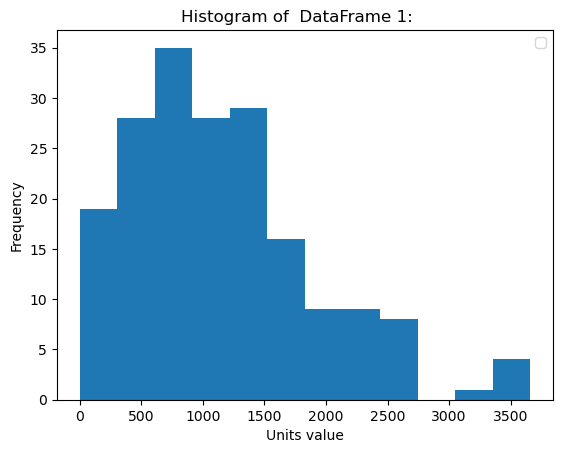

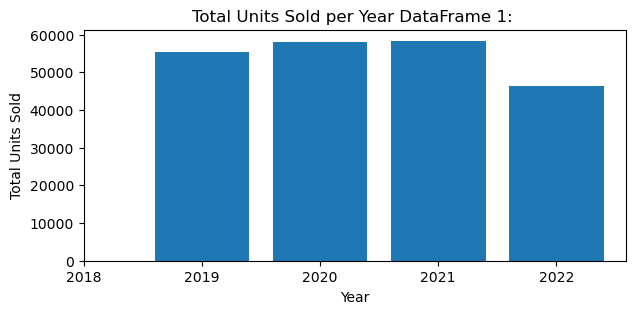

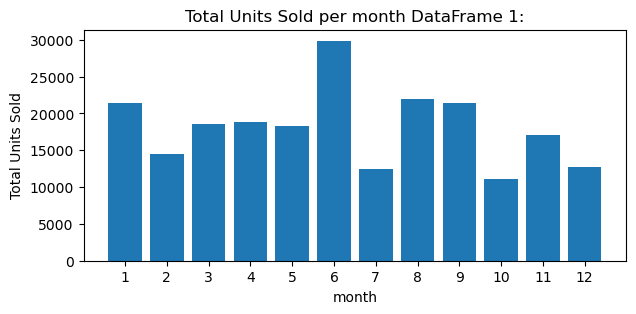

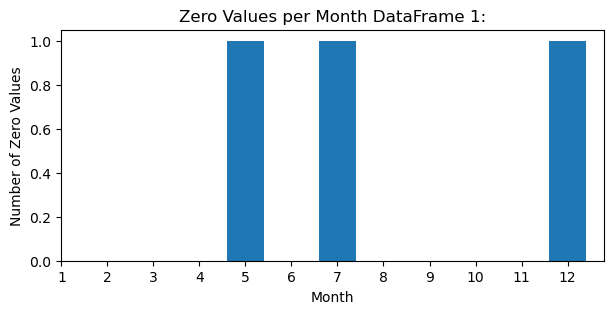

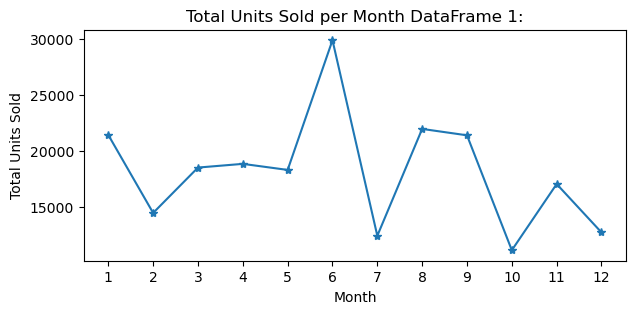

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 2:   
Mean:  8282
Variance:  456679192
Max_units 3920
Zeroes:  4


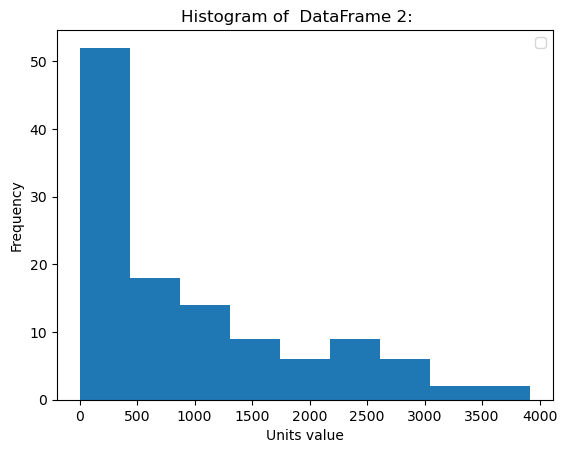

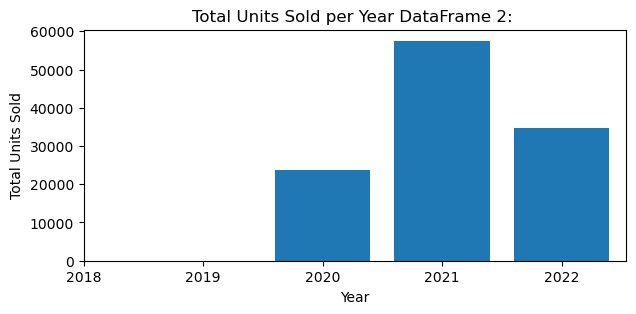

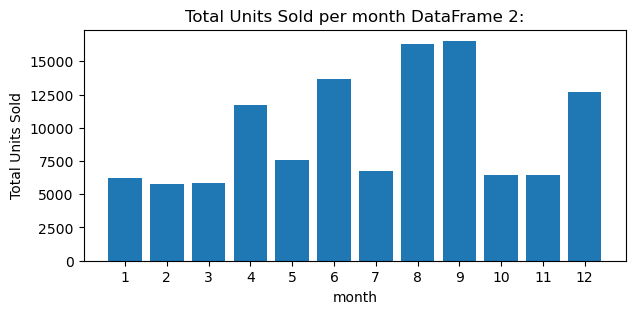

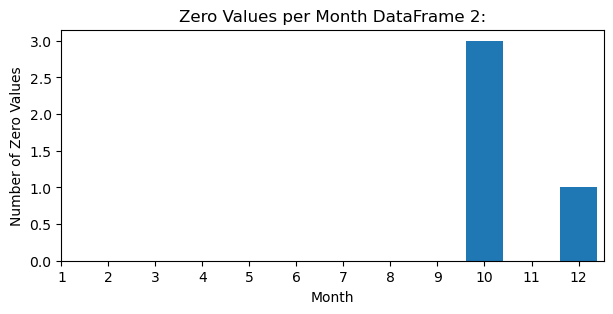

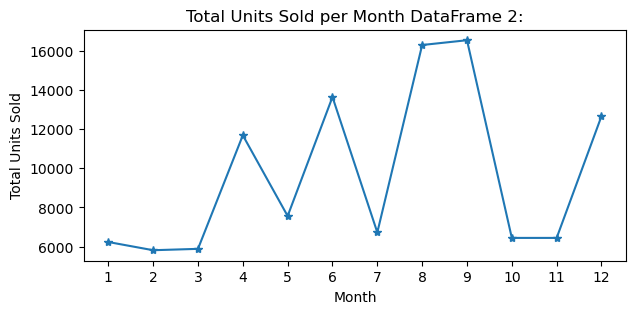

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 3:   
Mean:  2344
Variance:  51409273
Max_units 1230
Zeroes:  1


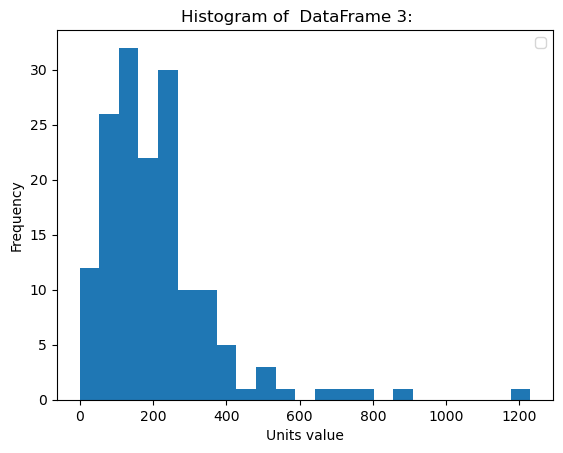

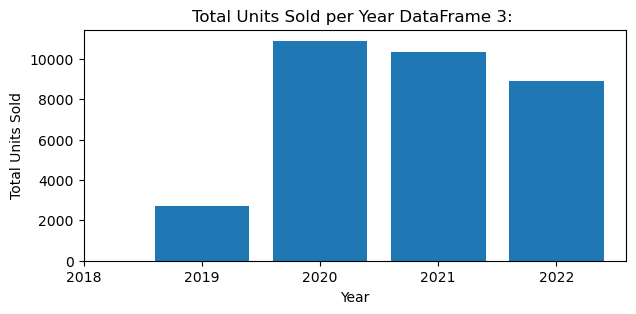

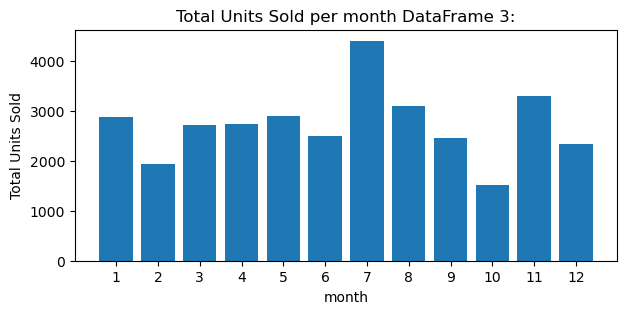

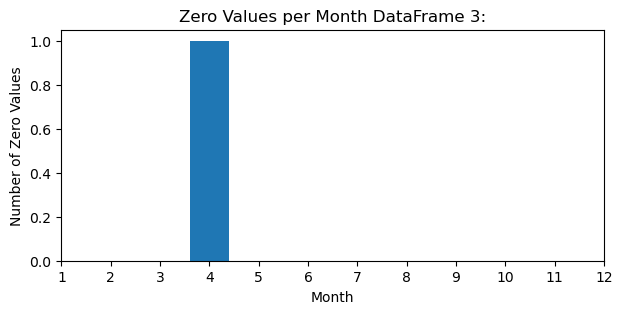

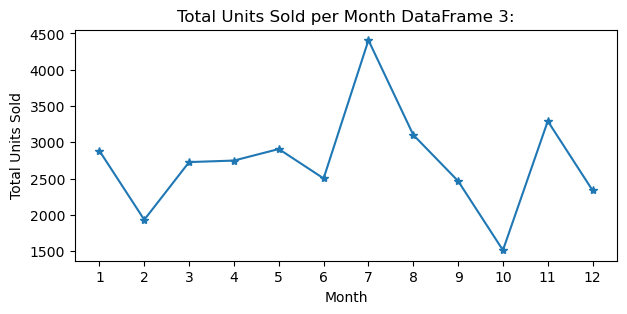

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 4:   
Mean:  48330
Variance:  31895033311
Max_units 8316
Zeroes:  8


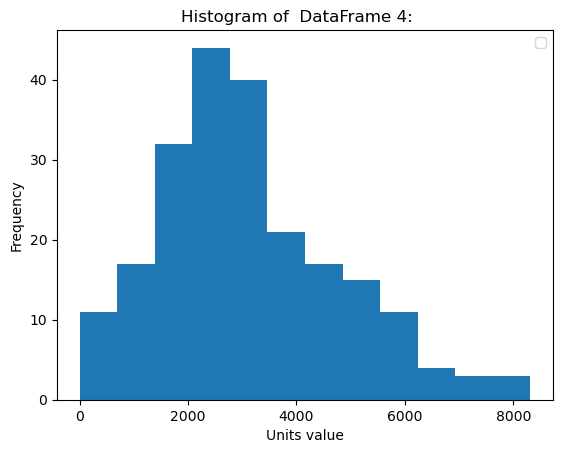

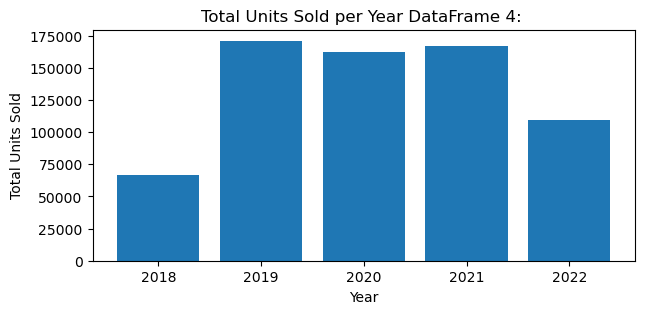

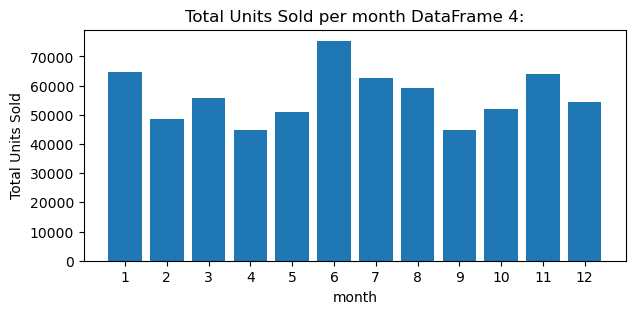

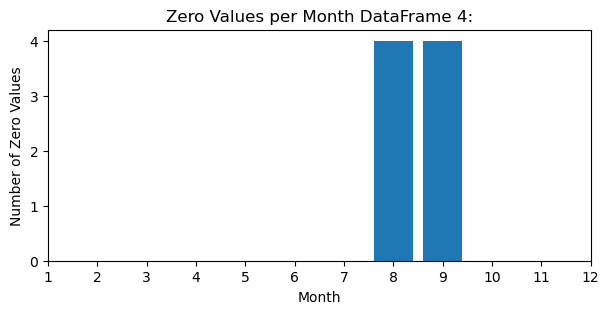

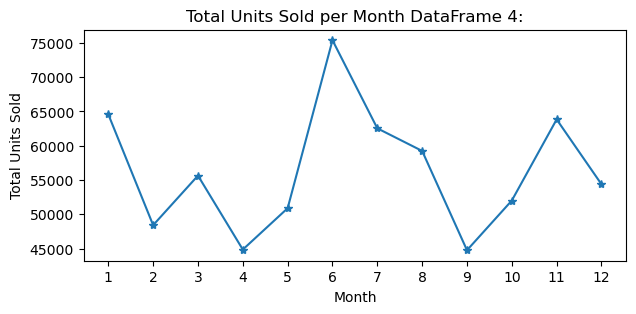

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 5:   
Mean:  12020
Variance:  2106457314
Max_units 2580
Zeroes:  14


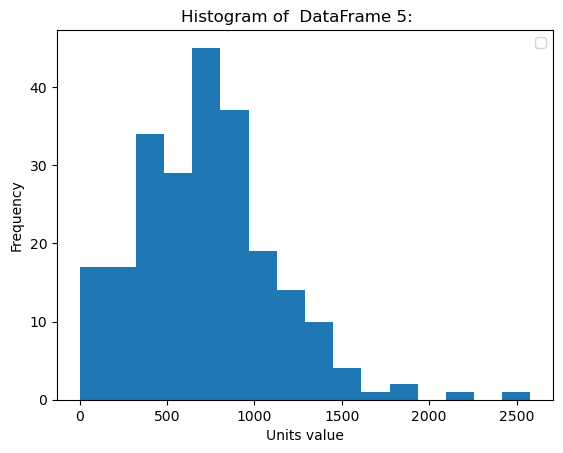

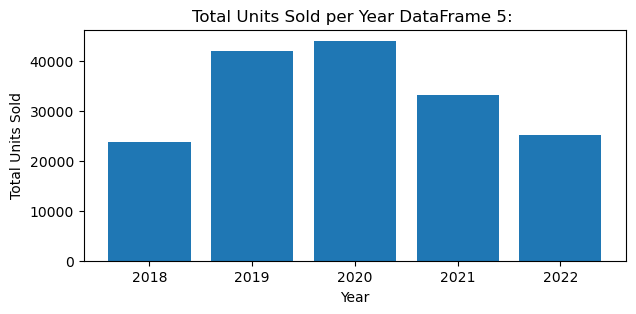

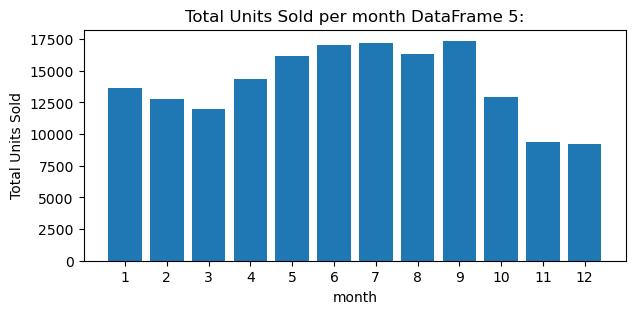

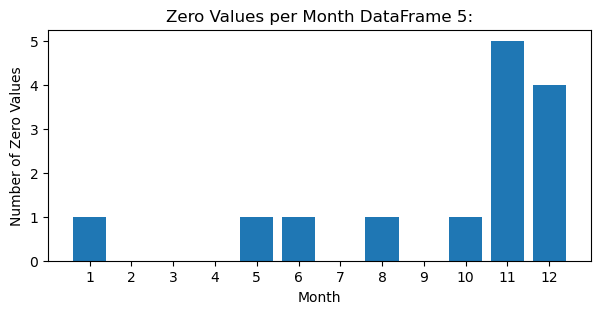

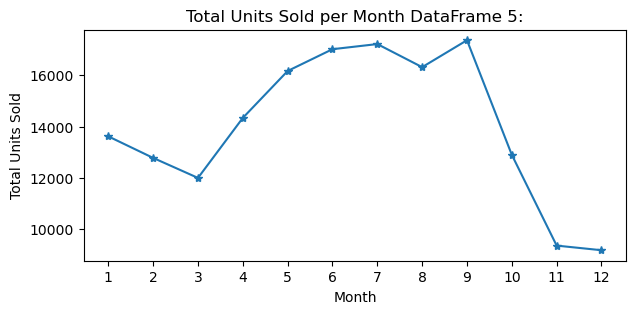

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 6:   
Mean:  6942
Variance:  710173393
Max_units 1404
Zeroes:  31


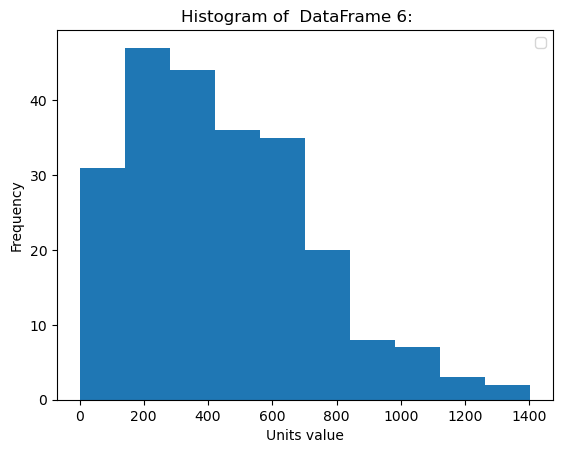

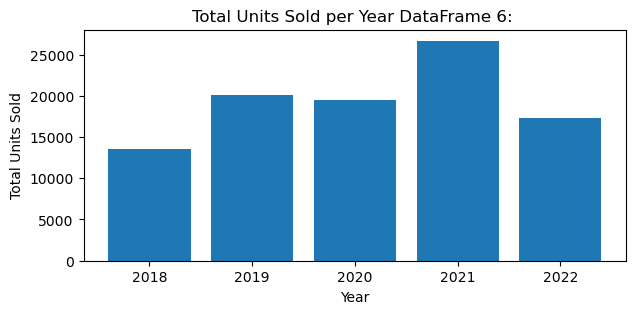

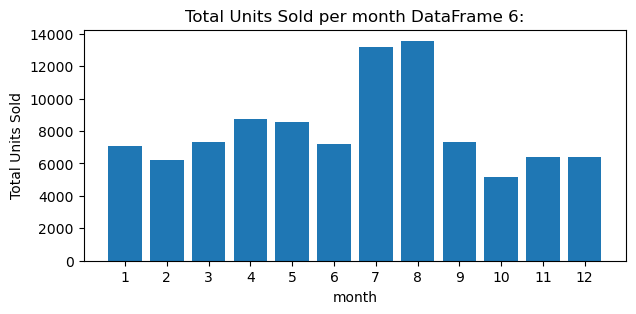

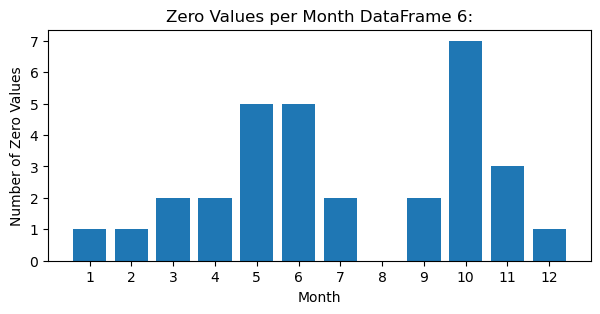

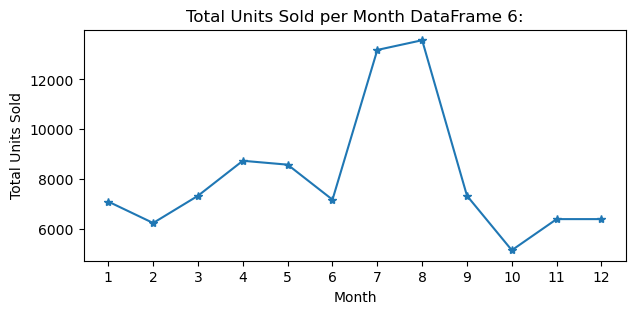

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 7:   
Mean:  2410
Variance:  30985686
Max_units 960
Zeroes:  3


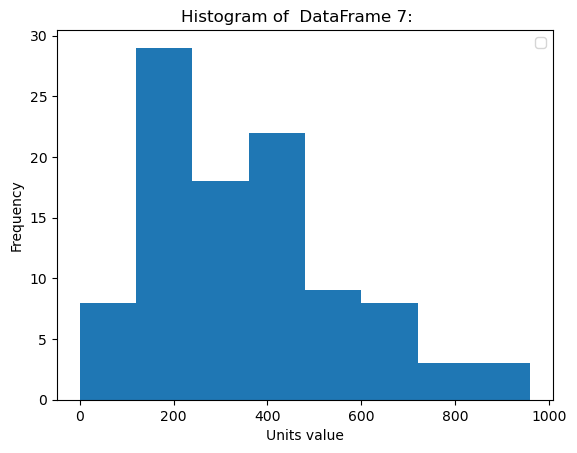

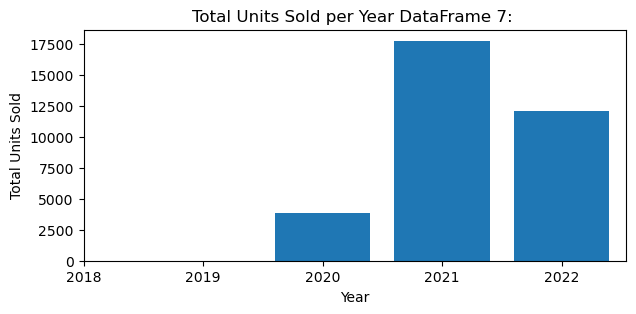

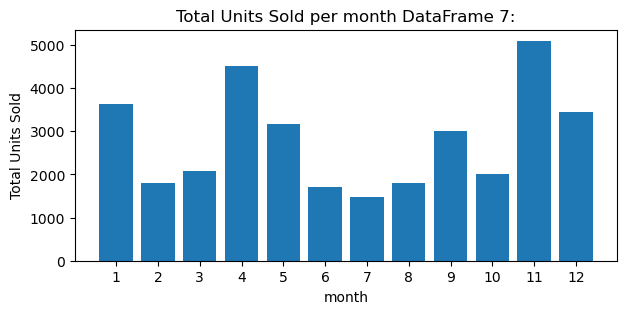

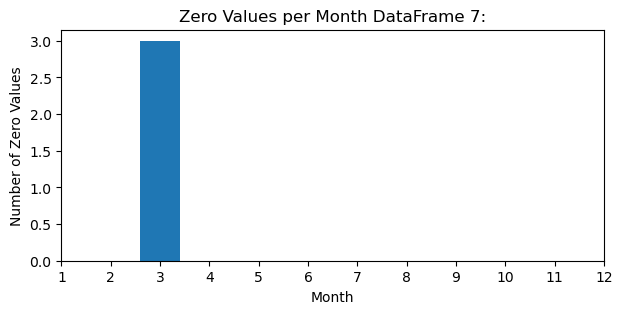

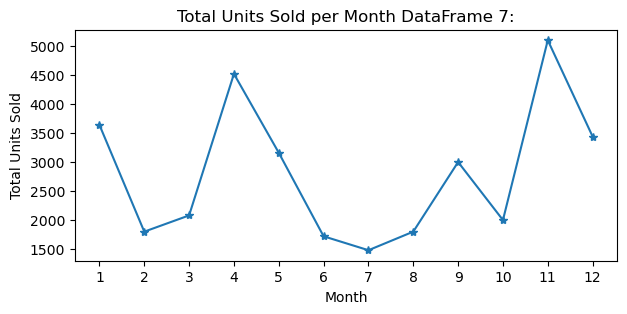

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 8:   
Mean:  8609
Variance:  594045770
Max_units 2952
Zeroes:  6


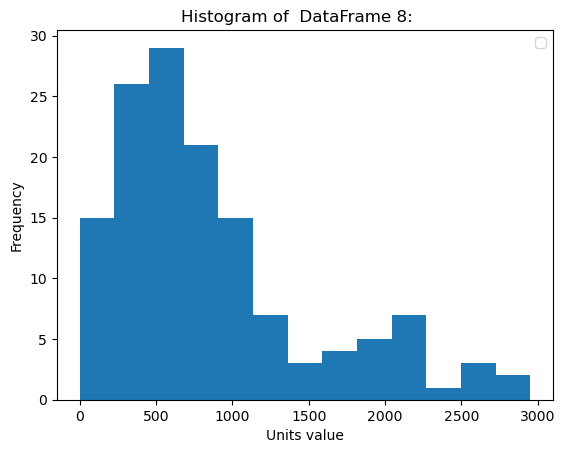

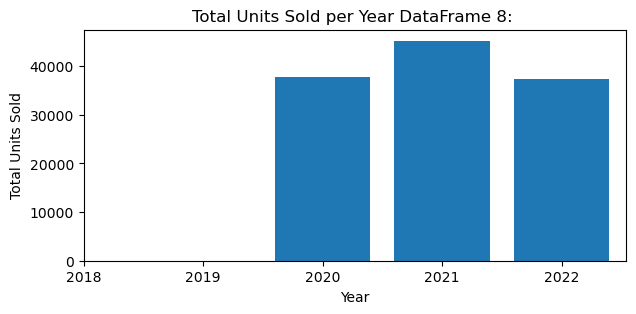

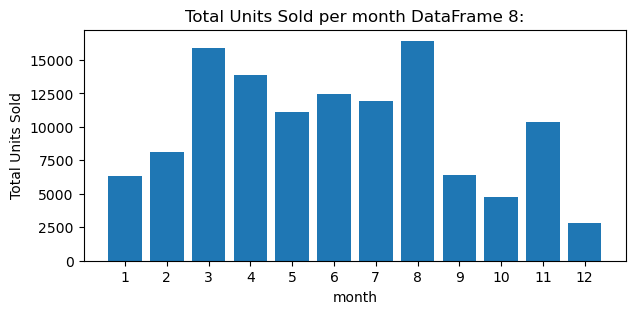

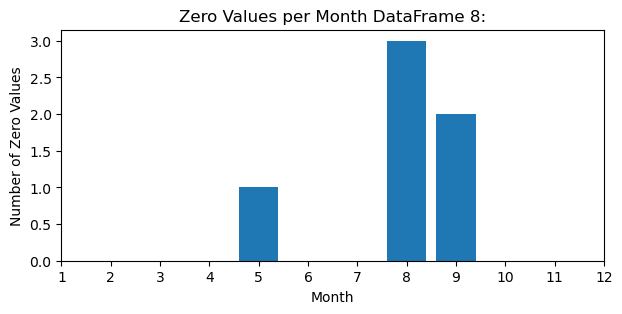

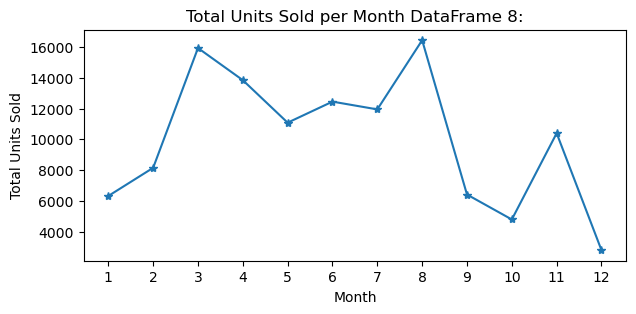

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 9:   
Mean:  2441
Variance:  115756219
Max_units 300
Zeroes:  67


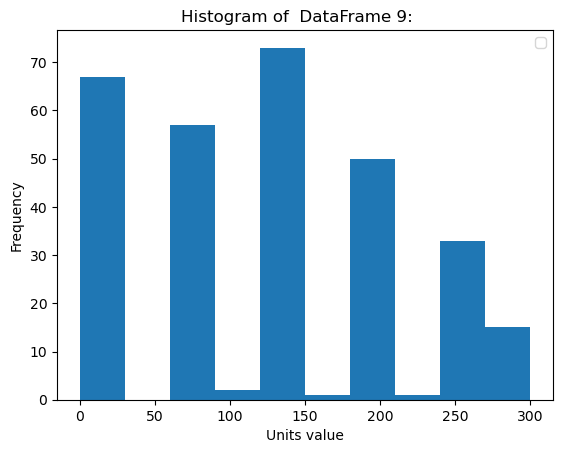

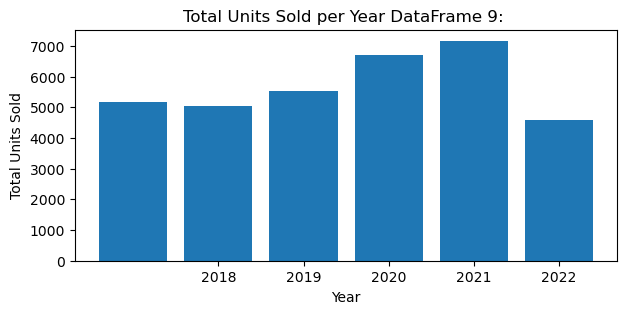

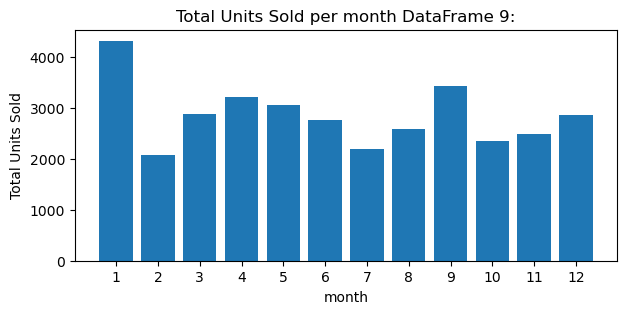

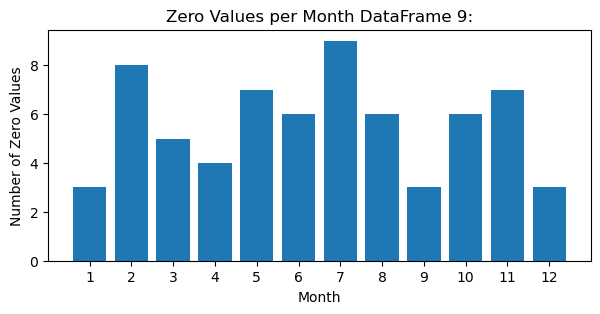

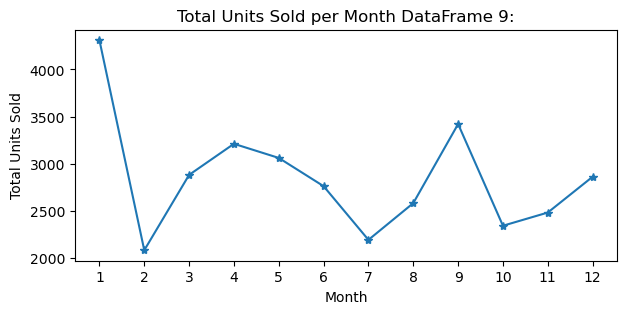

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 10:   
Mean:  11205
Variance:  1940483201
Max_units 2160
Zeroes:  44


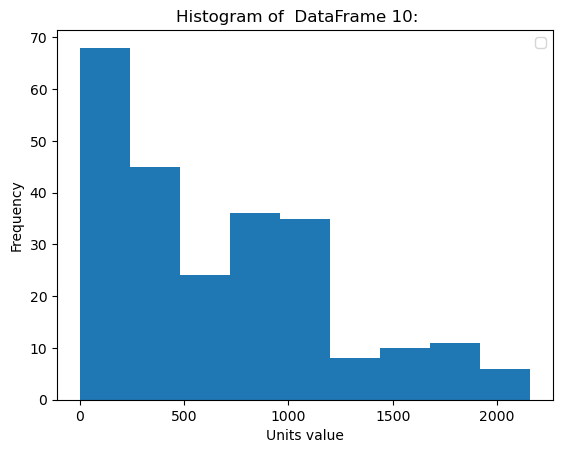

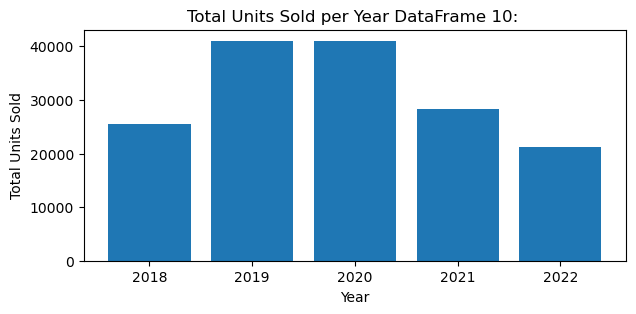

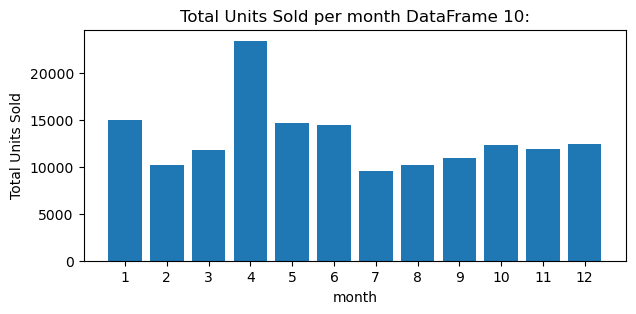

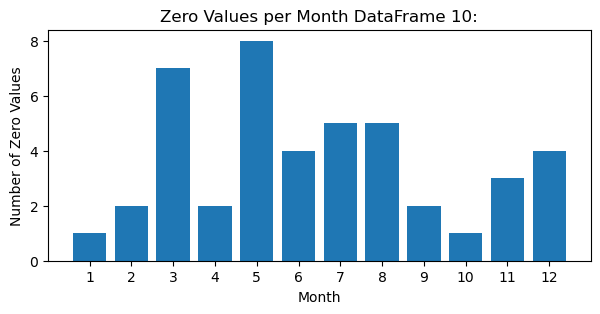

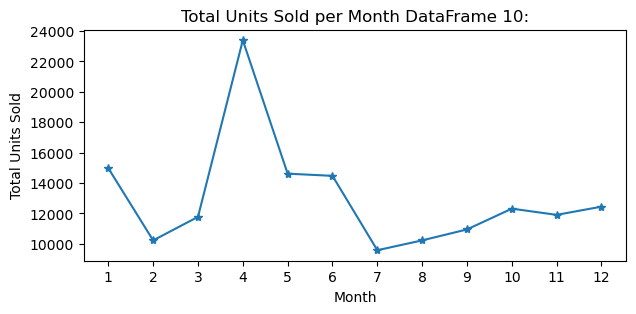

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 11:   
Mean:  30327
Variance:  9082367762
Max_units 4032
Zeroes:  0


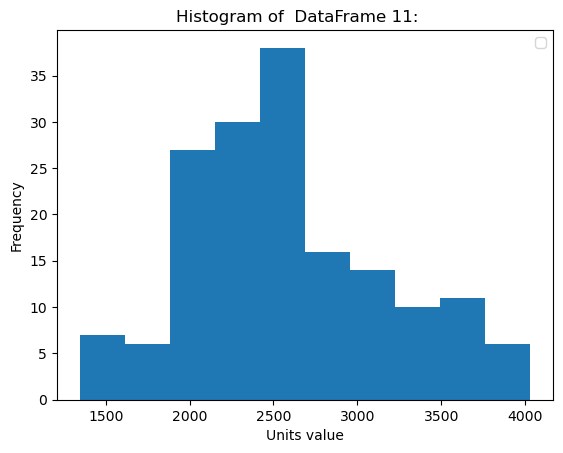

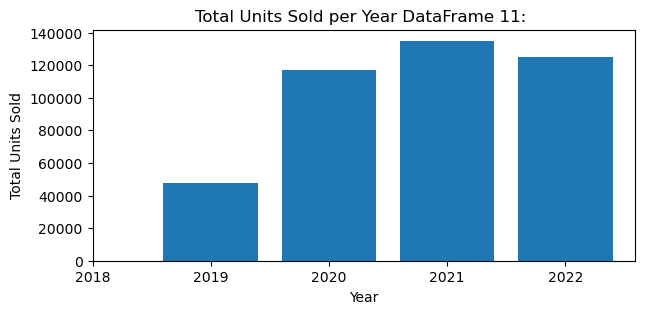

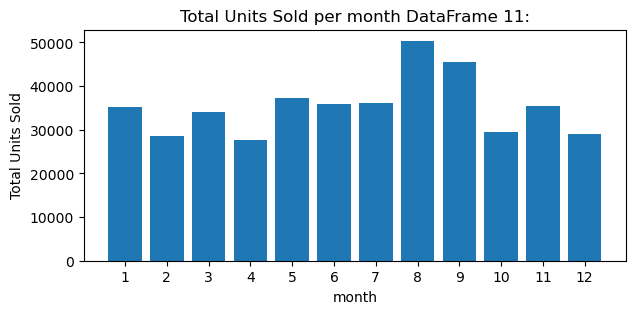

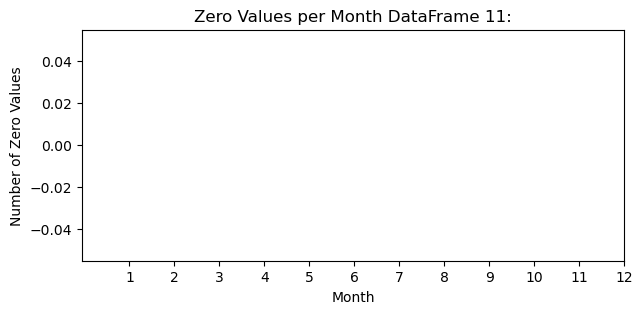

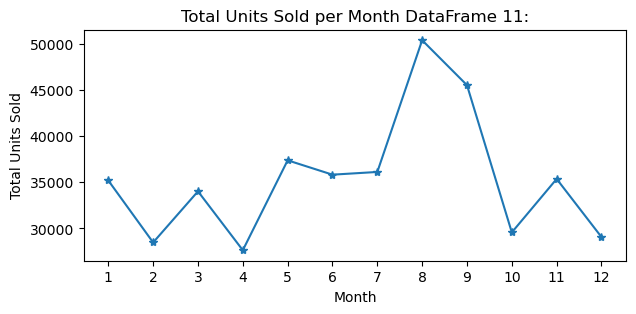

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 12:   
Mean:  34841
Variance:  20292225805
Max_units 4914
Zeroes:  11


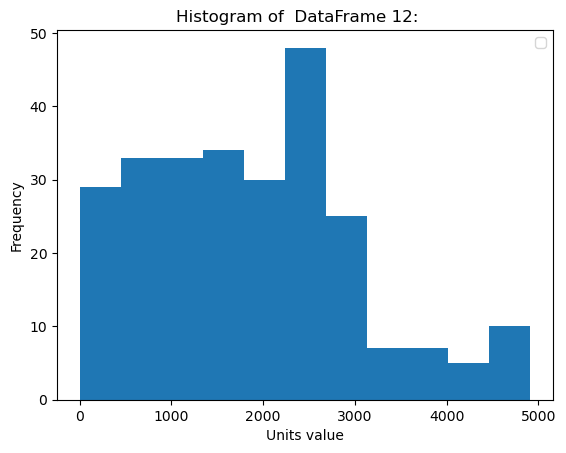

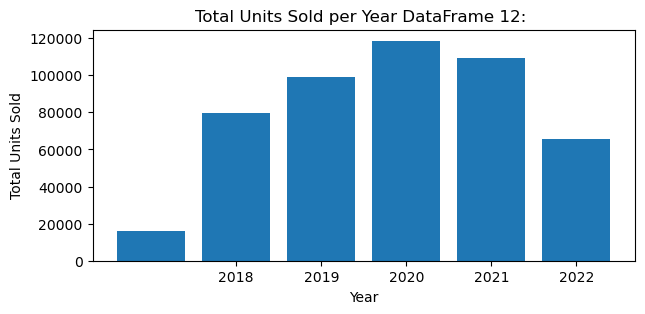

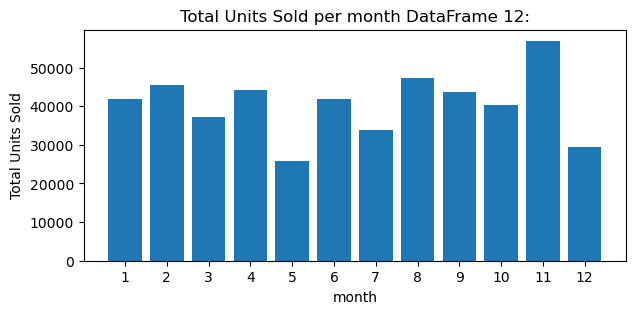

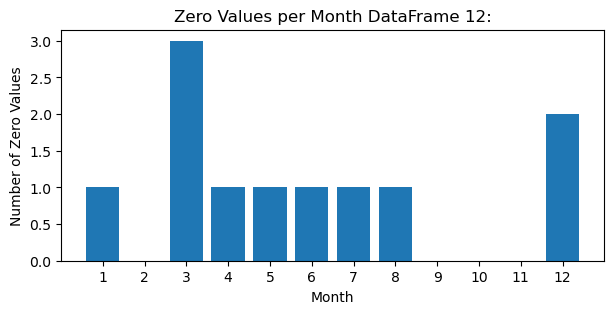

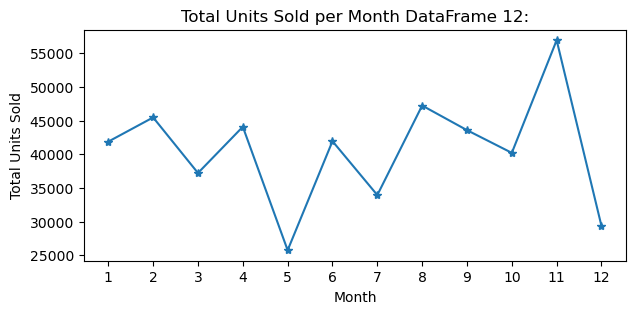

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 13:   
Mean:  40868
Variance:  28776866111
Max_units 6660
Zeroes:  35


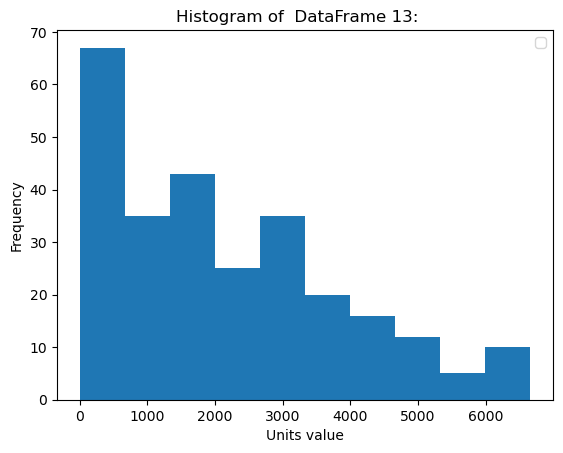

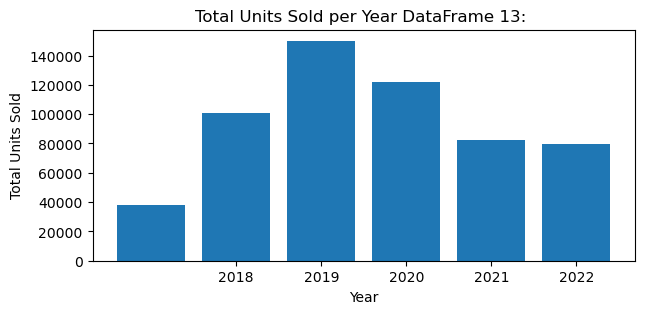

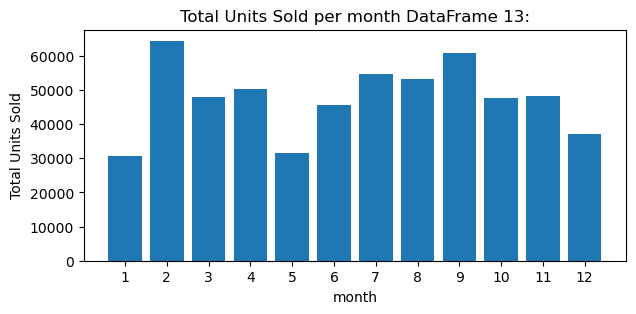

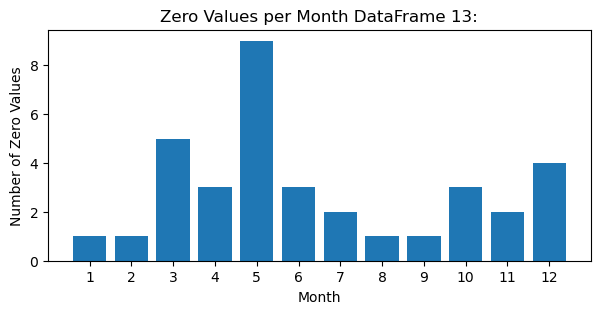

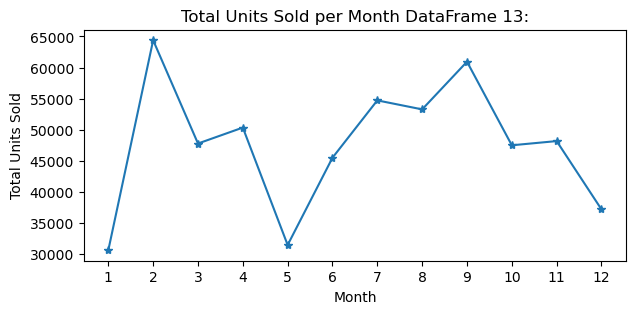

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/419053472.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       DataFrame 14:   
Mean:  27525
Variance:  11530344594
Max_units 4020
Zeroes:  2


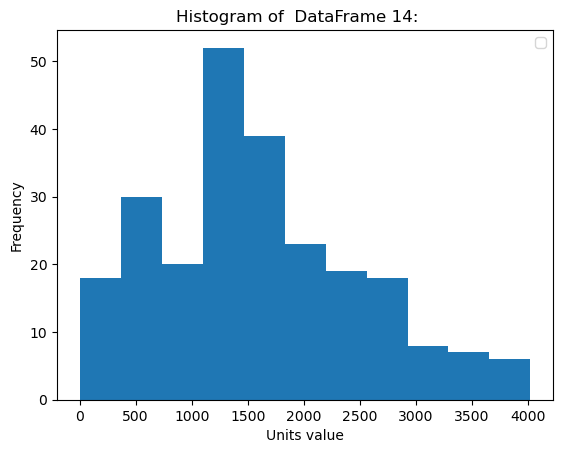

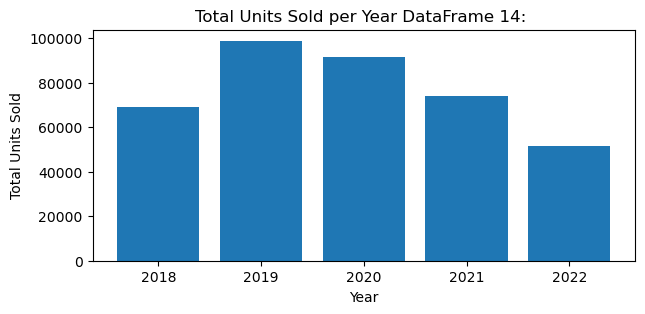

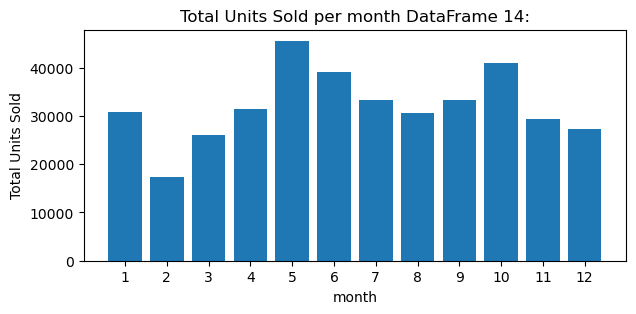

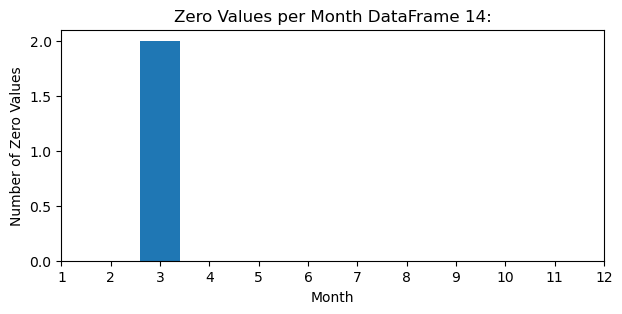

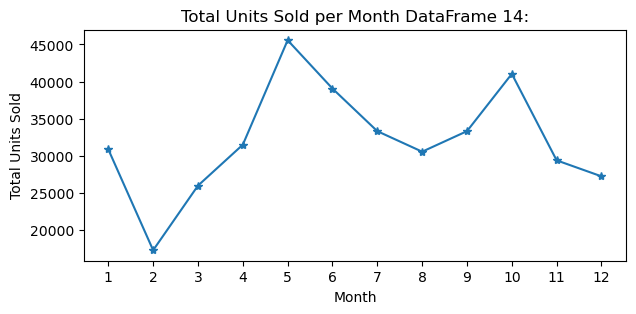

In [112]:

def EDA(data, position):

    value = data[position]
    value=value[['year-week','Units']]

    # Calculate mean and variance
    mean = sum(value['Units']) / len(data)
    variance = sum((x - mean) ** 2 for x in value['Units']) / len(data)

    # Find maximum number
    max_number = max(value['Units'])

    # Count the number of rows with zeros
    num_zeros = sum(1 for x in value['Units'] if x == 0)
    
    #create the year and month colunm 
    
    value['year-week'] = pd.to_datetime(value['year-week'].astype(str) + '-1', format='%Y-%W-%w')
    value['month'] = value['year-week'].dt.month
    value['year'] = value['year-week'].dt.year
    

    
    print(f"       DataFrame {position + 1}:   ")
    print("Mean: ",round(mean))
    print("Variance: ", round(variance))
    print("Max_units", round(max_number))
    print("Zeroes: ", round(num_zeros))
        

    # Plot histogram
    plt.hist(value['Units'], bins='auto')
    #plt.axvline(x=value, color='red', linestyle='--', label='Selected Position')
    plt.xlabel('Units value')
    plt.ylabel('Frequency')
    plt.title( f"Histogram of  DataFrame {position + 1}:   ")
    plt.legend()
    plt.show()
 


    # Visualization 1: Total units sold per year
    total_units_year = value.groupby('year')['Units'].sum()
    plt.figure(figsize=(7, 3))
    plt.bar(total_units_year.index, total_units_year.values)
    plt.xlabel('Year')
    plt.ylabel('Total Units Sold')
    plt.title(f'Total Units Sold per Year DataFrame {position + 1}: ')
    plt.xticks(range(2018, 2023), range(2018, 2023))
    plt.show()
 

    # Visualization 2: Total units sold per month
    total_units_year = value.groupby('month')['Units'].sum()
    plt.figure(figsize=(7, 3))
    plt.bar(total_units_year.index, total_units_year.values)
    plt.xlabel('month')
    plt.ylabel('Total Units Sold')
    plt.title(f'Total Units Sold per month DataFrame {position + 1}:')
    plt.xticks(range(1, 13), range(1, 13))
    plt.show()

    # Visualization 3: Zero values per month
    zero_values_month = value[value['Units'] == 0].groupby('month').size()
    plt.figure(figsize=(7, 3))
    plt.bar(zero_values_month.index, zero_values_month.values)
    plt.xlabel('Month')
    plt.ylabel('Number of Zero Values')
    plt.title(f'Zero Values per Month DataFrame {position + 1}:')
    plt.xticks(range(1, 13), range(1, 13))
    plt.show()


    # Visualization 4: Total units sold per month
    total_units_month = value.groupby('month')['Units'].sum()
    plt.figure(figsize=(7, 3))
    plt.plot(total_units_month.index, total_units_month.values, marker='*')
    plt.xlabel('Month')
    plt.ylabel('Total Units Sold')
    plt.title(f'Total Units Sold per Month DataFrame {position + 1}:')
    plt.xticks(range(1, 13), range(1, 13))
    plt.show()




for i, df_subdividido in enumerate(new_df):
    EDA(new_df,i)

In [113]:
def Year_day(data,position):
    
    value = data[position].copy()
    value=value[['year-week','Units']]

    #Split 'year-week' column into separate 'year' and 'week' columns
    value[['year', 'week']] = value['year-week'].str.split('-', expand=True)

    # Convert 'year' and 'week' columns to numeric data type if needed
    value['year'] = value['year'].astype(int)
    value['week'] = value['week'].astype(int)
    
    Yw = value['year'].astype(str) + value['week'].astype(str) + '0'
    value['ds'] = pd.to_datetime(Yw, format='%Y%U%w')

    print(value)
    return value

In [114]:
for i, df_subdividido in enumerate(new_df):
    a=Year_day(new_df,i)

    year-week   Units  year  week         ds
0     2019-11   540.0  2019    11 2019-03-17
1     2019-12   750.0  2019    12 2019-03-24
2     2019-13   960.0  2019    13 2019-03-31
3     2019-14   720.0  2019    14 2019-04-07
4     2019-15  1620.0  2019    15 2019-04-14
..        ...     ...   ...   ...        ...
181   2022-35   900.0  2022    35 2022-08-28
182   2022-36   780.0  2022    36 2022-09-04
183   2022-37   975.0  2022    37 2022-09-11
184   2022-38  1170.0  2022    38 2022-09-18
185   2022-39  1365.0  2022    39 2022-09-25

[186 rows x 5 columns]
    year-week   Units  year  week         ds
186   2020-27   910.0  2020    27 2020-07-05
187   2020-28   280.0  2020    28 2020-07-12
188   2020-29    70.0  2020    29 2020-07-19
189   2020-30   490.0  2020    30 2020-07-26
190   2020-31  1540.0  2020    31 2020-08-02
..        ...     ...   ...   ...        ...
299   2022-35   210.0  2022    35 2022-08-28
300   2022-36   420.0  2022    36 2022-09-04
301   2022-37  2590.0  2022    

## SEASONAL DECOMPOSE

    year-week   Units  year  week         ds
0     2019-11   540.0  2019    11 2019-03-17
1     2019-12   750.0  2019    12 2019-03-24
2     2019-13   960.0  2019    13 2019-03-31
3     2019-14   720.0  2019    14 2019-04-07
4     2019-15  1620.0  2019    15 2019-04-14
..        ...     ...   ...   ...        ...
181   2022-35   900.0  2022    35 2022-08-28
182   2022-36   780.0  2022    36 2022-09-04
183   2022-37   975.0  2022    37 2022-09-11
184   2022-38  1170.0  2022    38 2022-09-18
185   2022-39  1365.0  2022    39 2022-09-25

[186 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

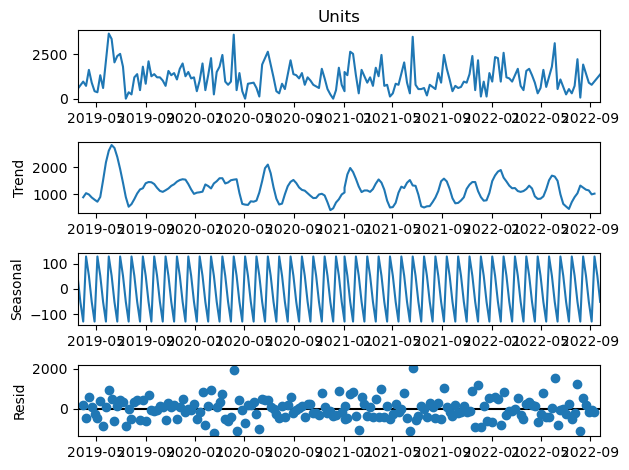

    year-week   Units  year  week         ds
186   2020-27   910.0  2020    27 2020-07-05
187   2020-28   280.0  2020    28 2020-07-12
188   2020-29    70.0  2020    29 2020-07-19
189   2020-30   490.0  2020    30 2020-07-26
190   2020-31  1540.0  2020    31 2020-08-02
..        ...     ...   ...   ...        ...
299   2022-35   210.0  2022    35 2022-08-28
300   2022-36   420.0  2022    36 2022-09-04
301   2022-37  2590.0  2022    37 2022-09-11
302   2022-38   280.0  2022    38 2022-09-18
303   2022-39  1365.0  2022    39 2022-09-25

[118 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

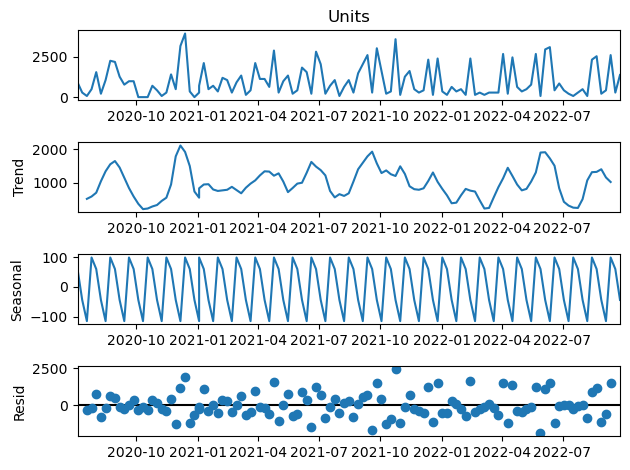

    year-week  Units  year  week         ds
304   2019-40  144.0  2019    40 2019-10-06
305   2019-41   90.0  2019    41 2019-10-13
306   2019-42  204.0  2019    42 2019-10-20
307   2019-43  126.0  2019    43 2019-10-27
308   2019-44  252.0  2019    44 2019-11-03
..        ...    ...   ...   ...        ...
456   2022-35  216.0  2022    35 2022-08-28
457   2022-36  108.0  2022    36 2022-09-04
458   2022-37   96.0  2022    37 2022-09-11
459   2022-38   60.0  2022    38 2022-09-18
460   2022-39  150.0  2022    39 2022-09-25

[157 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

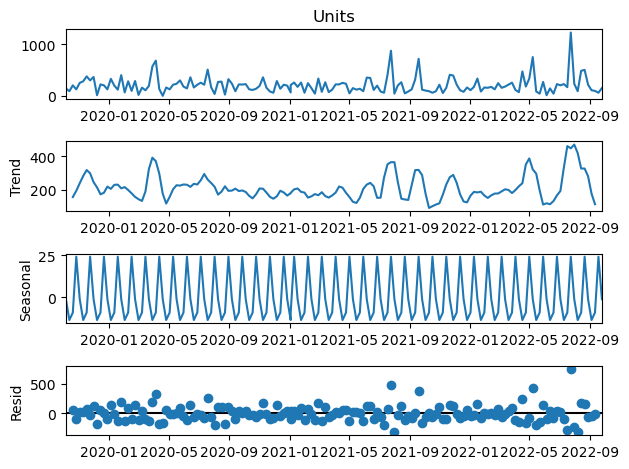

    year-week   Units  year  week         ds
461   2018-31  5256.0  2018    31 2018-08-05
462   2018-32     0.0  2018    32 2018-08-12
463   2018-33  8316.0  2018    33 2018-08-19
464   2018-34   672.0  2018    34 2018-08-26
465   2018-35  1680.0  2018    35 2018-09-02
..        ...     ...   ...   ...        ...
674   2022-35     0.0  2022    35 2022-08-28
675   2022-36     0.0  2022    36 2022-09-04
676   2022-37     0.0  2022    37 2022-09-11
677   2022-38     0.0  2022    38 2022-09-18
678   2022-39     0.0  2022    39 2022-09-25

[218 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

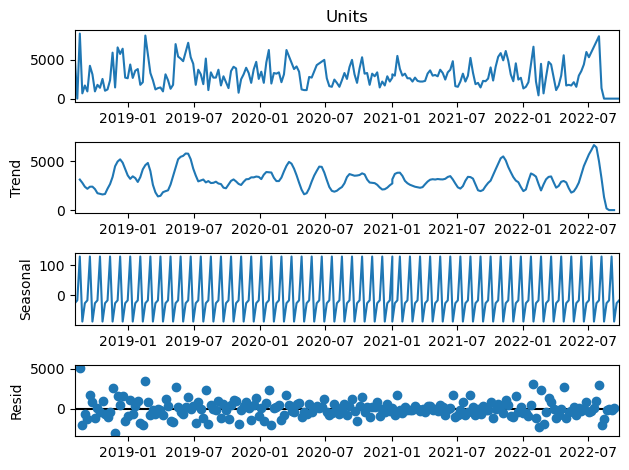

    year-week   Units  year  week         ds
679   2018-18   480.0  2018    18 2018-05-06
680   2018-19   900.0  2018    19 2018-05-13
681   2018-20   240.0  2018    20 2018-05-20
682   2018-21   570.0  2018    21 2018-05-27
683   2018-22   900.0  2018    22 2018-06-03
..        ...     ...   ...   ...        ...
905   2022-35   720.0  2022    35 2022-08-28
906   2022-36   660.0  2022    36 2022-09-04
907   2022-37  1080.0  2022    37 2022-09-11
908   2022-38   600.0  2022    38 2022-09-18
909   2022-39   960.0  2022    39 2022-09-25

[231 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

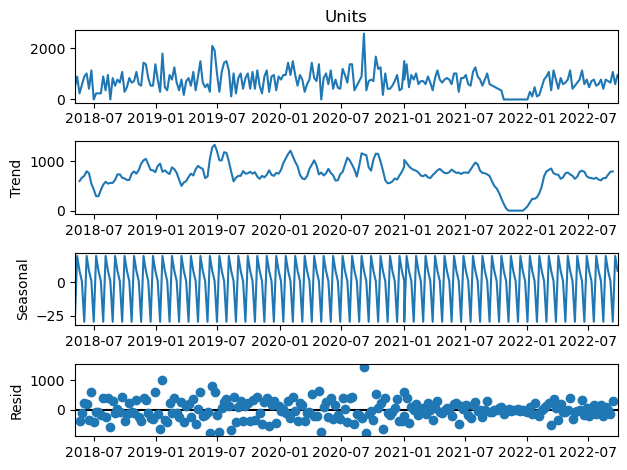

     year-week  Units  year  week         ds
910    2018-16  468.0  2018    16 2018-04-22
911    2018-17  624.0  2018    17 2018-04-29
912    2018-18  156.0  2018    18 2018-05-06
913    2018-19    0.0  2018    19 2018-05-13
914    2018-20  624.0  2018    20 2018-05-20
...        ...    ...   ...   ...        ...
1138   2022-35  312.0  2022    35 2022-08-28
1139   2022-36  156.0  2022    36 2022-09-04
1140   2022-37  156.0  2022    37 2022-09-11
1141   2022-38    0.0  2022    38 2022-09-18
1142   2022-39  312.0  2022    39 2022-09-25

[233 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

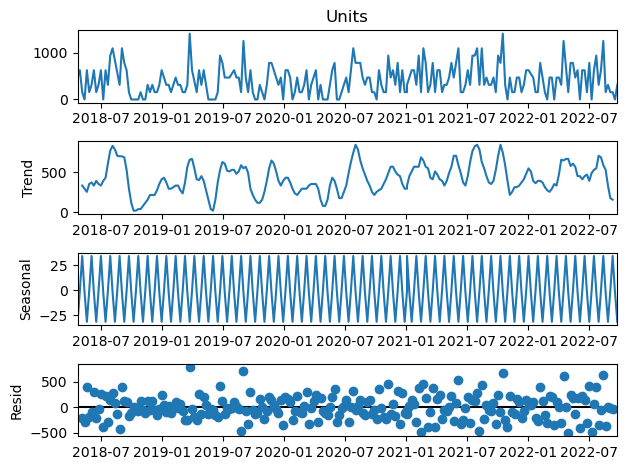

     year-week  Units  year  week         ds
1143   2020-45  600.0  2020    45 2020-11-08
1144   2020-46  760.0  2020    46 2020-11-15
1145   2020-47  920.0  2020    47 2020-11-22
1146   2020-48  200.0  2020    48 2020-11-29
1147   2020-49  320.0  2020    49 2020-12-06
...        ...    ...   ...   ...        ...
1238   2022-35  320.0  2022    35 2022-08-28
1239   2022-36  320.0  2022    36 2022-09-04
1240   2022-37  360.0  2022    37 2022-09-11
1241   2022-38  320.0  2022    38 2022-09-18
1242   2022-39  280.0  2022    39 2022-09-25

[100 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

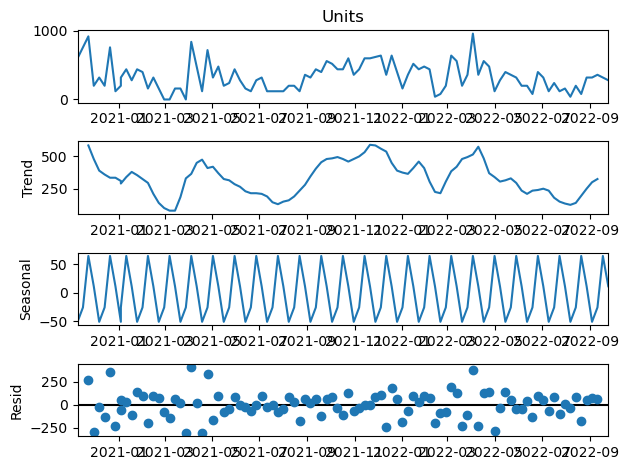

     year-week   Units  year  week         ds
1243   2020-07   765.0  2020     7 2020-02-16
1244   2020-08  2205.0  2020     8 2020-02-23
1245   2020-09  1935.0  2020     9 2020-03-01
1246   2020-10  2745.0  2020    10 2020-03-08
1247   2020-11  2220.0  2020    11 2020-03-15
...        ...     ...   ...   ...        ...
1376   2022-35     0.0  2022    35 2022-08-28
1377   2022-36   351.0  2022    36 2022-09-04
1378   2022-37    28.0  2022    37 2022-09-11
1379   2022-38     0.0  2022    38 2022-09-18
1380   2022-39     0.0  2022    39 2022-09-25

[138 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

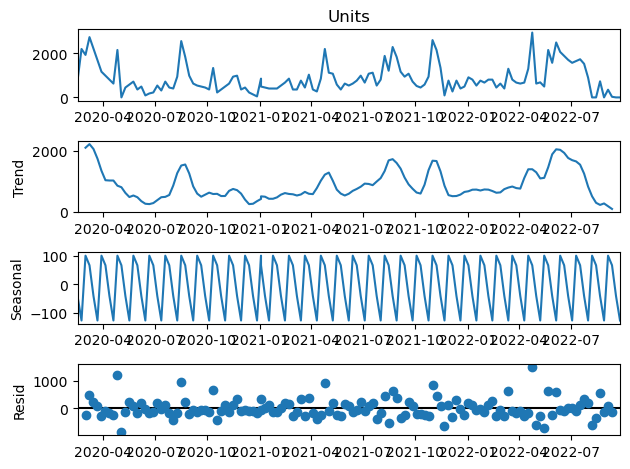

     year-week  Units  year  week         ds
1381   2017-02  120.0  2017     2 2017-01-08
1382   2017-03  120.0  2017     3 2017-01-15
1383   2017-04  300.0  2017     4 2017-01-22
1384   2017-05   60.0  2017     5 2017-01-29
1385   2017-06  120.0  2017     6 2017-02-05
...        ...    ...   ...   ...        ...
1675   2022-35  180.0  2022    35 2022-08-28
1676   2022-36  180.0  2022    36 2022-09-04
1677   2022-37  180.0  2022    37 2022-09-11
1678   2022-38    0.0  2022    38 2022-09-18
1679   2022-39  240.0  2022    39 2022-09-25

[299 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

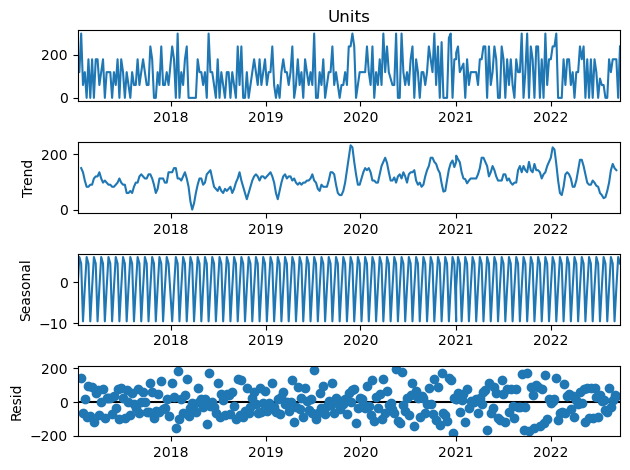

     year-week  Units  year  week         ds
1680   2018-06  720.0  2018     6 2018-02-11
1681   2018-07  432.0  2018     7 2018-02-18
1682   2018-08  432.0  2018     8 2018-02-25
1683   2018-09  576.0  2018     9 2018-03-04
1684   2018-10  288.0  2018    10 2018-03-11
...        ...    ...   ...   ...        ...
1918   2022-35  144.0  2022    35 2022-08-28
1919   2022-36  720.0  2022    36 2022-09-04
1920   2022-37  720.0  2022    37 2022-09-11
1921   2022-38  576.0  2022    38 2022-09-18
1922   2022-39  864.0  2022    39 2022-09-25

[243 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

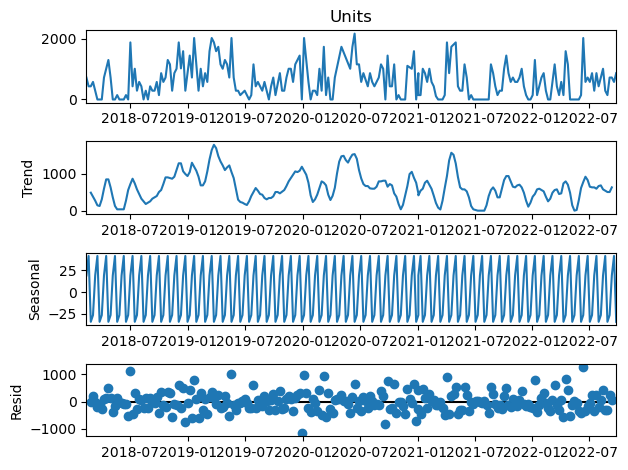

     year-week   Units  year  week         ds
1923   2019-32  1344.0  2019    32 2019-08-11
1924   2019-33  2604.0  2019    33 2019-08-18
1925   2019-34  2604.0  2019    34 2019-08-25
1926   2019-35  2772.0  2019    35 2019-09-01
1927   2019-36  2100.0  2019    36 2019-09-08
...        ...     ...   ...   ...        ...
2083   2022-35  3360.0  2022    35 2022-08-28
2084   2022-36  2772.0  2022    36 2022-09-04
2085   2022-37  3864.0  2022    37 2022-09-11
2086   2022-38  3360.0  2022    38 2022-09-18
2087   2022-39  3528.0  2022    39 2022-09-25

[165 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

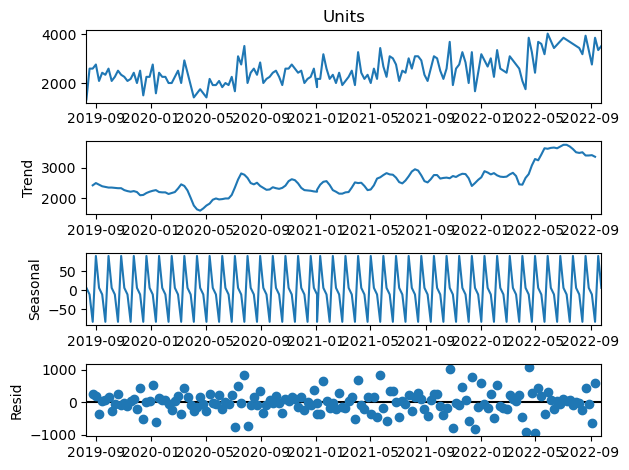

     year-week   Units  year  week         ds
2088   2017-40  3024.0  2017    40 2017-10-01
2089   2017-41   378.0  2017    41 2017-10-08
2090   2017-42   912.0  2017    42 2017-10-15
2091   2017-43  2646.0  2017    43 2017-10-22
2092   2017-44   756.0  2017    44 2017-10-29
...        ...     ...   ...   ...        ...
2344   2022-35  3024.0  2022    35 2022-08-28
2345   2022-36  1890.0  2022    36 2022-09-04
2346   2022-37  2268.0  2022    37 2022-09-11
2347   2022-38  2646.0  2022    38 2022-09-18
2348   2022-39   756.0  2022    39 2022-09-25

[261 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

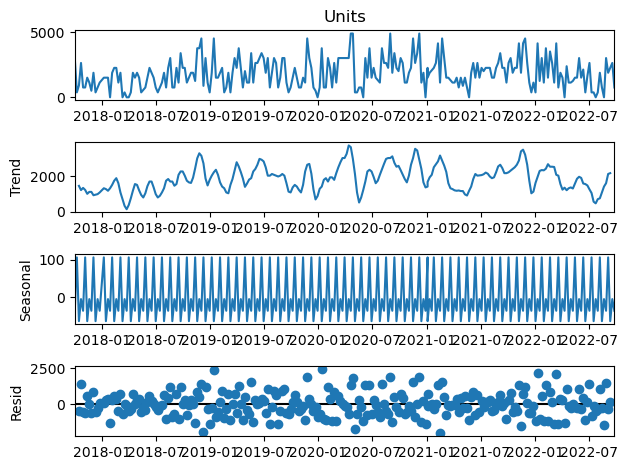

     year-week   Units  year  week         ds
2349   2017-33   180.0  2017    33 2017-08-13
2350   2017-34  4860.0  2017    34 2017-08-20
2351   2017-35  2340.0  2017    35 2017-08-27
2352   2017-36  1620.0  2017    36 2017-09-03
2353   2017-37  1620.0  2017    37 2017-09-10
...        ...     ...   ...   ...        ...
2612   2022-35  1080.0  2022    35 2022-08-28
2613   2022-36  3240.0  2022    36 2022-09-04
2614   2022-37  1944.0  2022    37 2022-09-11
2615   2022-38  1944.0  2022    38 2022-09-18
2616   2022-39  2160.0  2022    39 2022-09-25

[268 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

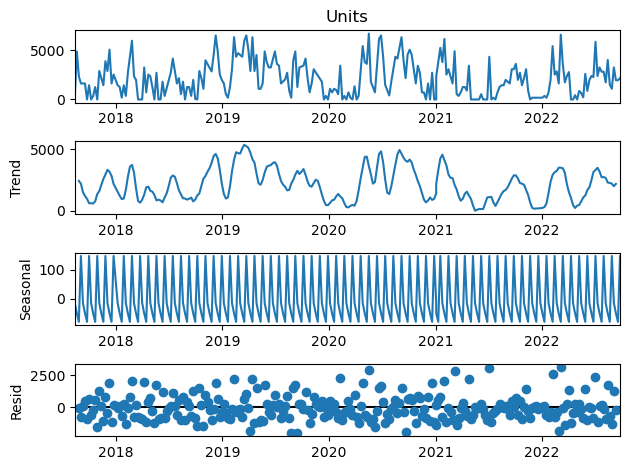

     year-week   Units  year  week         ds
2617   2018-09   482.0  2018     9 2018-03-04
2618   2018-10   536.0  2018    10 2018-03-11
2619   2018-11     0.0  2018    11 2018-03-18
2620   2018-12     0.0  2018    12 2018-03-25
2621   2018-13    32.0  2018    13 2018-04-01
...        ...     ...   ...   ...        ...
2852   2022-35   948.0  2022    35 2022-08-28
2853   2022-36   600.0  2022    36 2022-09-04
2854   2022-37  1452.0  2022    37 2022-09-11
2855   2022-38  1920.0  2022    38 2022-09-18
2856   2022-39   276.0  2022    39 2022-09-25

[240 rows x 5 columns]


<Figure size 1000x800 with 0 Axes>

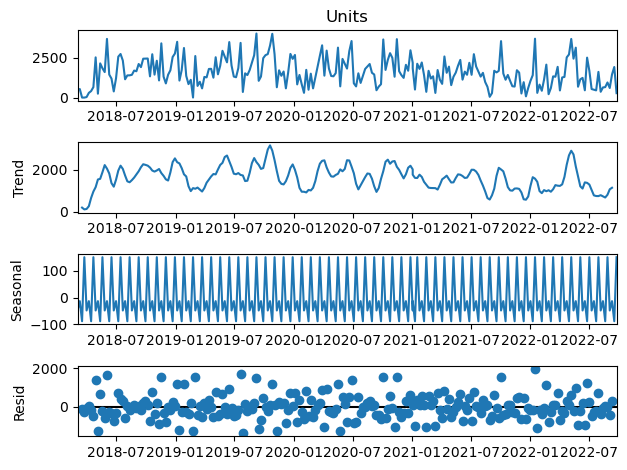

In [115]:
def apply_seasonal_decompose(data, position):
    x=Year_day(data, position)
    # Convert "year-week" column to datetime type
    df = x.copy()  # Access the DataFrame at the given position and make a copy
    df['year-week1'] = pd.to_datetime(df['ds'], format='%Y-%W')
    df=df[['year-week1','Units']]
    # Set "year-week" column as the dataframe index
    df.set_index('year-week1', inplace=True)
    
    # Apply seasonal decomposition
    result = seasonal_decompose(df['Units'], model='additive', period=4)

    # Access the decomposed components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Return the decomposed components as a new dataframe
    decomposed_df = pd.DataFrame({'Trend': trend, 'Seasonal': seasonal, 'Residual': residual})
    
        # Plot the decomposition components
    plt.figure(figsize=(10, 8))
    result.plot()
    plt.show()

    #print(decomposed_df)

for i, df_subdividido in enumerate(new_df):
    apply_seasonal_decompose(new_df, i)


## ANALYZING ALL THE DATAFRAMES

In [116]:
def Stationary(data, position):

    value = data[position]
    value=value[['year-week','Units']]
    value_final= value.set_index('year-week', inplace=True)

                        
    
    print(f"DataFrame {position + 1}:")
    

    # Perform ACF test
    plot_acf(value['Units'], lags = 40)
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.title(f'Autocorrelation Function (ACF) Test DATAFRAME {i + 1}',size=24)
    plt.show()

    # Perform PACF test
    plot_pacf(value['Units'], lags = 40,method="ols")
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.title(f'Partial Autocorrelation Function (PACF) Test DATAFRAME {i + 1}',size=24)
    plt.show()
    
    
     #Normality Distribution plot
    plt.figure(figsize=(10, 6))
    stats.probplot(value['Units'], dist="norm", plot=plt)
    plt.title(f'Normality Distribution Plot DATAFRAME {position + 1}', size=24)
    plt.show()
    
    #Test & Result ACF, Shapiro
    
    adf_test = sm.tsa.stattools.adfuller(value['Units'],maxlag=40) 
    print(" the adf_test results are:", adf_test) 
    
    statistic, p_value = stats.shapiro(value['Units'])
    print(" P-Value from Shapiro is :", p_value)
    
    lbvalue, pvalue= sm.stats.diagnostic.acorr_ljungbox(value['Units'], lags=[40])
    print(" P-Value Ljung-Box", pvalue[0])



DataFrame 1:


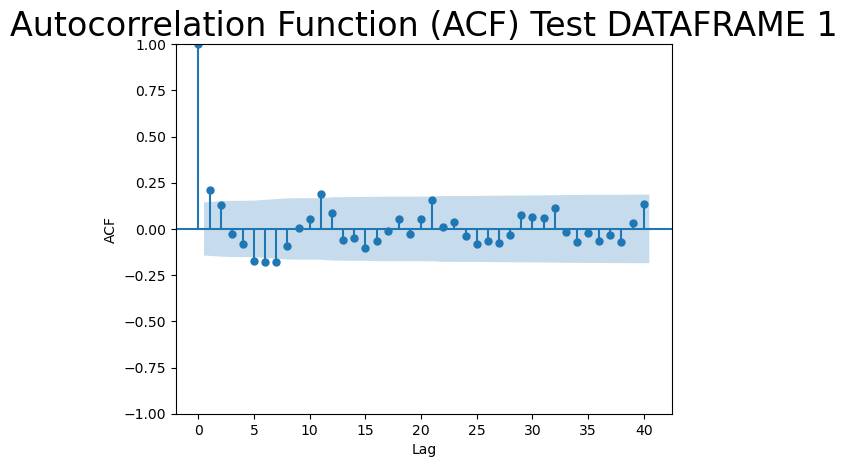

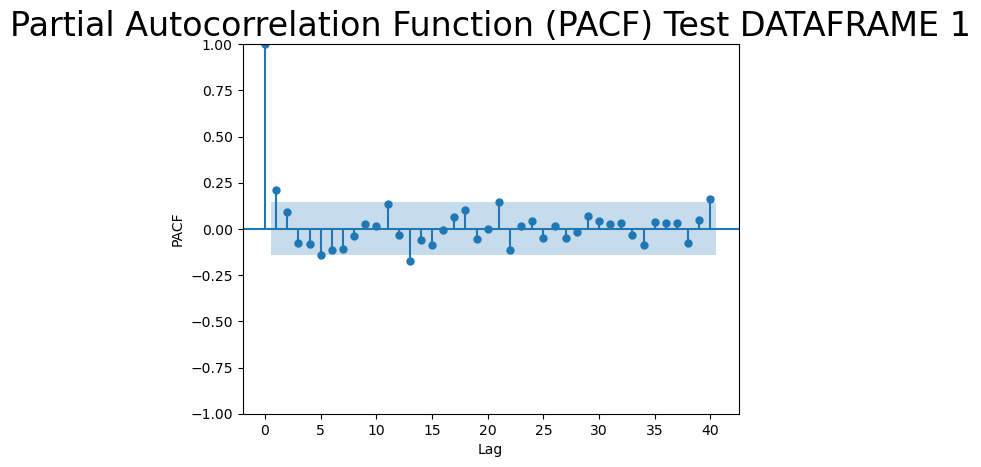

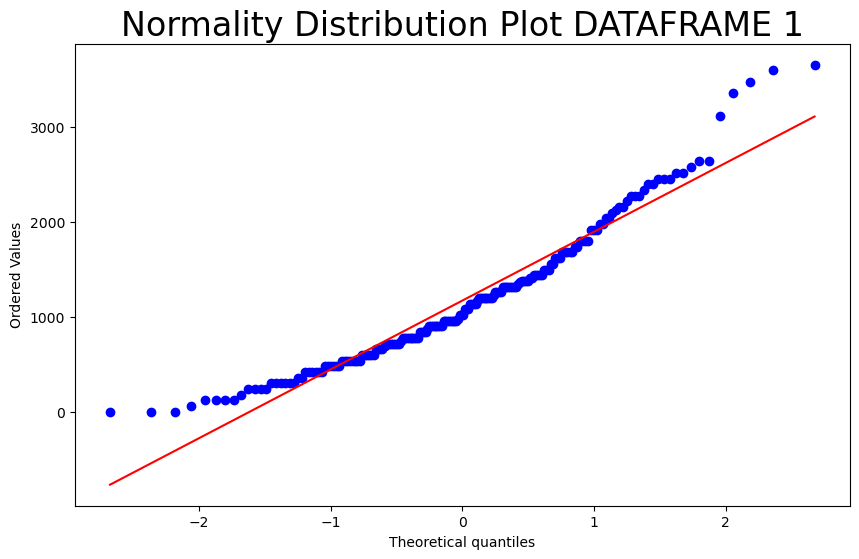

 the adf_test results are: (-10.94323923552023, 9.182854464897652e-20, 0, 185, {'1%': -3.4662005731940853, '5%': -2.8772932777920364, '10%': -2.575167750182615}, 2323.2498333961553)
 P-Value from Shapiro is : 6.783837420698546e-07
 P-Value Ljung-Box l
DataFrame 2:


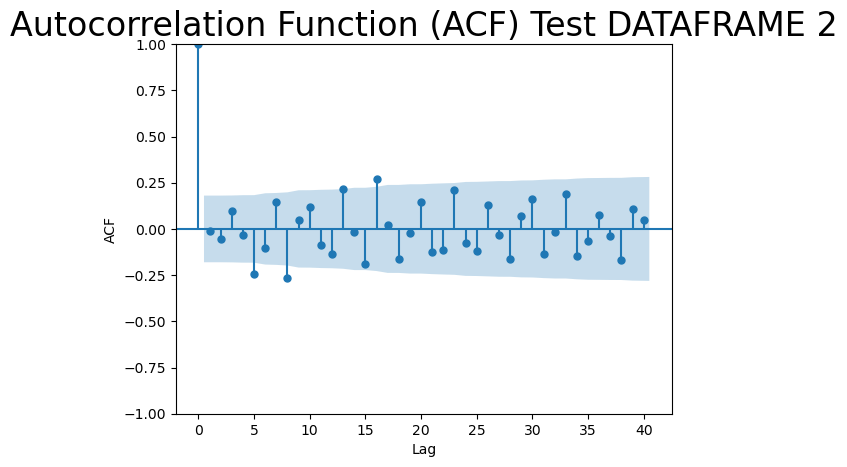

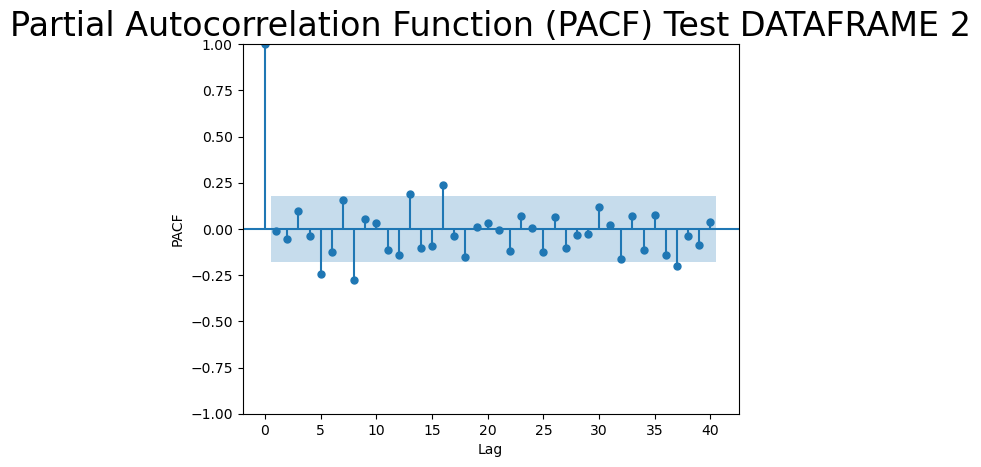

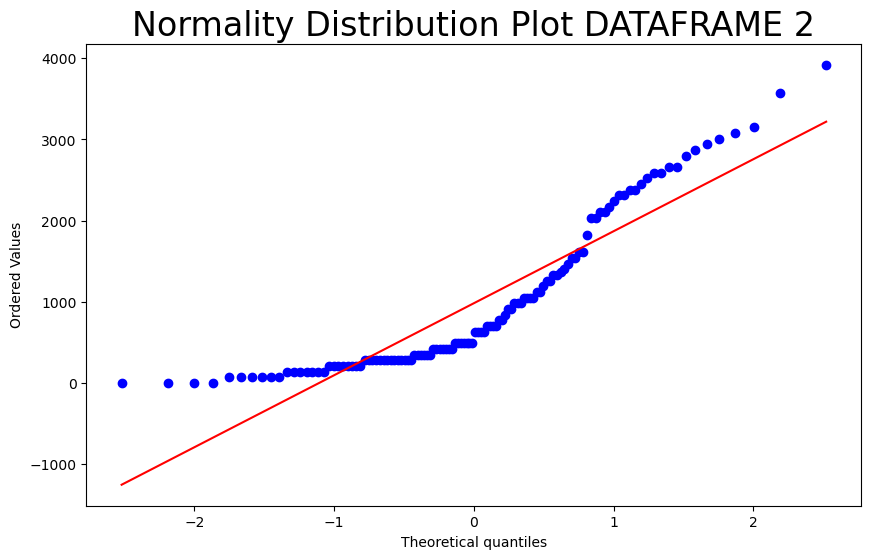

 the adf_test results are: (-3.0583077970613286, 0.029796436016724263, 12, 105, {'1%': -3.4942202045135513, '5%': -2.889485291005291, '10%': -2.5816762131519275}, 1266.2335250924411)
 P-Value from Shapiro is : 9.209000784160537e-10
 P-Value Ljung-Box l
DataFrame 3:


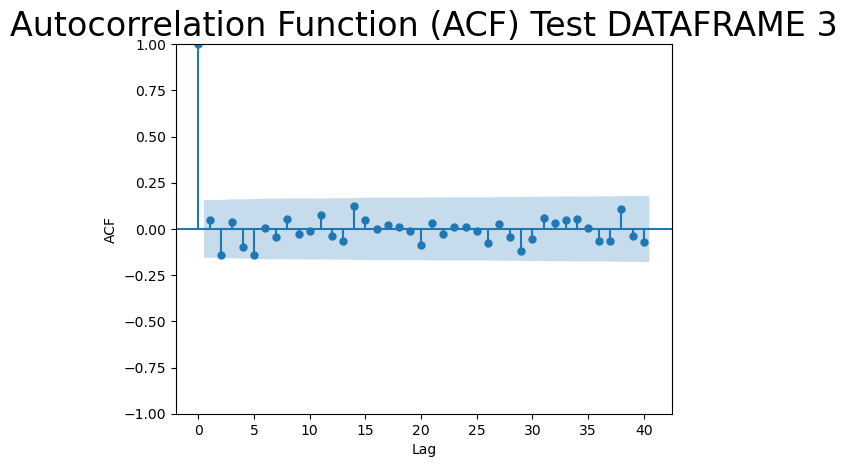

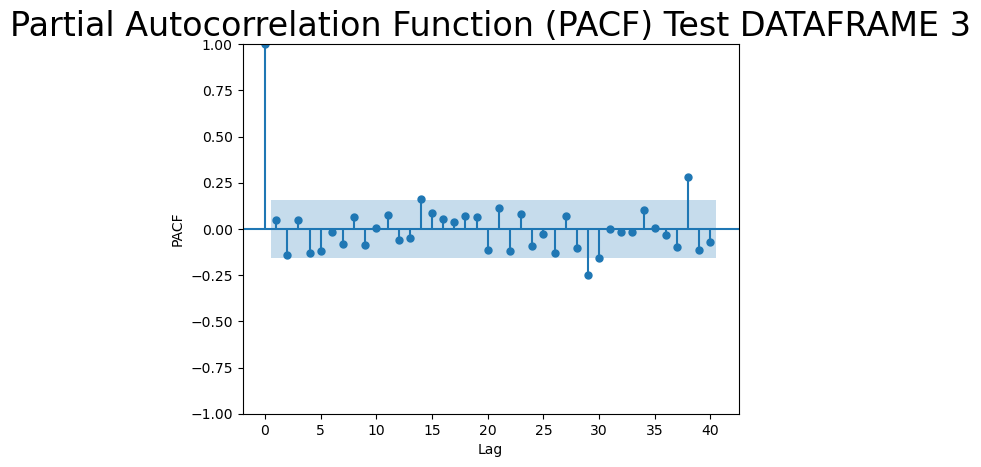

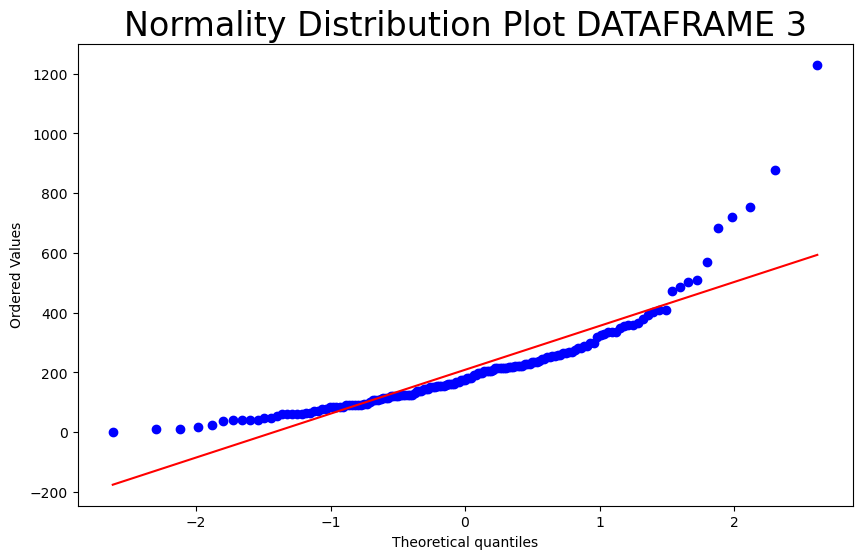

 the adf_test results are: (-9.82316130054856, 5.2720545464501895e-17, 1, 155, {'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}, 1528.1412822389875)
 P-Value from Shapiro is : 7.190607023655968e-14
 P-Value Ljung-Box l
DataFrame 4:


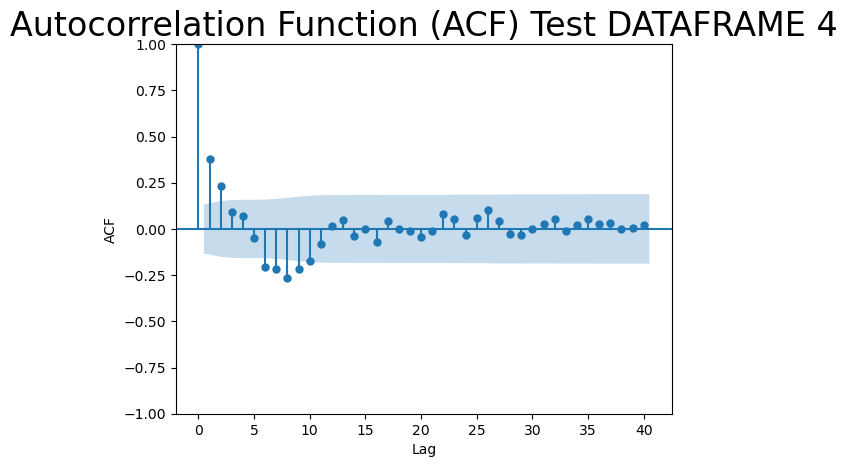

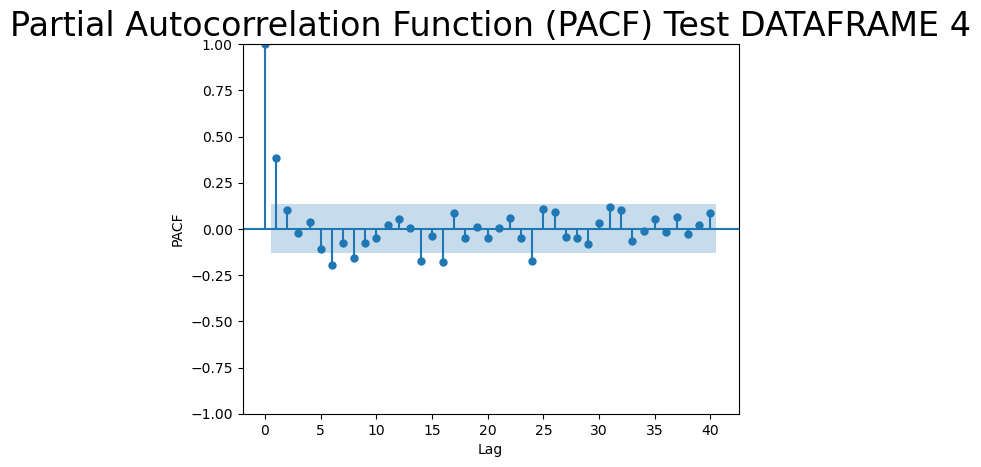

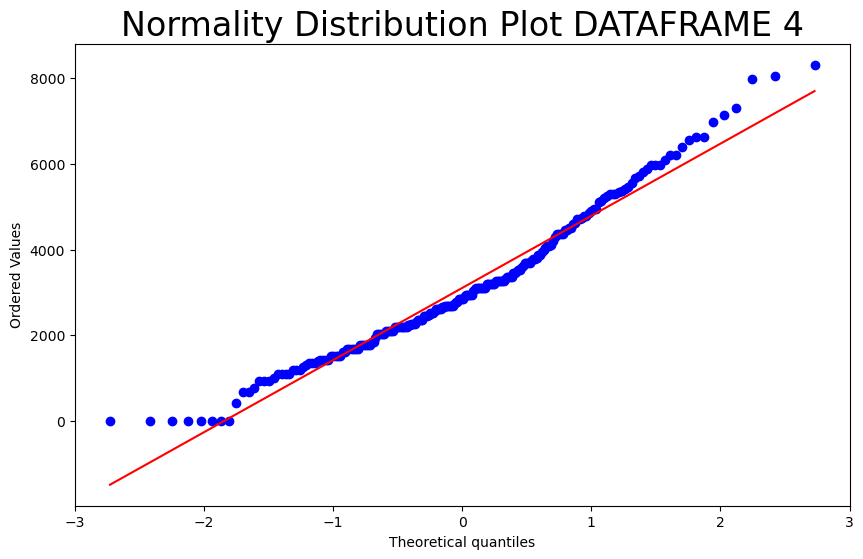

 the adf_test results are: (-6.69499761731281, 4.020431993151646e-09, 7, 210, {'1%': -3.461878735881654, '5%': -2.875403665910809, '10%': -2.574159410430839}, 3047.439246777273)
 P-Value from Shapiro is : 0.00010572532482910901
 P-Value Ljung-Box l
DataFrame 5:


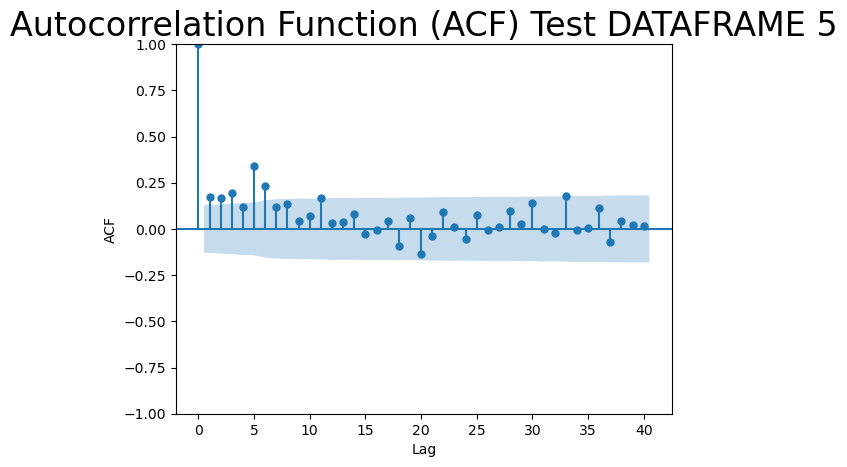

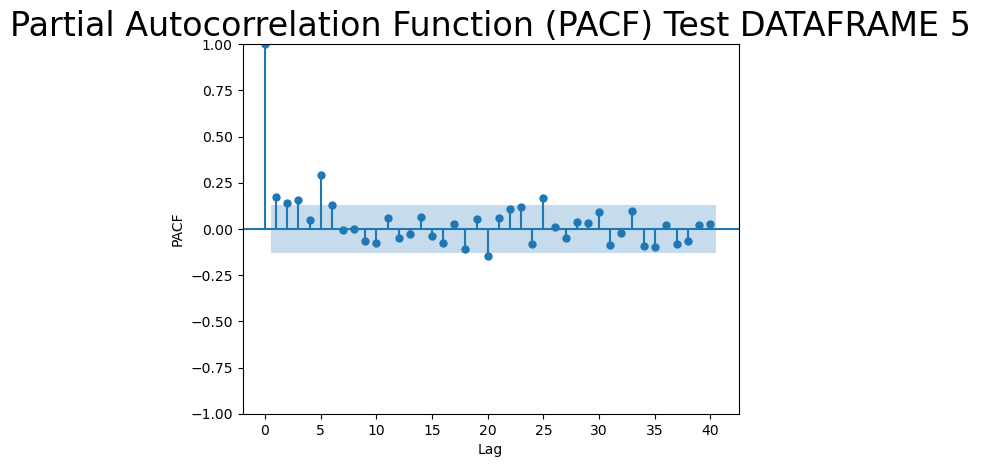

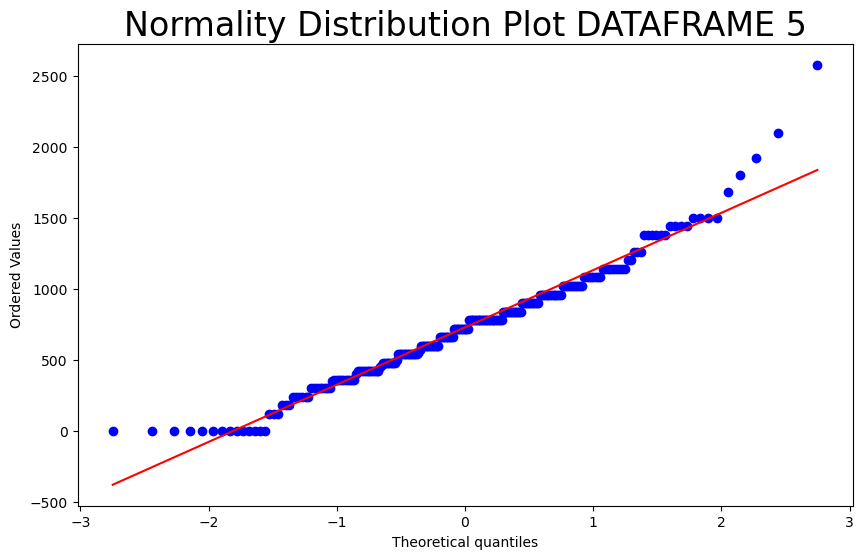

 the adf_test results are: (-3.7702889465844134, 0.0032263529609612924, 4, 226, {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}, 2792.7909860954205)
 P-Value from Shapiro is : 1.987050927709788e-05
 P-Value Ljung-Box l
DataFrame 6:


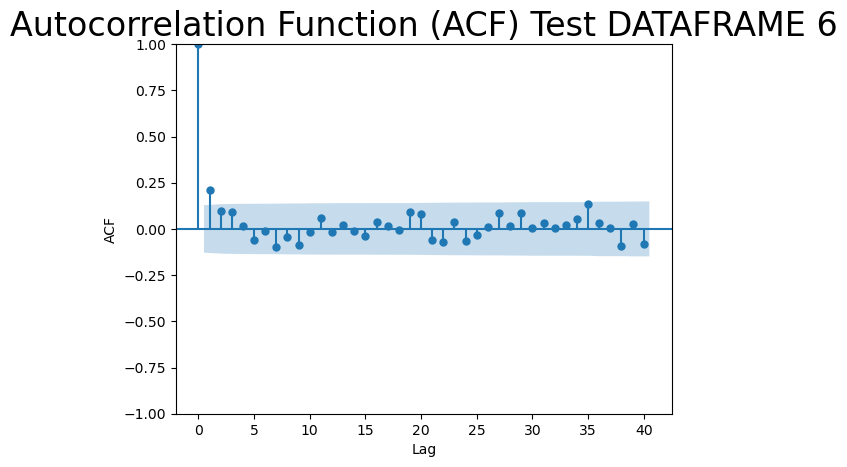

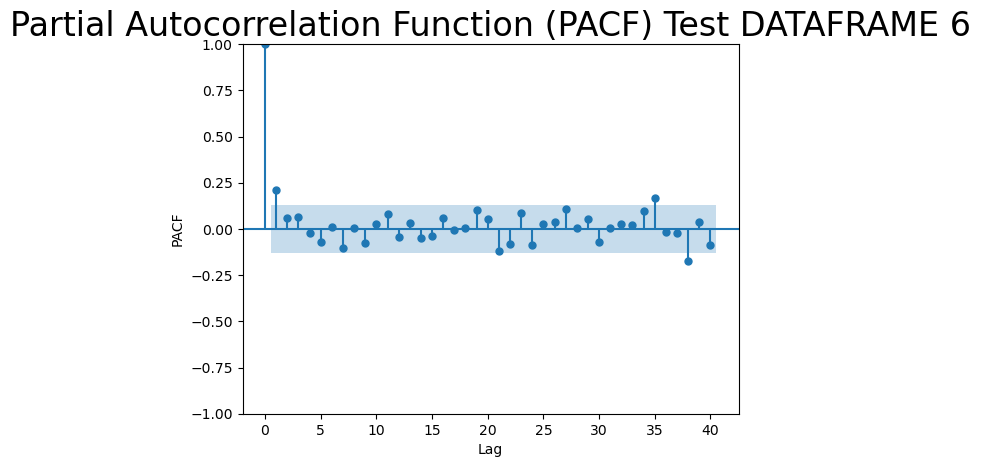

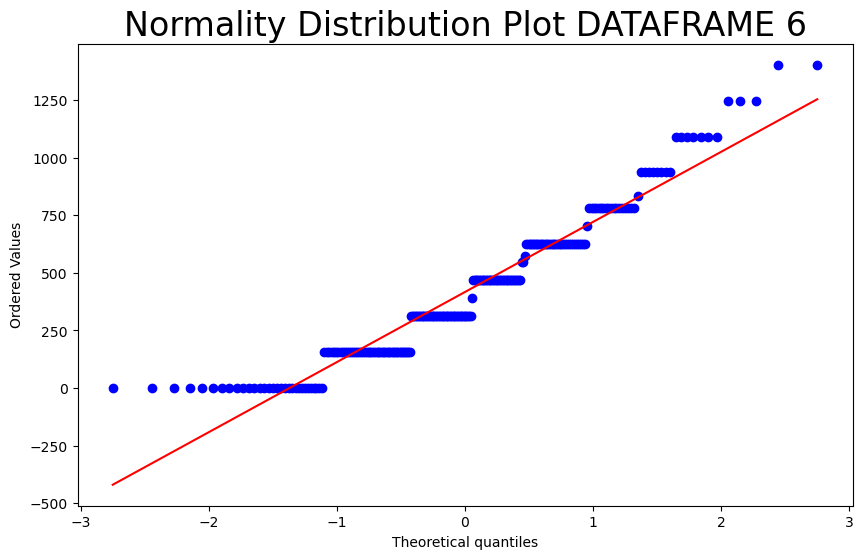

 the adf_test results are: (-12.276346644398515, 8.415642641154828e-23, 0, 232, {'1%': -3.458854867412691, '5%': -2.8740800599399323, '10%': -2.573453223097503}, 2749.7376508788616)
 P-Value from Shapiro is : 5.664227309409853e-09
 P-Value Ljung-Box l
DataFrame 7:


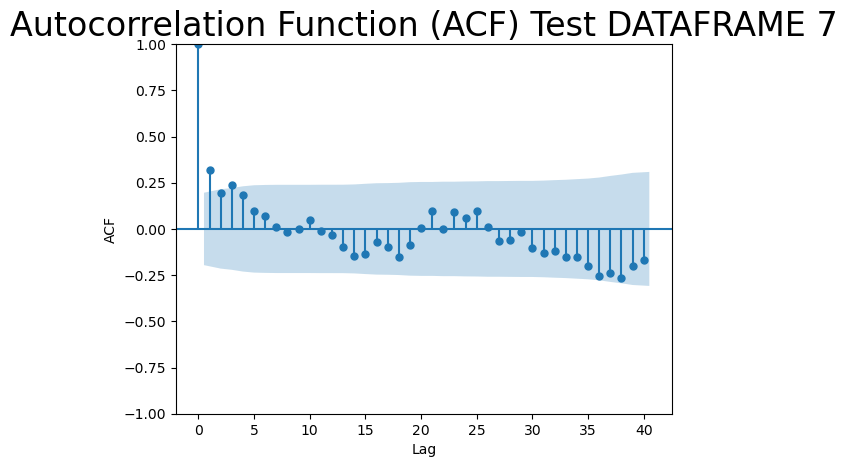

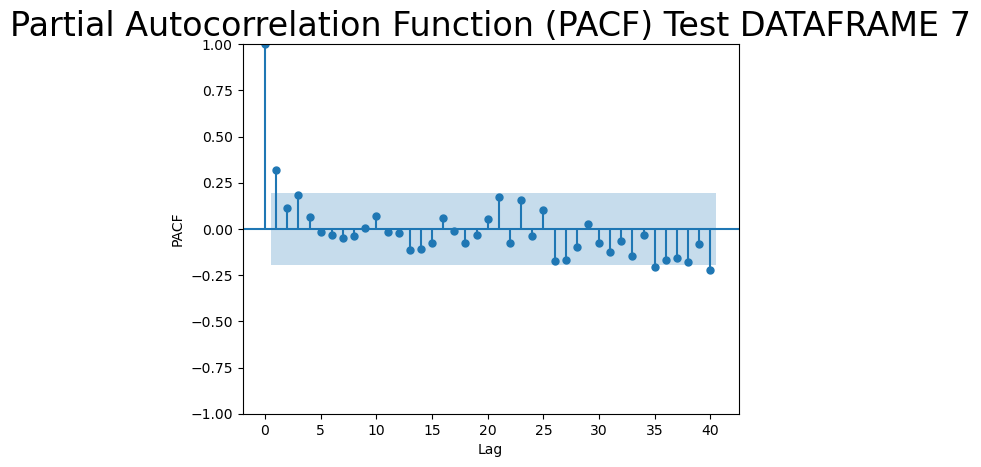

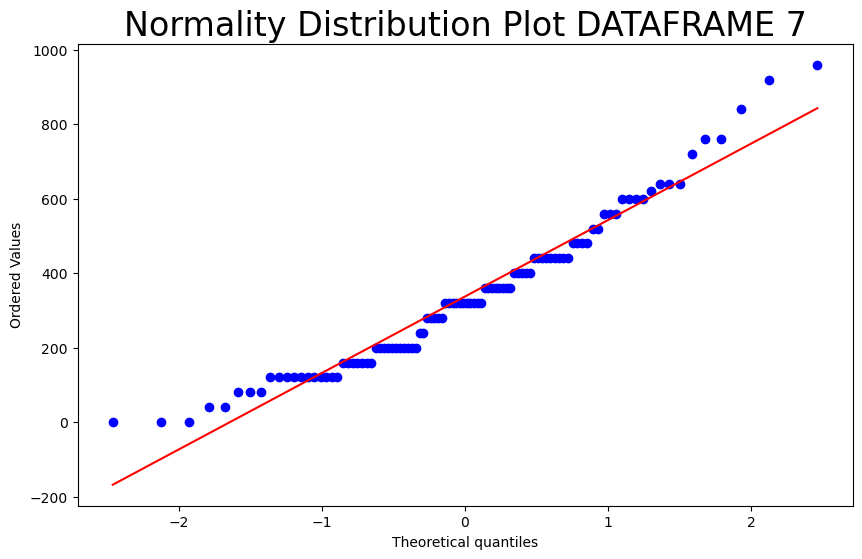

 the adf_test results are: (-7.157657891234928, 3.02511592941932e-10, 0, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 776.304949670072)
 P-Value from Shapiro is : 0.0018063383176922798
 P-Value Ljung-Box l
DataFrame 8:


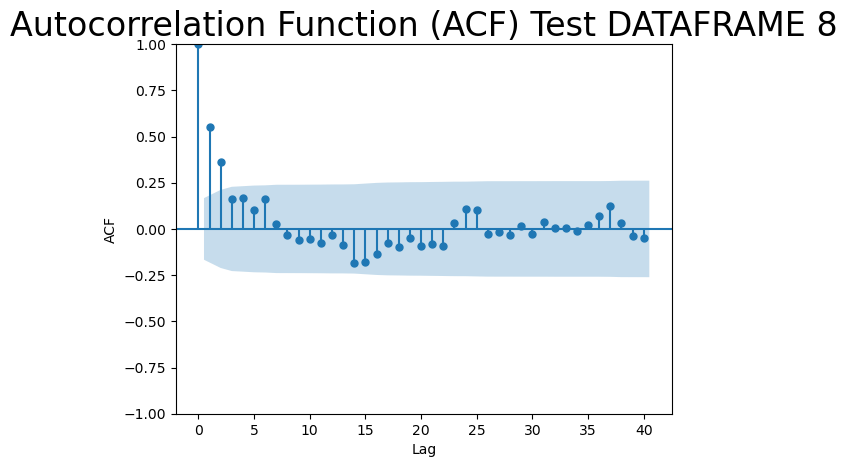

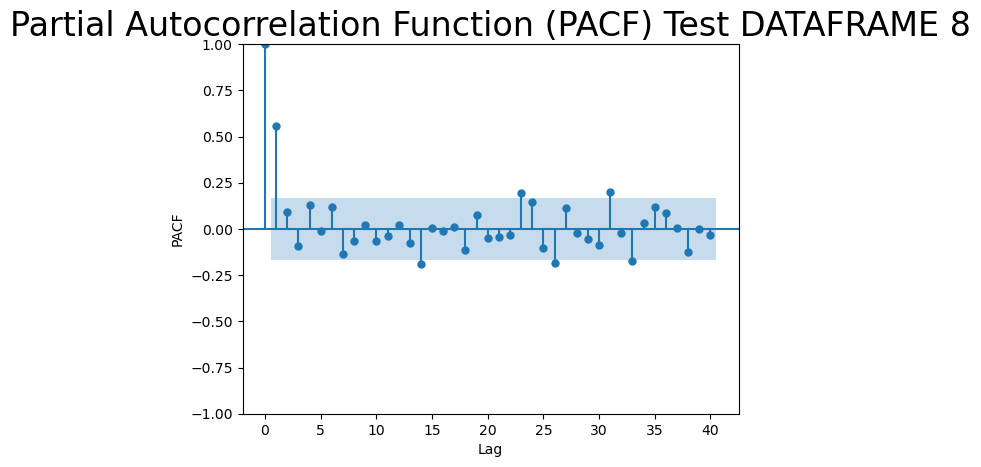

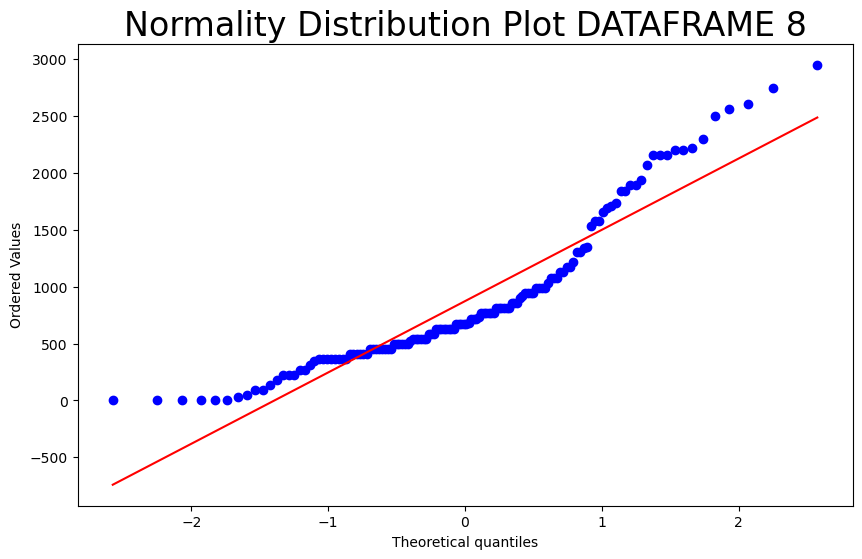

 the adf_test results are: (-6.138863886971013, 8.062027266201796e-08, 0, 137, {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603}, 1494.9736369981692)
 P-Value from Shapiro is : 6.181947842520685e-09
 P-Value Ljung-Box l
DataFrame 9:


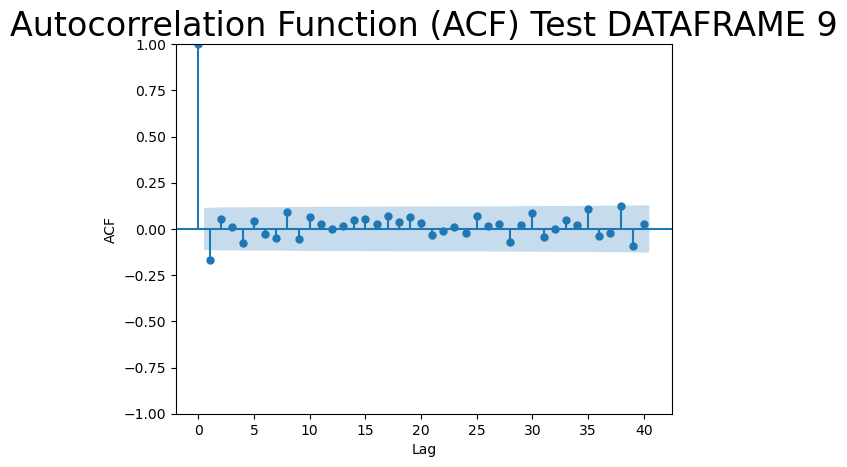

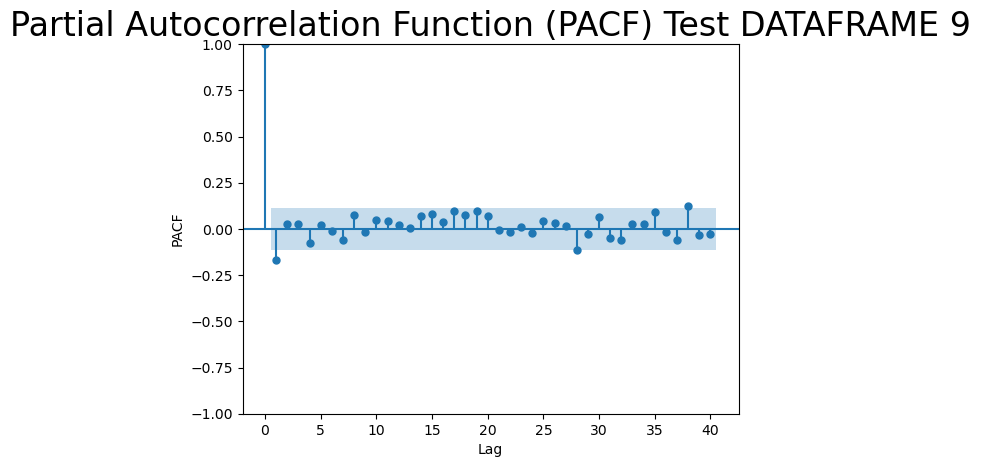

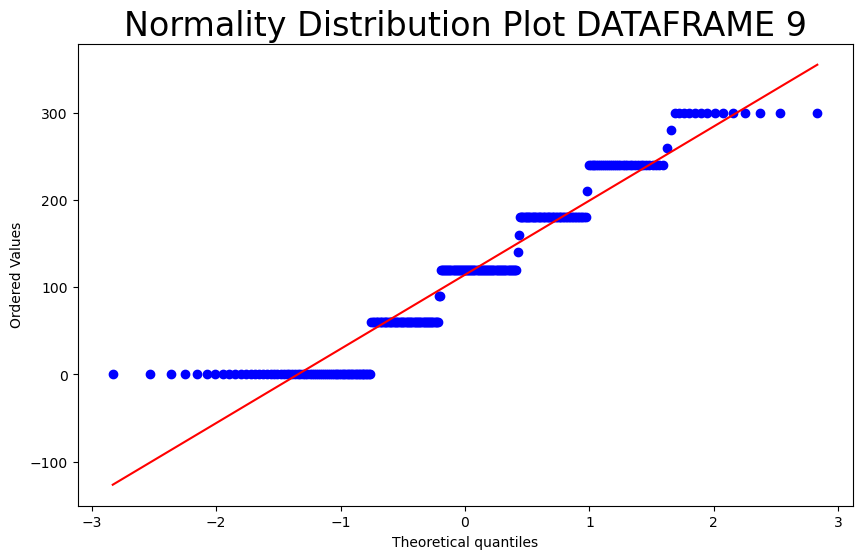

 the adf_test results are: (-20.347406400236594, 0.0, 0, 298, {'1%': -3.4524859843440754, '5%': -2.871288184343229, '10%': -2.571964047565425}, 3052.3665728287406)
 P-Value from Shapiro is : 6.473569510306865e-12
 P-Value Ljung-Box l
DataFrame 10:


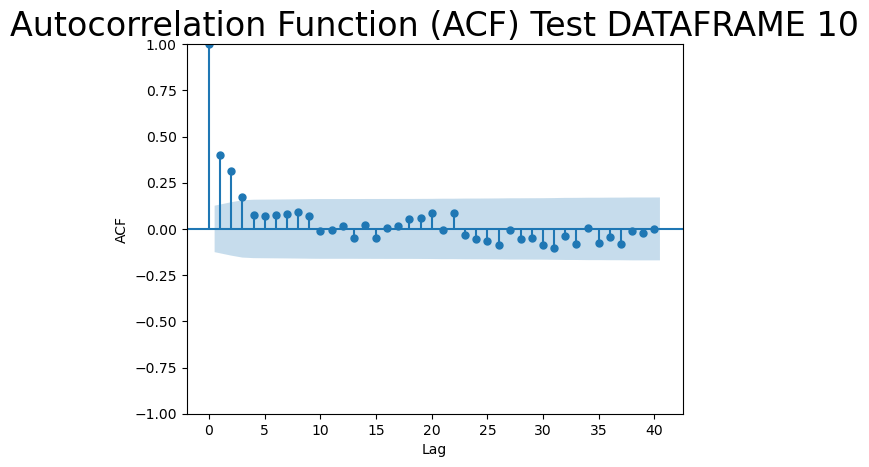

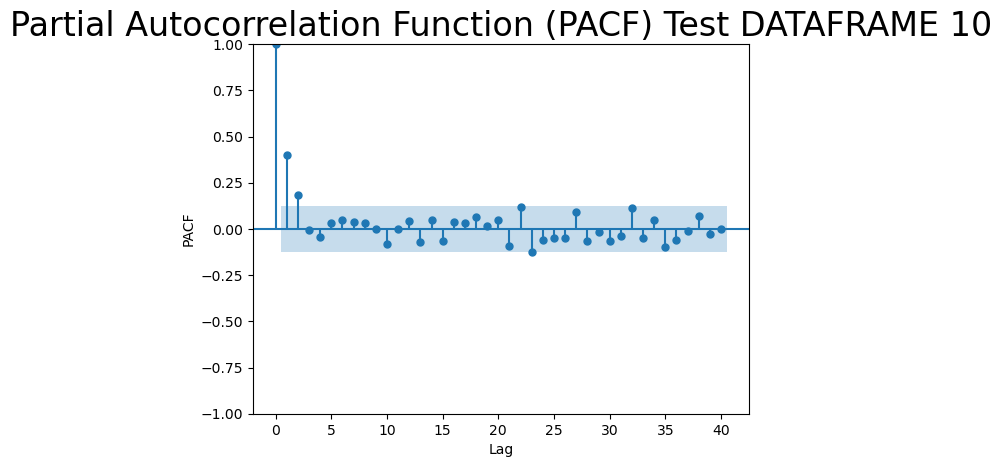

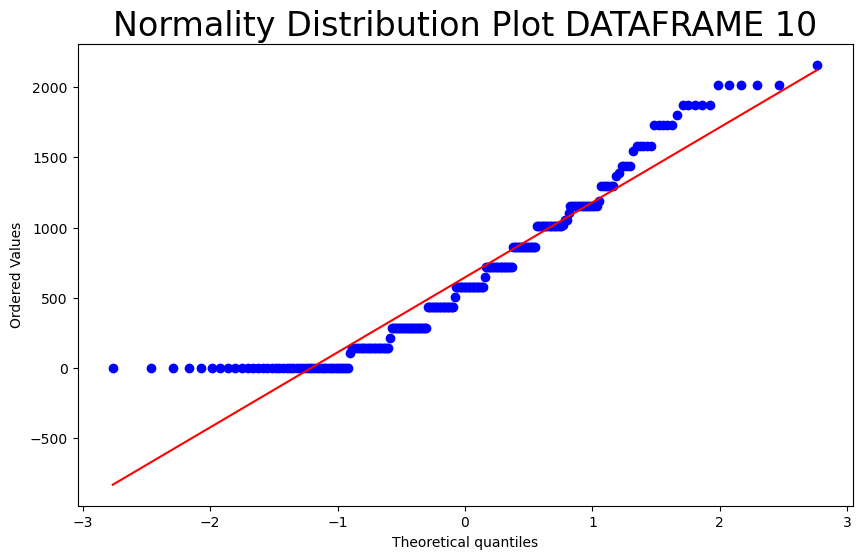

 the adf_test results are: (-6.999268904078773, 7.394105171851865e-10, 1, 241, {'1%': -3.4577787098622674, '5%': -2.873608704758507, '10%': -2.573201765981991}, 3097.297840357939)
 P-Value from Shapiro is : 2.492600847947557e-10
 P-Value Ljung-Box l
DataFrame 11:


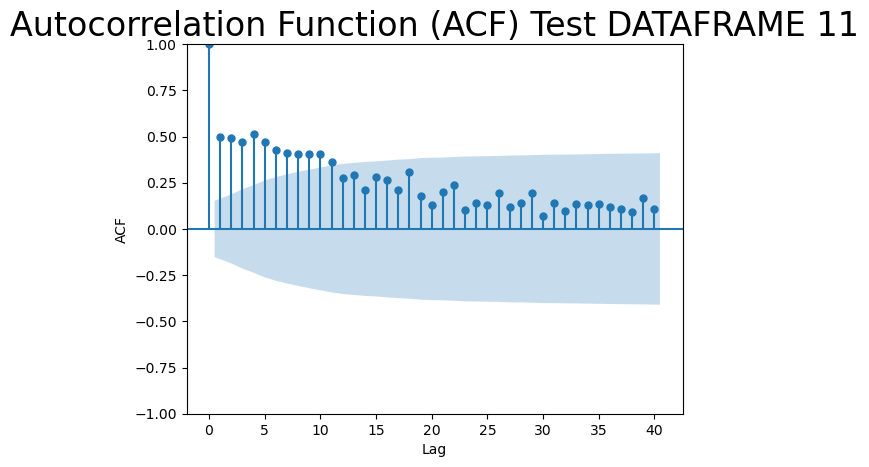

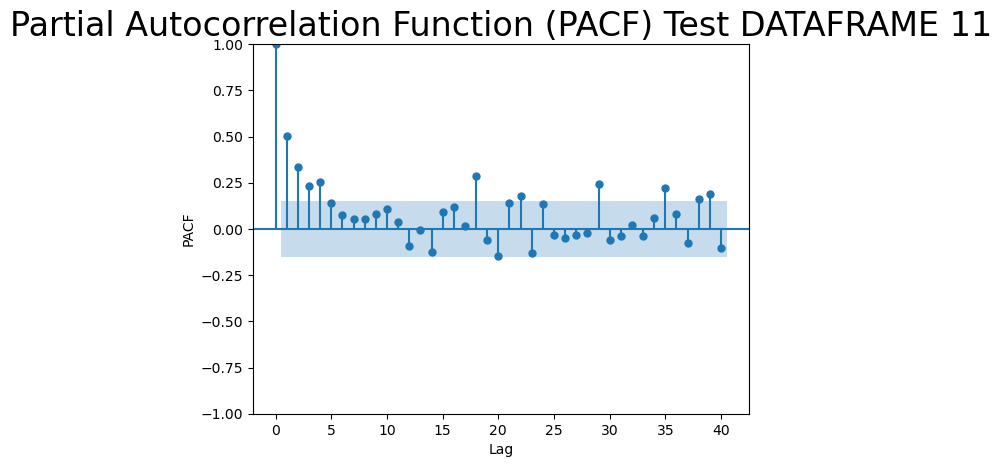

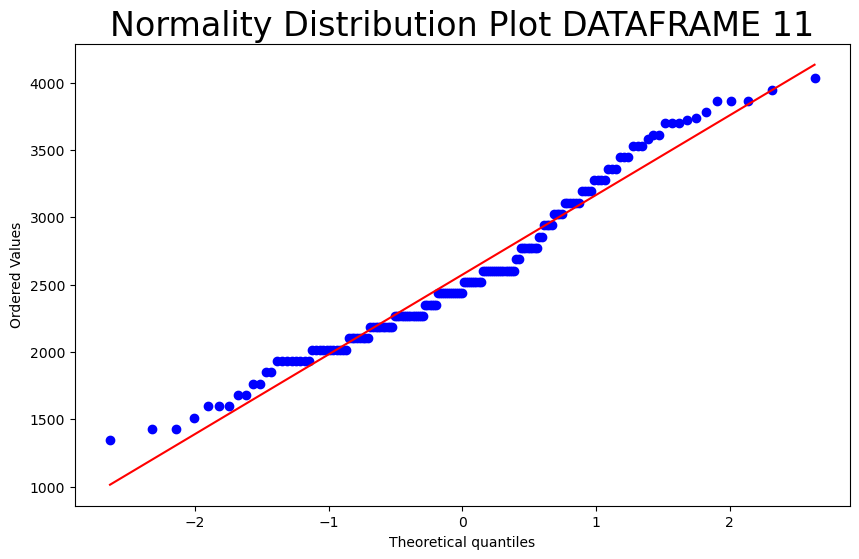

 the adf_test results are: (-1.6570209808515723, 0.4533813968445551, 4, 160, {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}, 1884.5017515869547)
 P-Value from Shapiro is : 0.0003962377377320081
 P-Value Ljung-Box l
DataFrame 12:


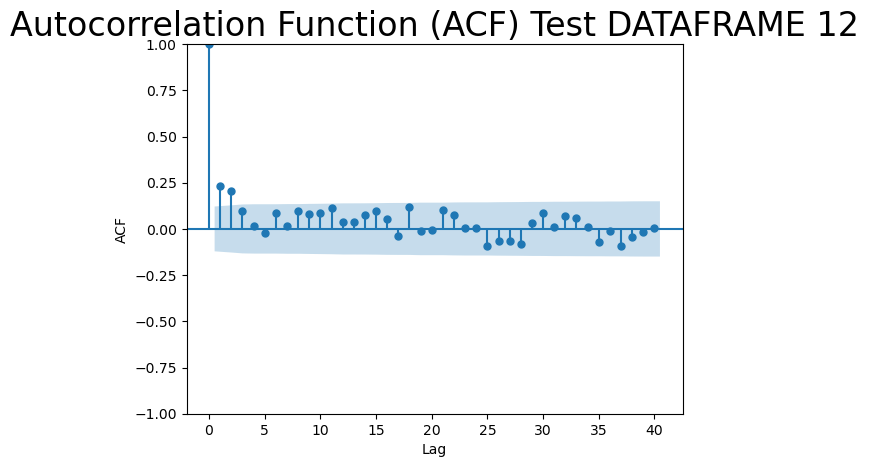

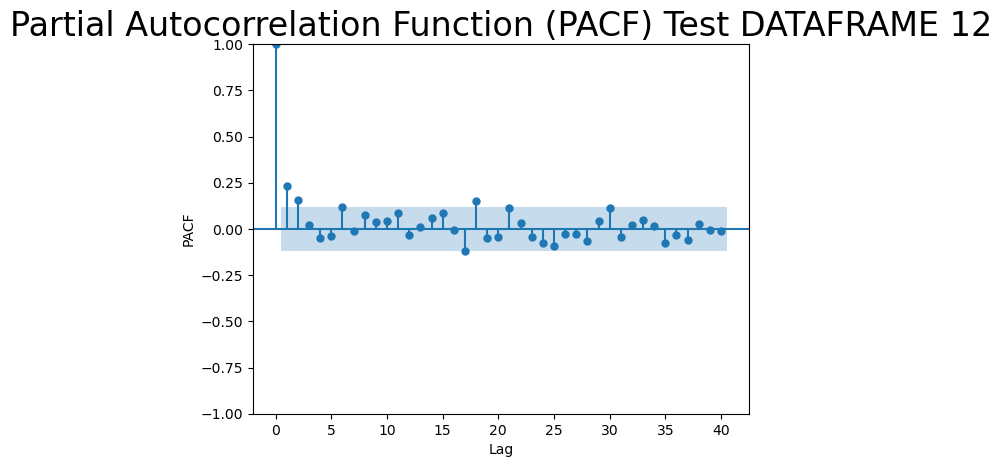

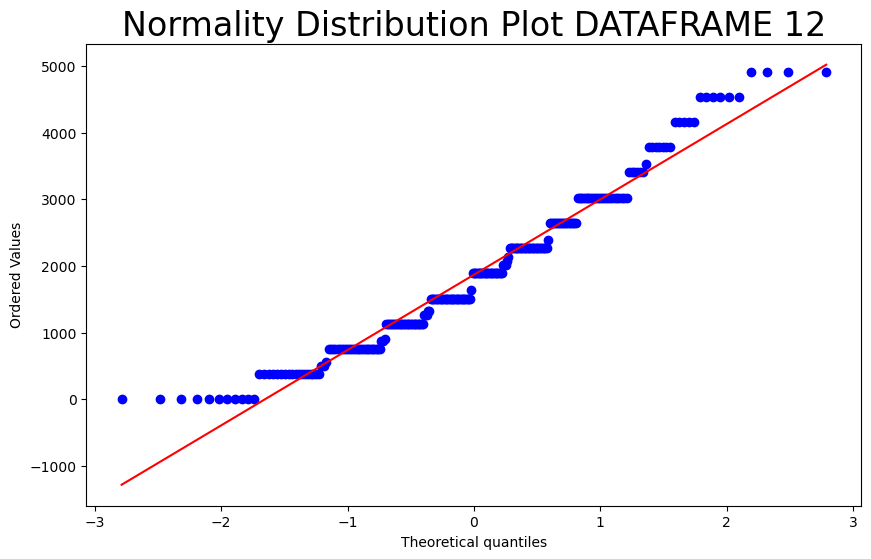

 the adf_test results are: (-8.414488835434051, 2.0612478068896833e-13, 1, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3720.7818550258244)
 P-Value from Shapiro is : 1.3184419458411867e-06
 P-Value Ljung-Box l
DataFrame 13:


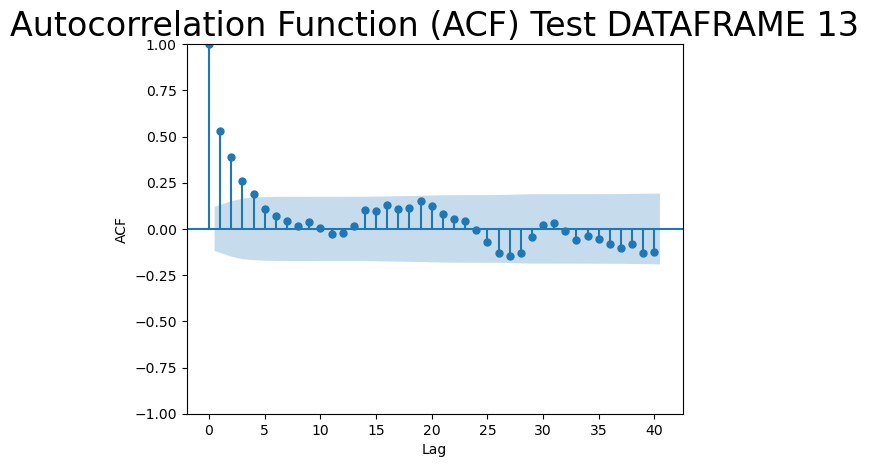

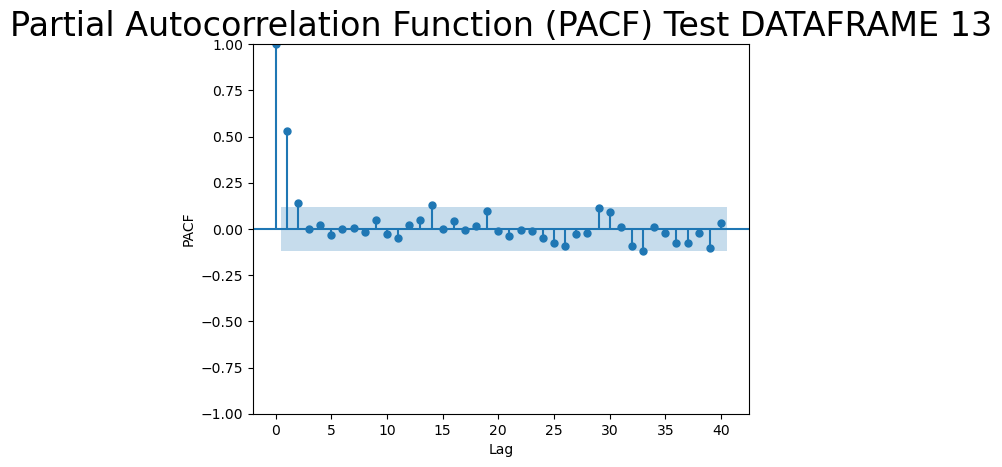

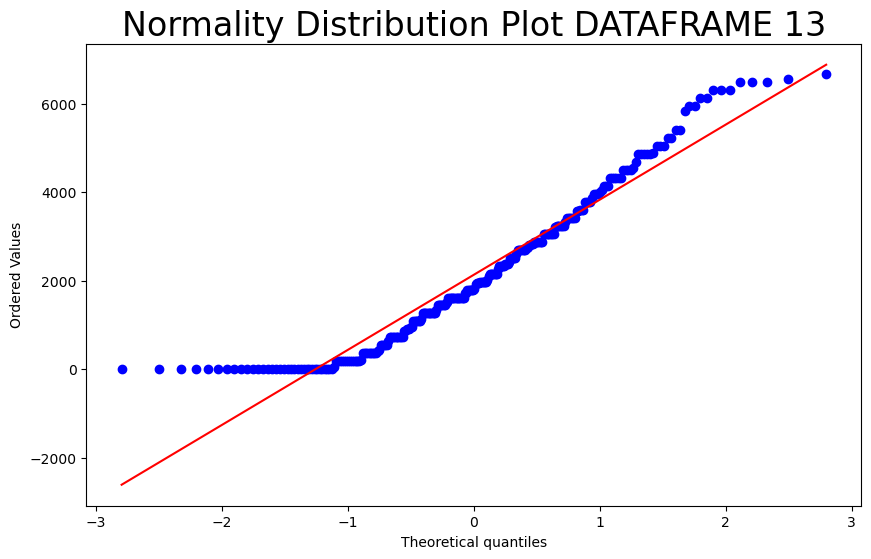

 the adf_test results are: (-6.76113307166692, 2.790411113442606e-09, 1, 266, {'1%': -3.455175292841607, '5%': -2.8724677563219485, '10%': -2.57259315846006}, 3952.9968525236645)
 P-Value from Shapiro is : 9.0712015676786e-10
 P-Value Ljung-Box l
DataFrame 14:


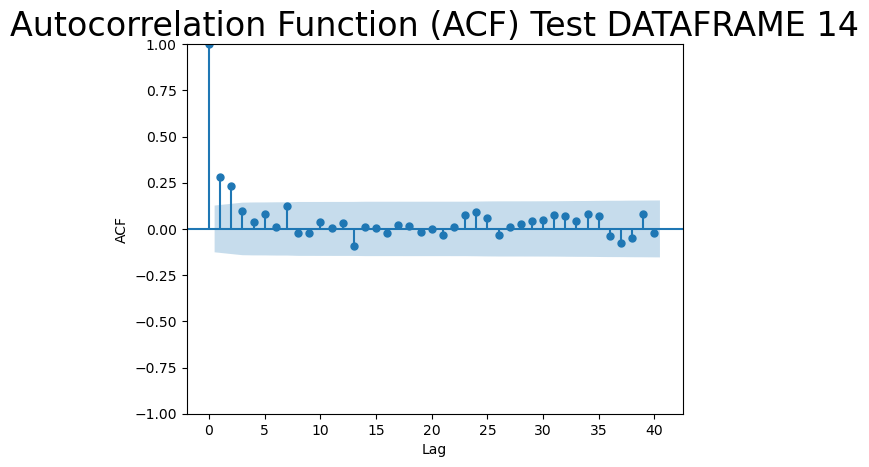

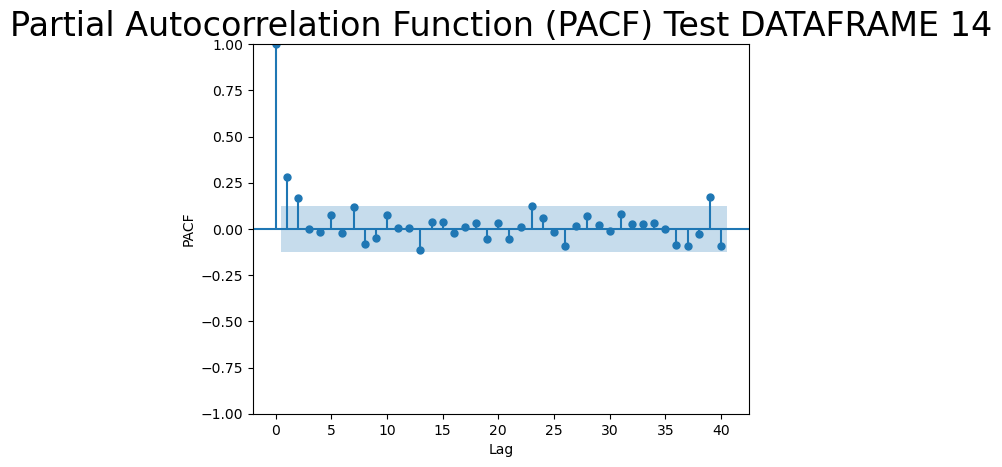

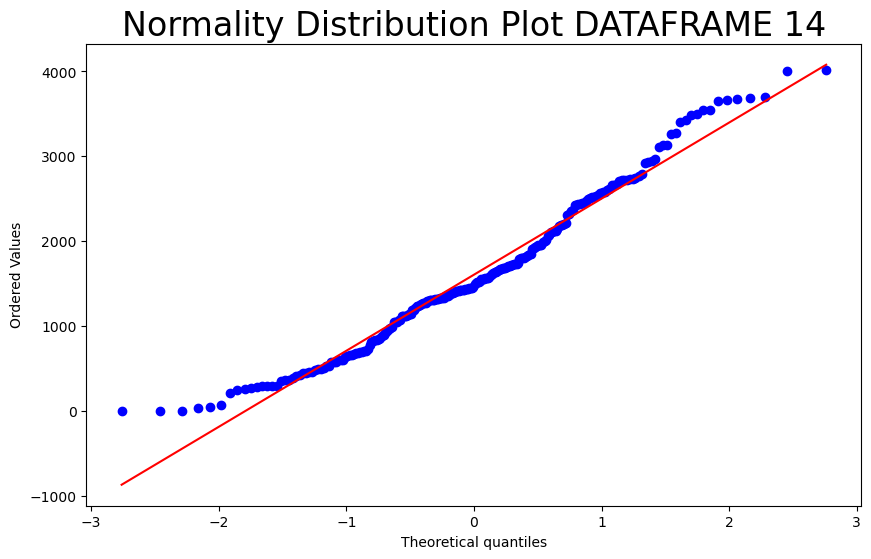

 the adf_test results are: (-7.814504036998563, 6.927723034193708e-12, 1, 238, {'1%': -3.458128284586202, '5%': -2.873761835239286, '10%': -2.5732834559706235}, 3256.7031295076044)
 P-Value from Shapiro is : 0.00012642428919207305
 P-Value Ljung-Box l


In [117]:
for i, df_subdividido in enumerate(new_df):
    Stationary(new_df,i)


## TIME ANALYSIS

In [118]:

def ARIMA(data, position):    
 
    df = data[position]
    obs= df['Units']
    
    # Fit an ARIMA 
    model = auto_arima(obs,
                      start_p=0,
                      start_q=0,
                      max_p=5,
                      max_q=5,
                       m=1,
                      test='adf',
                      seasonal=False,
                      d=0,
                     max_d=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
    
    print(f"DataFrame {i + 1}:, {model.summary()}")
    


In [119]:
for i, df_subdividido in enumerate(new_df):
    ARIMA(new_df,i)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3220.832, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3052.468, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3141.111, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3025.979, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3023.815, Time=0.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3022.548, Time=0.03 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3023.591, Time=0.03 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-p

 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2984.618, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2983.748, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2982.785, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2982.245, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2988.675, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2984.043, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2983.971, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2984.581, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.894 seconds
DataFrame 1:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  186
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1488.122
Date:                Mon, 03 Jul 2023   AIC                           2982.245
Time

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2020.294, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1997.020, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1984.014, Time=0.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1983.160, Time=0.02 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1985.010, Time=0.02 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1984.951, Time=0.04 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-p

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1986.956, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1962.444, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1960.585, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1959.635, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1957.963, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1955.977, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1957.965, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1959.977, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.445 seconds
DataFrame 2:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  118
Model:                        SARIMAX   Log Likelihood                -975.989
Date:                Mon, 03 Jul 2023   AIC                           1955.977
Time

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2052.558, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2052.791, Time=0.06 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2054.558, Time=0.12 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2054.647, Time=0.10 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 0.822 seconds
DataFrame 3:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1019.279
Date:                Mon, 03 Jul 2023   AIC                           2052.558
Time:                        13:41:03   BIC                           2073.952
Sample:                             0   HQIC                          2061.247
                                - 157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    276.8716     50.985      5.430      0.00

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3859.687, Time=0.21 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=3866.518, Time=0.11 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3836.689, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3837.090, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3837.148, Time=0.04 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3833.580, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3836.246, Time=0.05 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=3839.993, Time=0.16 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=3835.094, Time=0.28 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0] intercept
Total fit time: 2.083 seconds
DataFrame 4:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -1908.790
Date:                Mon, 03 Jul 2023   AIC                           3833.580
Time:                        13:41:06   BIC                           3860.656
Sample:                             0   HQIC        

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3416.331, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3426.765, Time=0.12 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=3418.090, Time=0.12 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=3424.979, Time=0.21 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3408.376, Time=0.07 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3427.886, Time=0.16 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3407.758, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3426.134, Time=0.04 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 1.034 seconds
DataFrame 5:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  231
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1696.879
Date:                Mon, 03 Jul 2023   AIC                           3407.758
Time:                        13:41:07   BIC                           3431.855
Sample:                             0   HQIC                          3417.477
                                - 231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3371.623, Time=0.03 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-p

 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3337.122, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3335.227, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3334.196, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3332.976, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3341.240, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3334.448, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3334.192, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3336.074, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.897 seconds
DataFrame 6:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  233
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1663.488
Date:                Mon, 03 Jul 2023   AIC                           3332.976
Time

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1375.882, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1429.898, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1364.220, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1353.533, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1352.853, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1354.512, Time=0.05 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-p

 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1352.091, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1350.597, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1348.942, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1350.529, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1412.638, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1342.781, Time=0.07 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1346.386, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1344.475, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1344.773, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1344.768, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1353.102, Time=0.01 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1347.441, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1345.187, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.109 seconds
DataFrame 7:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -667.390
Date:                Mon, 03 Jul 2023   AIC                           1342.781
Time:                        13:41:09   BIC                           1353.201
Sample:                             0   HQIC                          1346.998
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2155.184, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2151.291, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2150.449, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2201.999, Time=0.03 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2146.793, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2189.386, Time=0.05 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2146.611, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.14 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,4)(0,0,0)[0]             : AIC=2148.307, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.14 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.19 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2139.290, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2140.716, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2140.583, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2141.219, Time=0.13 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=2141.381, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2139.731, Time=0.06 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=2142.117, Time=0.08 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2140.359, Time=0.10 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=2143.192, Time=0.16 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 2.347 seconds
DataFrame 8:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  138
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -1062.645
Date:                Mon, 03 Jul 2023   AIC                           2139.290
Time:                        13:41:11   BIC                           2159.781
Sample:                             0   HQIC                          2147.617
                                - 138                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3767.436, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3633.794, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3602.672, Time=0.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3596.526, Time=0.03 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3583.392, Time=0.04 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3530.083, Time=0.29 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3531.577, Time=0.23 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3530.487, Time=0.09 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0]          
Total fit time: 1.345 seconds
DataFrame 9:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  299
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -1758.041
Date:                Mon, 03 Jul 2023   AIC                           3530.083
Time:                        13:41:12   BIC                           3555.986
Sample:                             0   HQIC                          3540.450
                                - 299                                         
Covariance Type:                  opg                                         
                 coef  

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3744.890, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3728.385, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3735.938, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3734.138, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3729.027, Time=0.17 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-p

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3716.659, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3718.286, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3714.641, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3721.028, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3716.640, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3718.653, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.996 seconds
DataFrame 10:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1853.321
Date:                Mon, 03 Jul 2023   AIC                           3714.641
Time:                        13:41:13   BIC                           3728.613
Sample:                             0   HQIC                          3720.269
                                - 243 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2495.677, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2497.668, Time=0.13 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2513.586, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.506 seconds
DataFrame 11:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  165
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1243.927
Date:                Mon, 03 Jul 2023   AIC                           2493.854
Time:                        13:41:14   BIC                           2503.172
Sample:                             0   HQIC                          2497.637
                                - 165                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.001   1120.620      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=4410.591, Time=0.26 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4410.297, Time=0.20 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4408.277, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4410.127, Time=0.12 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4411.398, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4417.792, Time=0.20 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4406.059, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4404.128, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4406.169, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4402.167, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4406.827, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4404.058, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.758 seconds
DataFrame 12:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  261
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2197.084
Date:                Mon, 03 Jul 2023   AIC                           4402.167
Tim

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-p

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4720.020, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4865.906, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4701.450, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4700.553, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4699.226, Time=0.03 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4700.465, Time=0.04 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-p

 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4676.862, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4674.998, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4673.018, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4676.476, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4674.972, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4674.268, Time=0.02 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4676.972, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.992 seconds
DataFrame 13:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  268
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2332.509
Date:                Mon, 03 Jul 2023   AIC                           4673.018
Time:                        13:41:17   BIC                           4687.382
Sample:                             0   HQIC                          4678.788
                                - 268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    833.5157    179.707      4.638      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3937.405, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3935.735, Time=0.19 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3934.062, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3936.520, Time=0.13 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3935.912, Time=0.16 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=3938.139, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3930.912, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3928.922, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3931.328, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3926.928, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3931.750, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3928.991, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.730 seconds
DataFrame 14:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1959.464
Date:                Mon, 03 Jul 2023   AIC                           3926.928
Tim

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-p

In [124]:
parameters={
    0:(1,0,0),
    1:(0,1,1),
    2:(4,0,1),
    3:(5,0,1),
    4:(4,0,0),
    5:(2,0,1),
    6:(1,0,1),
    7:[2,0,3],
    8:(5,0,1),
    9:[2,0,0],
    10:[1,0,1],
    11:[2,0,0],
    12:[2,0,0],
    13:[2,0,0]
    
}

In [265]:
from statsmodels.tsa.arima.model import ARIMA

def ARIMA_M(data, position,param):
 
    df = data[position].copy()
    obs= df[['year-week','Units']]
    ff=df['Units']
    
    #Split the data into training and testing sets
    train_size = int(len(obs) * 0.8)  # 80% for training, 20% for testing
    time=obs[train_size+1:]
    train_data, test_data = ff[:train_size], ff[train_size:]

    # Prepare the training and testing data
    X_train = train_data.values[:-1]  # Use the previous values as features
    y_train = train_data.values[1:]   # Predict the next value

    X_test = test_data.values[:-1]
    y_test = test_data.values[1:]
    
    
    # Fit an ARIMA 
    model = ARIMA(X_train, order=param[position])
    model_fit = model.fit()
    residuals= model.fit().resid
        
    print(f"DataFrame {i + 1}:, {model_fit.summary()}")

    
    #Forecast the next test y
    predictions=model_fit.forecast(steps=len(y_test))
    
     # Forecast the next 8 values
    forecast_values = model_fit.forecast(steps=8)
    
    
    # Create a DataFrame for the forecasted vales       
    data_frame_length = obs.tail(1).index[0]
    starting_number = data_frame_length 
    indexes = list(range(starting_number, starting_number + 8))
    forecast = pd.DataFrame(forecast_values)
    forecast.index=indexes
    
    
    
    # Evaluate predictions
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape=mean_absolute_percentage_error(y_test, predictions)
    
             
    # Generate predictions
    # Perform ACF test
    plot_acf(residuals, lags = 20)
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.title(f'Autocorrelation Function (ACF) RESIDUALS Test DATAFRAME {i + 1}',size=24)
    plt.show()

    # Perform PACF test
    plot_pacf(residuals, lags = 20,method="ols")
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.title(f'Partial Autocorrelation Function (PACF) RESIDUALS Test DATAFRAME {i + 1}',size=24)
    plt.show()
     
    # Create a dataframe for visualization
    forecast_data = pd.DataFrame({'year-week': time['year-week'], 'Actual': y_test, 'Predicted': predictions})
    # Plot the forecasted values
    plt.figure(figsize=(9, 3))
    plt.plot(forecast_data['year-week'], forecast_data['Actual'], label='Actual')
    plt.plot(forecast_data['year-week'], forecast_data['Predicted'], label='Predicted')
    plt.xlabel('Year-Week')
    plt.ylabel('Units')
    plt.title('Forecasted Values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
 
 
    
    print(f"MAPE: {mape}")


    
  
   

In [266]:
for i, df_subdividido in enumerate(new_df):
    ARIMA_M(new_df,i,parameters)

DataFrame 1:,                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  147
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1177.669
Date:                Wed, 05 Jul 2023   AIC                           2361.338
Time:                        11:23:24   BIC                           2370.309
Sample:                             0   HQIC                          2364.983
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1168.5714     95.586     12.225      0.000     981.226    1355.917
ar.L1          0.2466      0.068      3.653      0.000       0.114       0.379
sigma2      5.331e+05      6e+04      

In [263]:
from sklearn.multioutput import MultiOutputRegressor

def XGBOOST(data, position):
 
    df = data[position].copy()
    dto=df[['year-week']] 
    obs1= df[['Units']]
    

    
    # Split the data into training and testing sets
    train_size = int(len(obs1) * 0.8)  # 80% for training, 20% for testing
    train_data, test_data = obs1[:train_size], obs1[train_size:]
    train_time, test_time = dto[:train_size], dto[train_size:]
    
     # Prepare the training and testing data
    X_train = train_data.values[:-1]  # Use the previous values as features
    y_train = train_data.values[1:]   # Predict the next value
    
    X_test = test_data.values
    y_test = test_data.values
    
     
    #predic=for_predic.values
    
     # Reshape the input data to match the expected format of XGBoost
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    #predic_values=predic.reshape(-1,1)
    
    
    # Create and train the XGBoost model
    model = XGBRegressor()
    model.fit(X_train, y_train)
    

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    #Residuals
    residuals = y_test - y_pred
    residuals = residuals.flatten()

    
      
    print(f'                   XGBOOST RESULTS FOR  DATAFRAME {i + 1}')


      
    mape=mean_absolute_percentage_error(y_test, y_pred)
    print(f"MAPE: {mape}")
    
      
    # Create a dataframe for visualization
    forecast_data = pd.DataFrame({ 'year-week': test_time['year-week'], 'Actual': test_data['Units'],'Predicted': y_pred})
    # Plot the forecasted values
    plt.figure(figsize=(9, 3))
    plt.plot(forecast_data['year-week'], forecast_data['Actual'], label='Actual')
    plt.plot(forecast_data['year-week'], forecast_data['Predicted'], label='Predicted')
    plt.xlabel('Year-Week')
    plt.ylabel('Units')
    plt.title('Forecasted Values')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()
    
    #PLOTTING RESIDUALS
   
      # Generate predictions
    # Perform ACF test
    plot_acf(residuals, lags = 10)
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.title(f'Autocorrelation Function (ACF) RESIDUALS Test DATAFRAME {i + 1}',size=14)
    plt.show()

    # Perform PACF test
    plot_pacf(residuals, lags = 10,method="ols")
    plt.xlabel('Lag')
    plt.ylabel('PACF')
    plt.title(f'Partial Autocorrelation Function (PACF) RESIDUALS Test DATAFRAME {i + 1}',size=14)
    plt.show()
     




    


                   XGBOOST RESULTS FOR  DATAFRAME 1
MAPE: 1.098458063447628


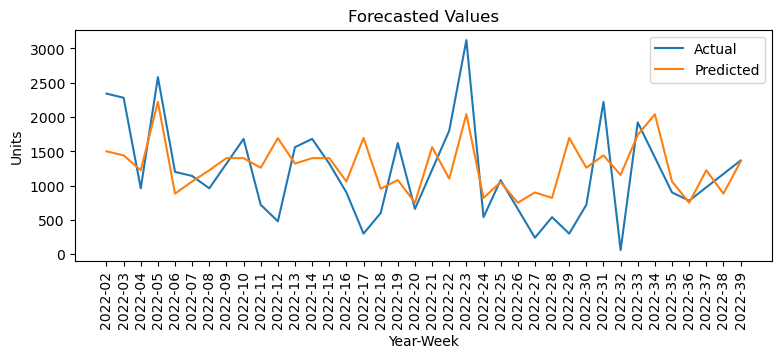

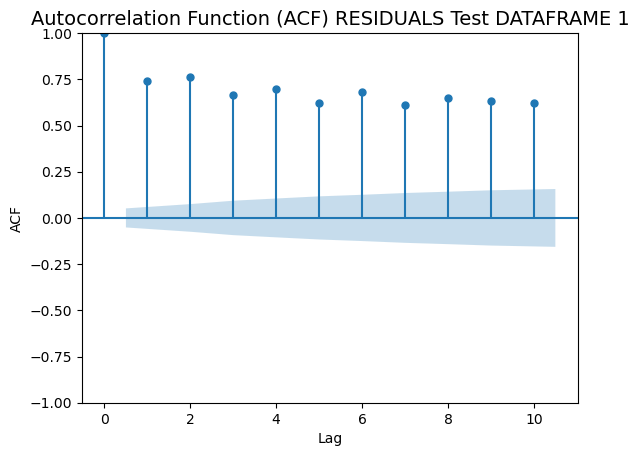

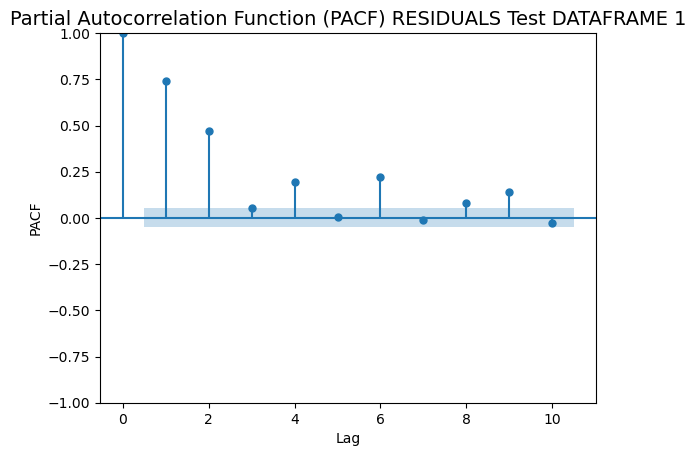

                   XGBOOST RESULTS FOR  DATAFRAME 2
MAPE: 2.1258651638991974


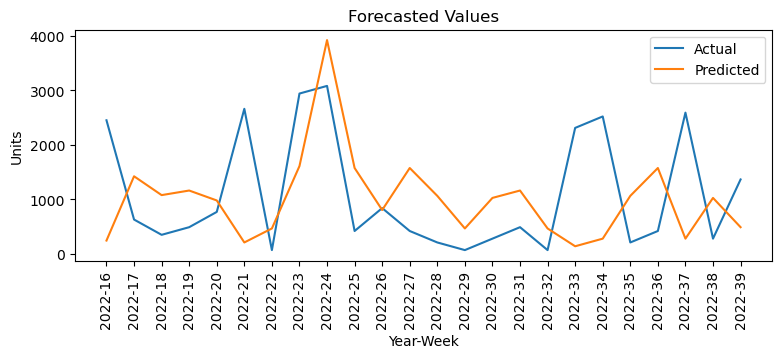

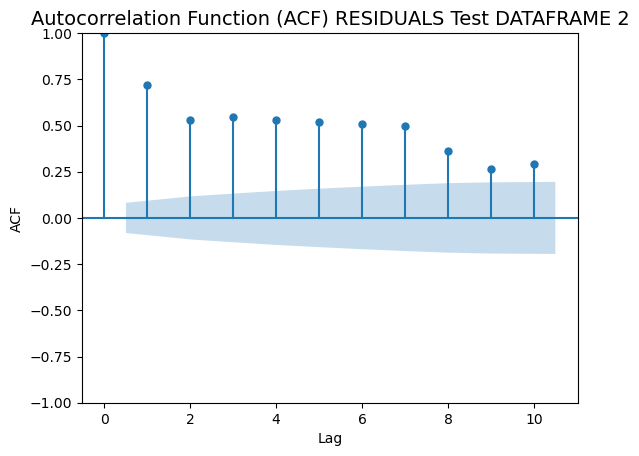

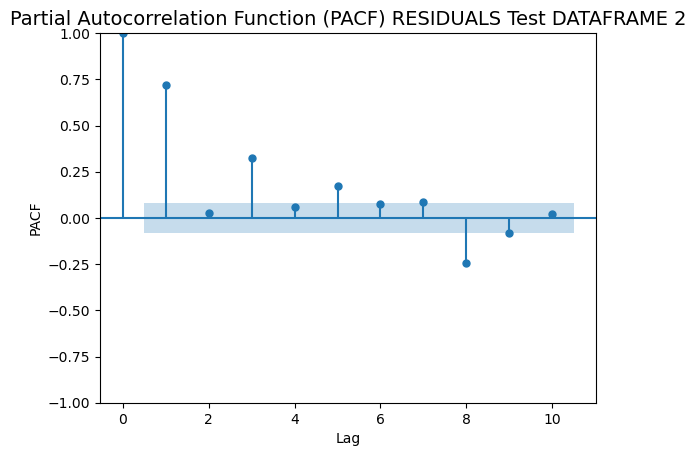

                   XGBOOST RESULTS FOR  DATAFRAME 3
MAPE: 1.4732011385293624


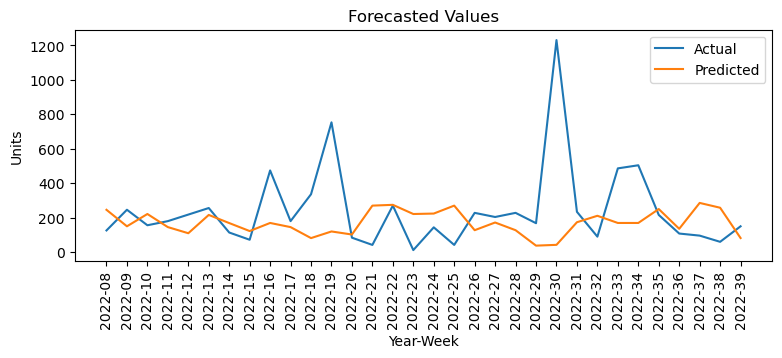

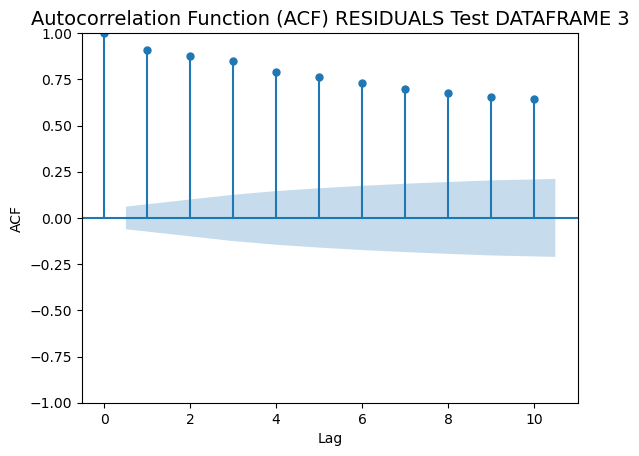

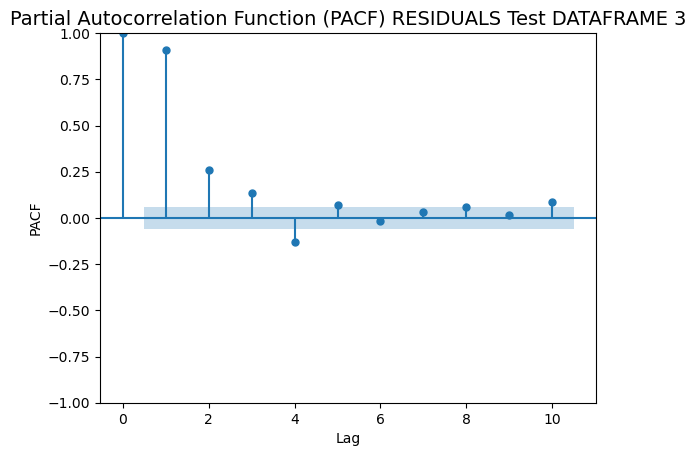

                   XGBOOST RESULTS FOR  DATAFRAME 4
MAPE: 5.949901020859942e+18


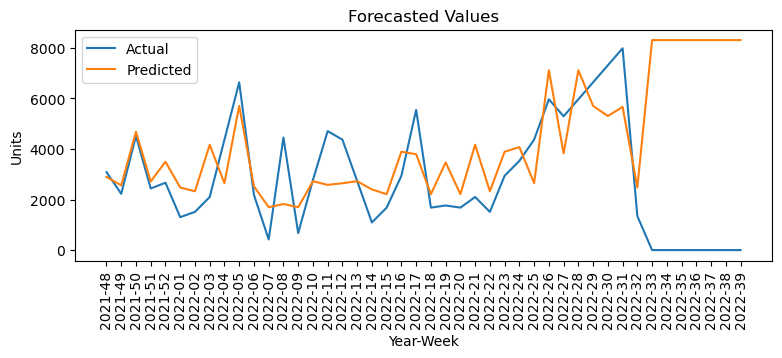

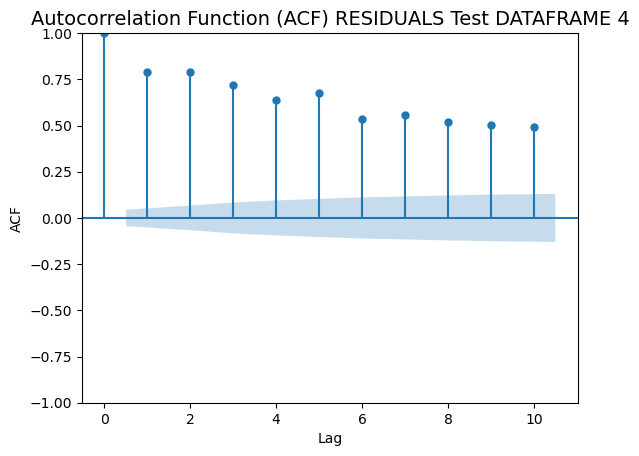

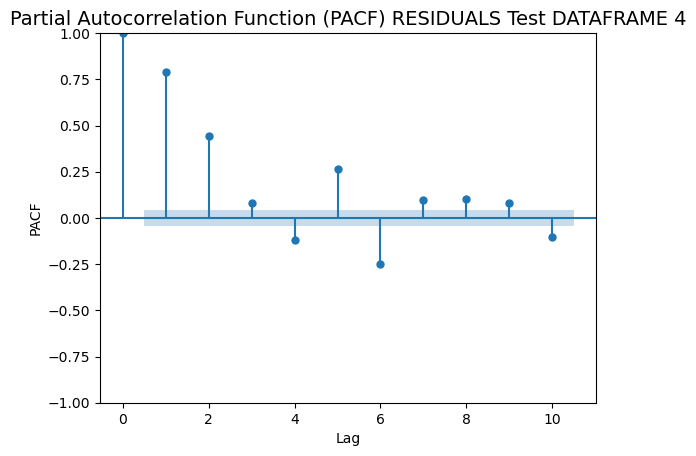

                   XGBOOST RESULTS FOR  DATAFRAME 5
MAPE: 4.139539074877372e+17


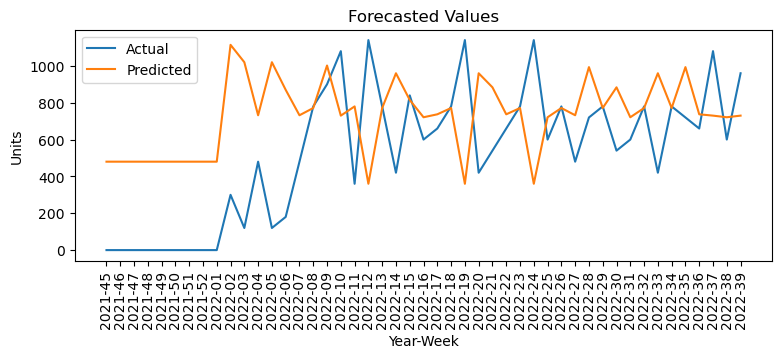

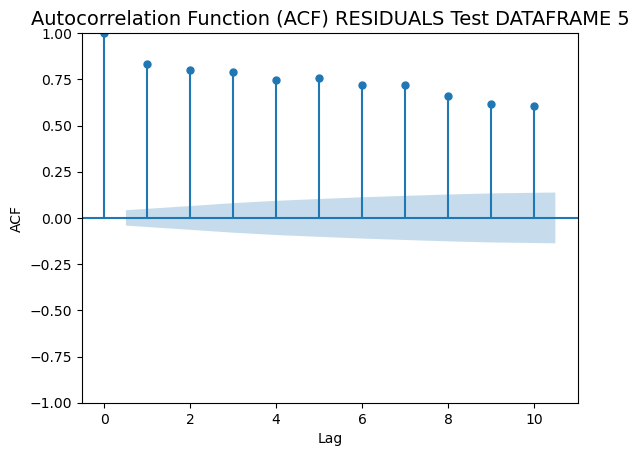

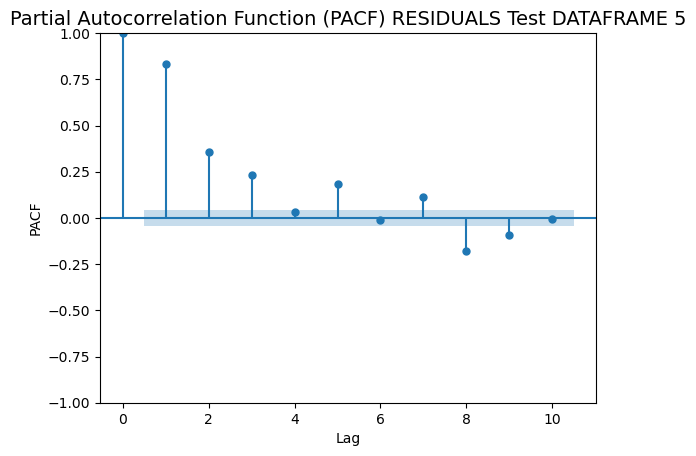

                   XGBOOST RESULTS FOR  DATAFRAME 6
MAPE: 9.566801692375346e+16


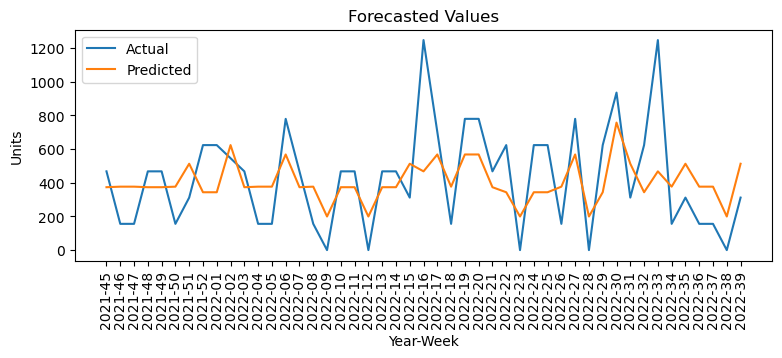

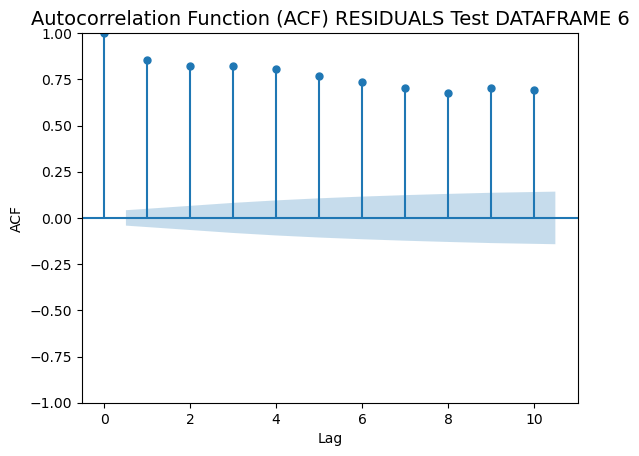

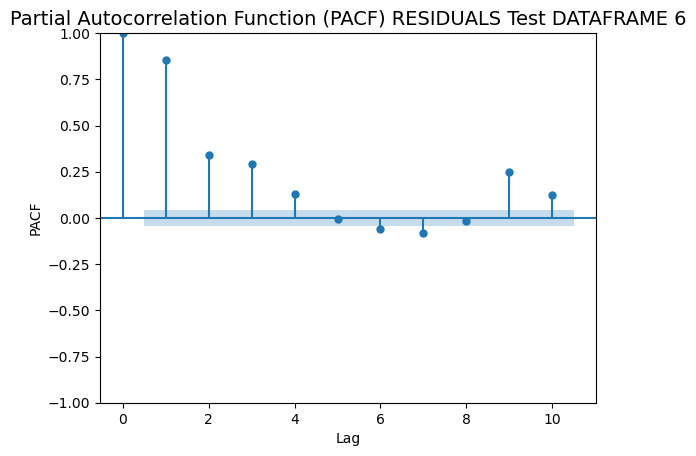

                   XGBOOST RESULTS FOR  DATAFRAME 7
MAPE: 0.592494389745924


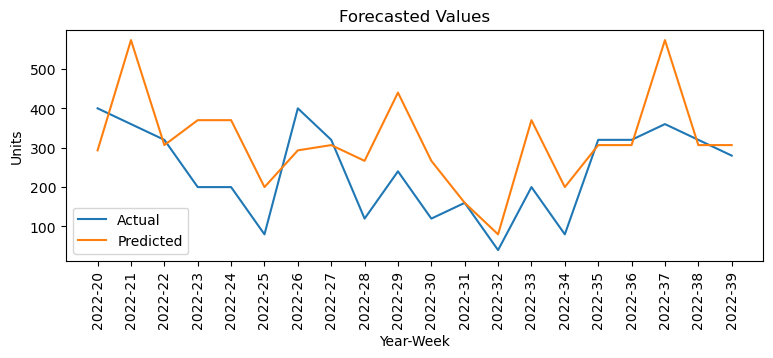

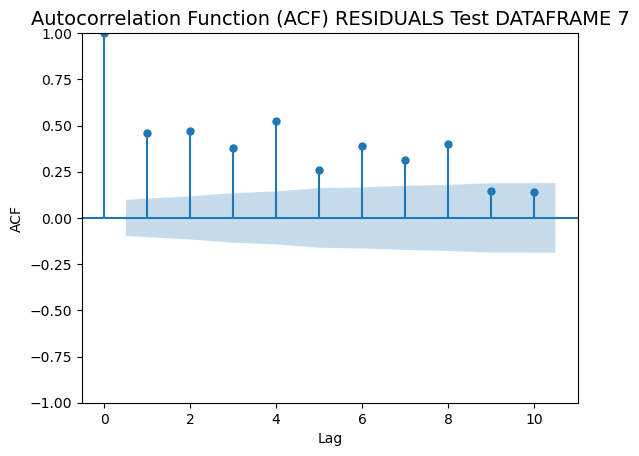

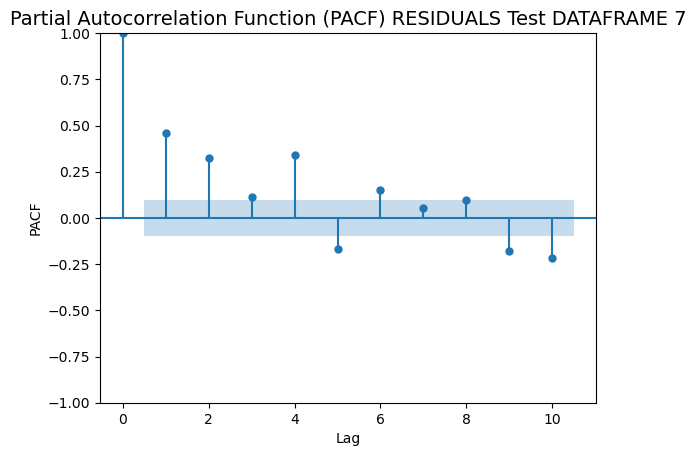

                   XGBOOST RESULTS FOR  DATAFRAME 8
MAPE: 3.6190395777042726e+17


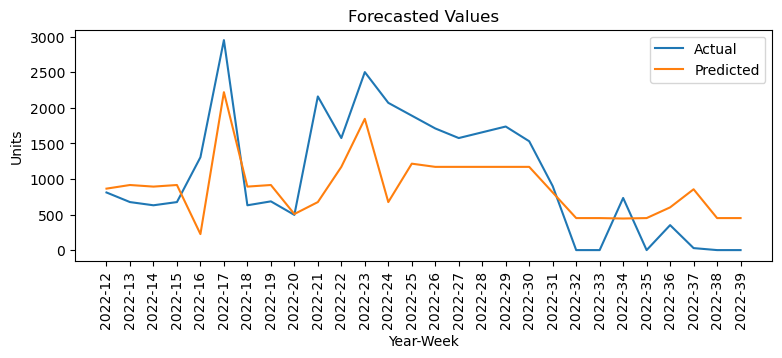

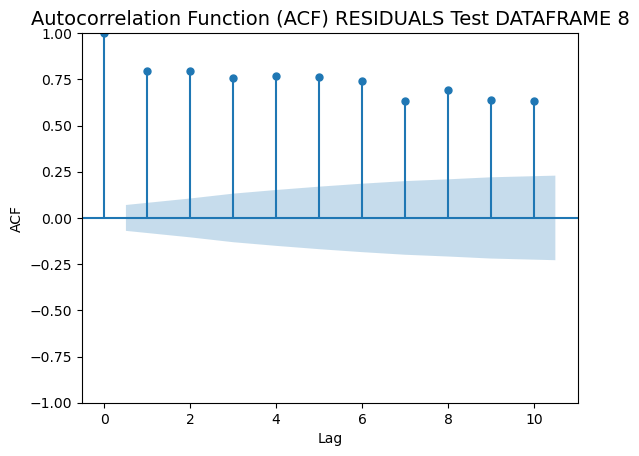

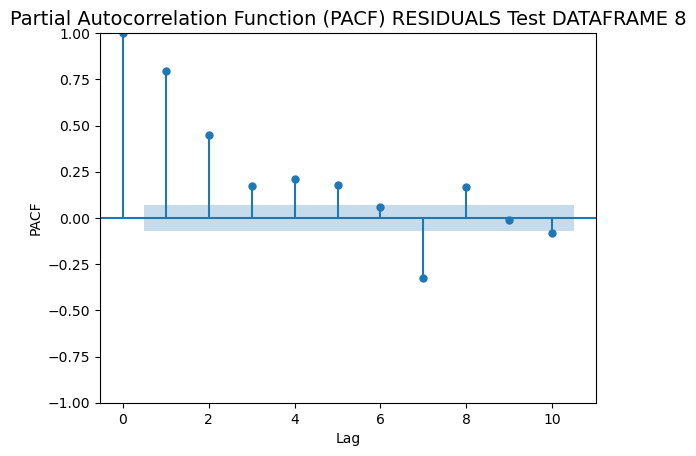

                   XGBOOST RESULTS FOR  DATAFRAME 9
MAPE: 1.5771614462079578e+17


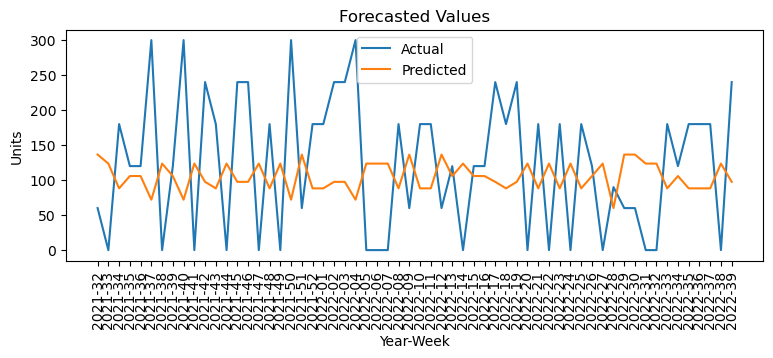

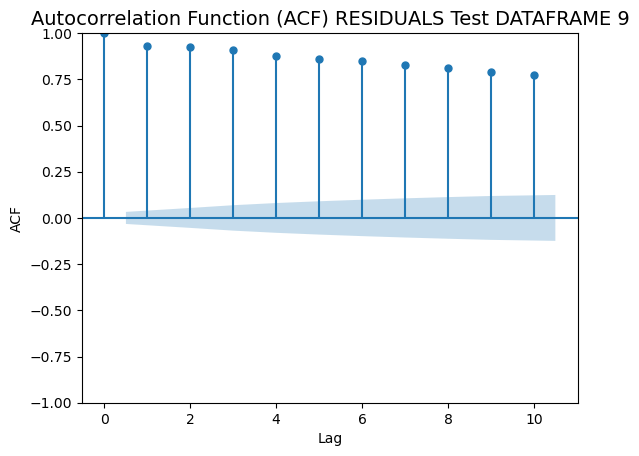

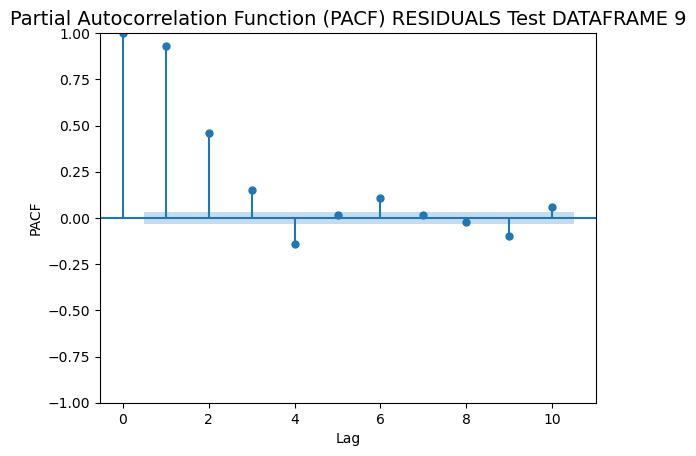

                   XGBOOST RESULTS FOR  DATAFRAME 10
MAPE: 2.8814632521947213e+17


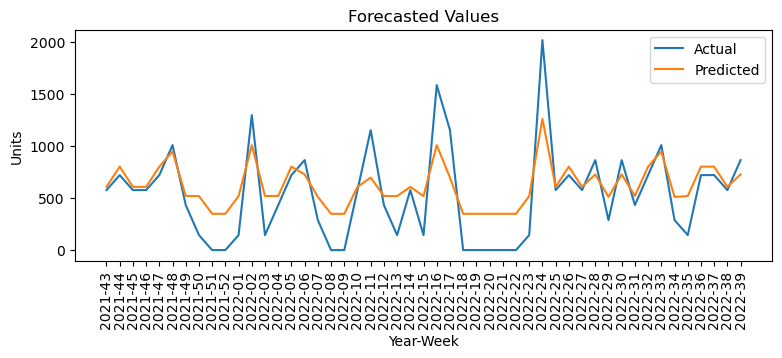

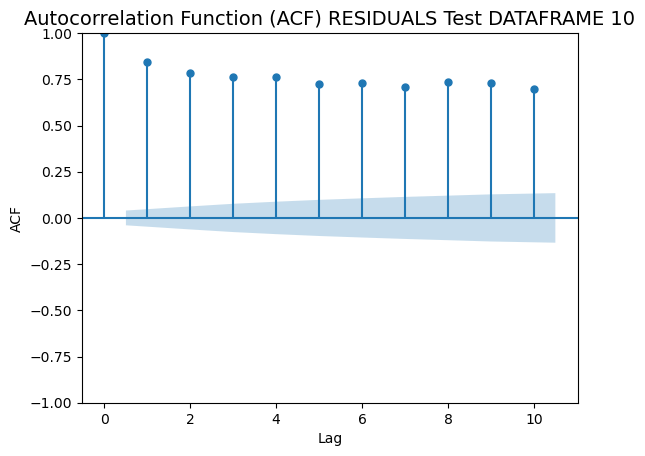

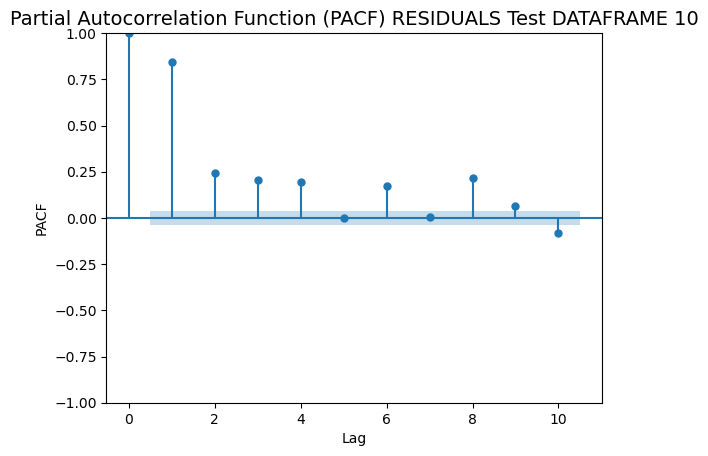

                   XGBOOST RESULTS FOR  DATAFRAME 11
MAPE: 0.2821478799508182


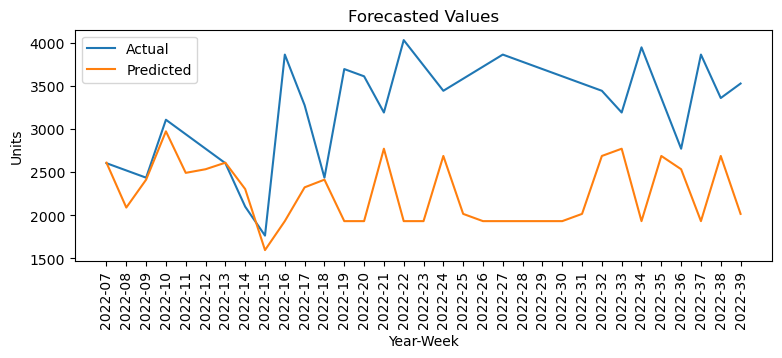

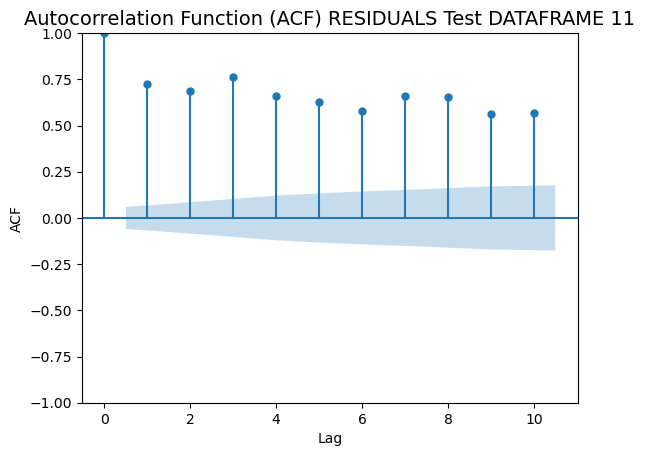

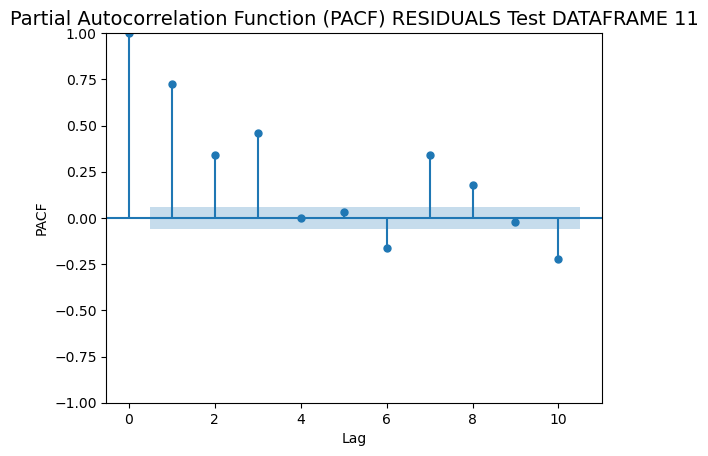

                   XGBOOST RESULTS FOR  DATAFRAME 12
MAPE: 3.3726006834903046e+17


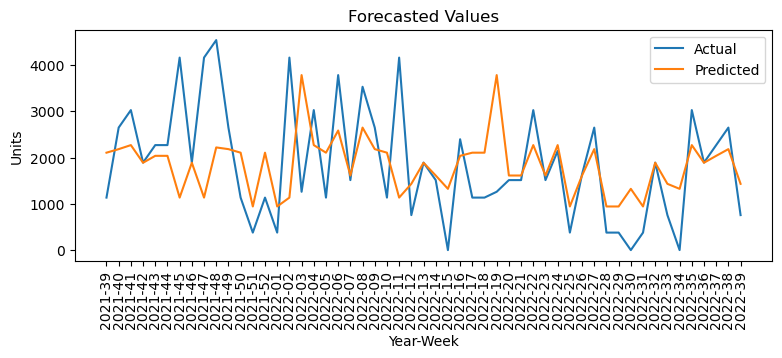

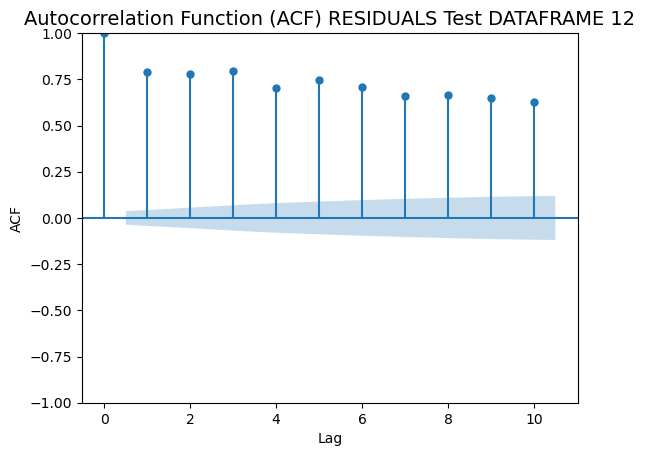

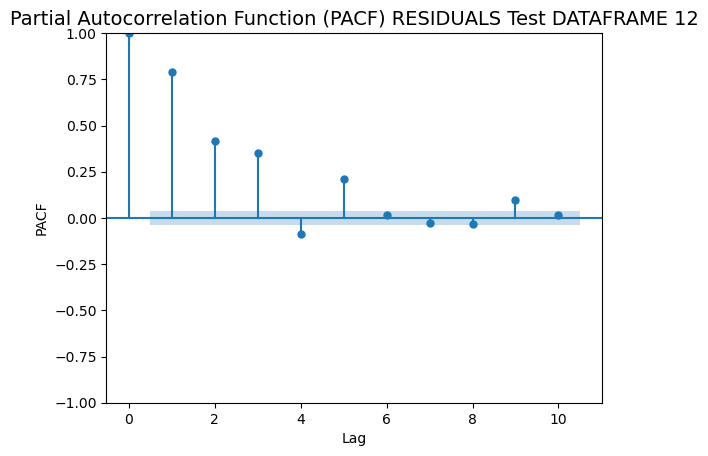

                   XGBOOST RESULTS FOR  DATAFRAME 13
MAPE: 3.5726203274469434e+17


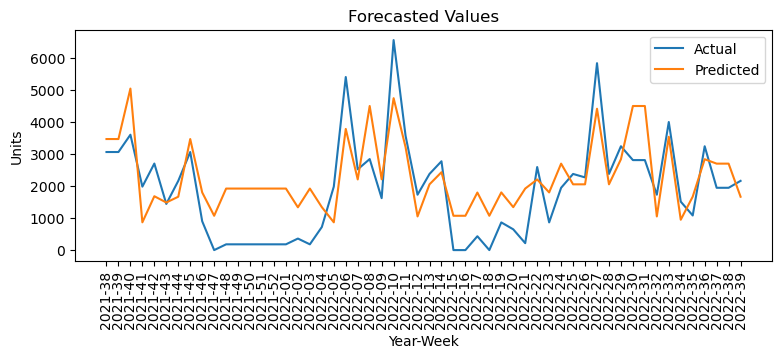

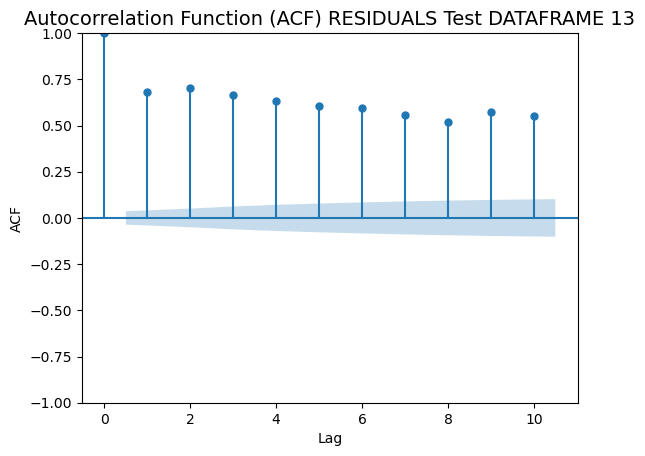

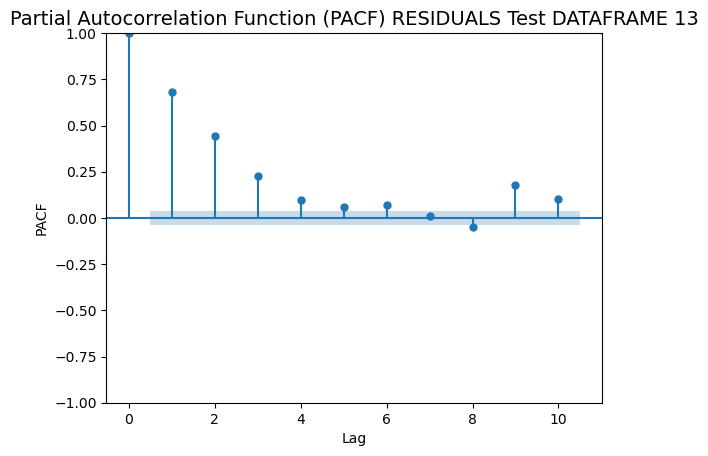

                   XGBOOST RESULTS FOR  DATAFRAME 14
MAPE: 1.2872856550673442


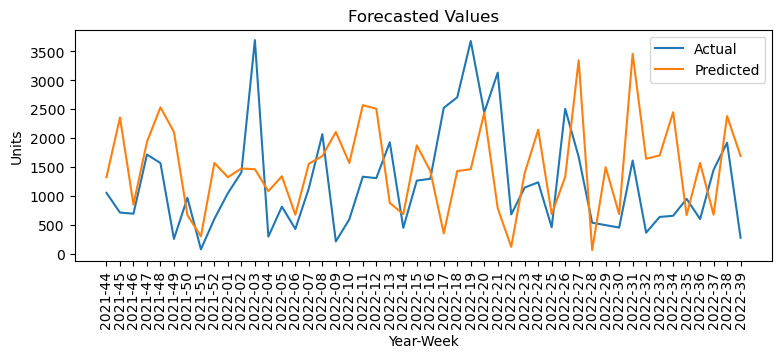

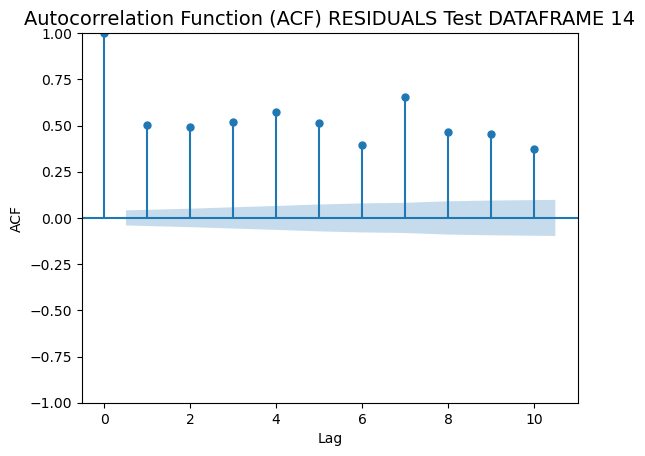

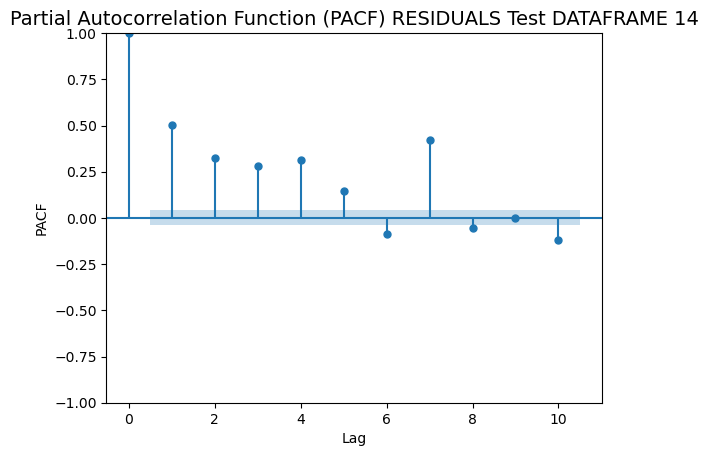

In [264]:
for i, df_subdividido in enumerate(new_df):
    XGBOOST(new_df,i)

In [276]:
from xgboost import plot_importance

def XGboost_features(data, position):
    # Sort the data by year-week in ascending order
    
    df = data[position].copy()

    # Convert the year-week column to datetime format
    df['year-week'] = pd.to_datetime(df['year-week'].astype(str) + '-1', format='%Y-%W-%w')
    df['quarter'] = df['year-week'].dt.quarter
    df['month'] = df['year-week'].dt.month
    df['year'] = df['year-week'].dt.year
    df['weekofyear'] = df['year-week'].dt.weekofyear
    
    # Split the data into training and testing sets
    train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
    train_data, test_data = df[:train_size], df[train_size:]
    
     # Create feature matrix and target variable for training
    X_train = train_data[['quarter','month','year','weekofyear']].astype(int).values
    y_train = train_data['Units'].values
    y_test = test_data['Units'].values
    
    # Create feature matrix for testing
    X_test = test_data[['quarter','month','year','weekofyear']].astype(int).values
    
    
    xgb = XGBRegressor(objective= 'reg:linear', n_estimators=1000)

    xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_train, y_train)],
        early_stopping_rounds=50,
        verbose=False) 
    
    feature_importance = plot_importance(xgb, height=0.9)
    
    ## make predictions
    y_pred = xgb.predict(X_test)
    
    #Residuals
    residuals = y_test - y_pred
    residuals = residuals.flatten()
    
        
    # Forecast the next 8 values
    # Step 3: Forecast the future 8 time points
    # Get the last week-year in the test_data to predict the next 8 weeks
    last_week_year = test_data['year-week'].max()
    next_8_weeks = pd.date_range(start=last_week_year, periods=8, freq='W-MON')
    next_8_weeks_quarter = next_8_weeks.quarter
    next_8_weeks_month = next_8_weeks.month
    next_8_weeks_year = next_8_weeks.year
    next_8_weeks_weekofyear = next_8_weeks.weekofyear

    # Create the feature matrix for the future 8 weeks
    X_future = pd.DataFrame({
        'quarter': next_8_weeks_quarter,
        'month': next_8_weeks_month,
        'year': next_8_weeks_year,
        'weekofyear': next_8_weeks_weekofyear
    }).astype(int).values

    # Forecast the future 8 weeks
    y_future = xgb.predict(X_future)
    
    
    
    # Calculate MAPE
    mape=mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"MAPE: {mape}")

      # Create a dataframe for visualization
    forecast_data = pd.DataFrame({'year-week': test_data['year-week'], 'Actual': test_data['Units'], 'Predicted': y_pred})
    # Plot the forecasted values
    plt.figure(figsize=(9, 3))
    plt.plot(forecast_data['year-week'], forecast_data['Actual'], label='Actual')
    plt.plot(forecast_data['year-week'], forecast_data['Predicted'], label='Predicted')
    plt.xlabel('Year-Week')
    plt.ylabel('Units')
    plt.title('Forecasted Values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
    
    #PLOTTING RESIDUALS
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(residuals, lags=9, ax=axes[1])
    plot_pacf(residuals, lags=9, ax=axes[0])
    plt.show()
    
    print(f'predictions DATAFRAME {i + 1}')
    print(y_future)

    
    
    


    

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12:45:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 0.8520098983477704


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


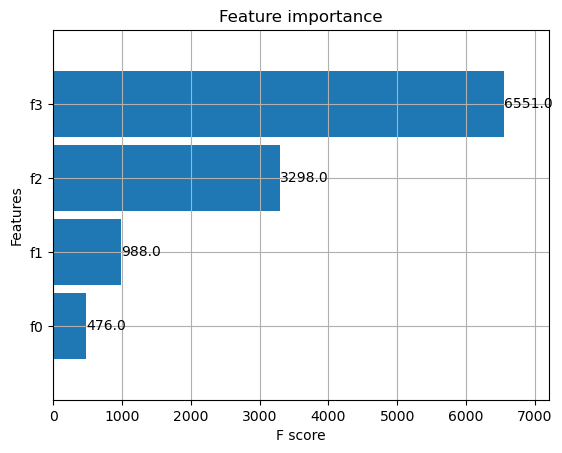

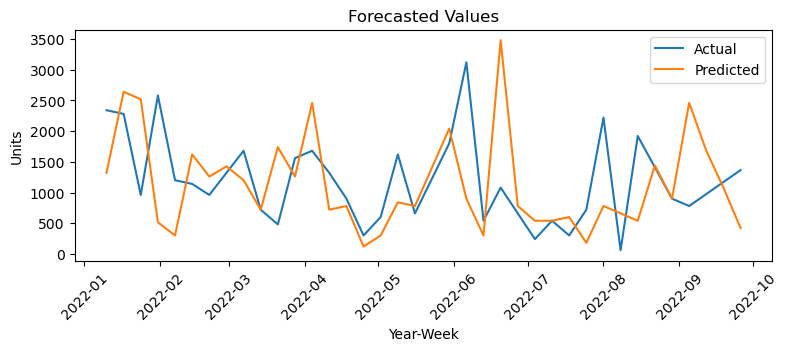

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


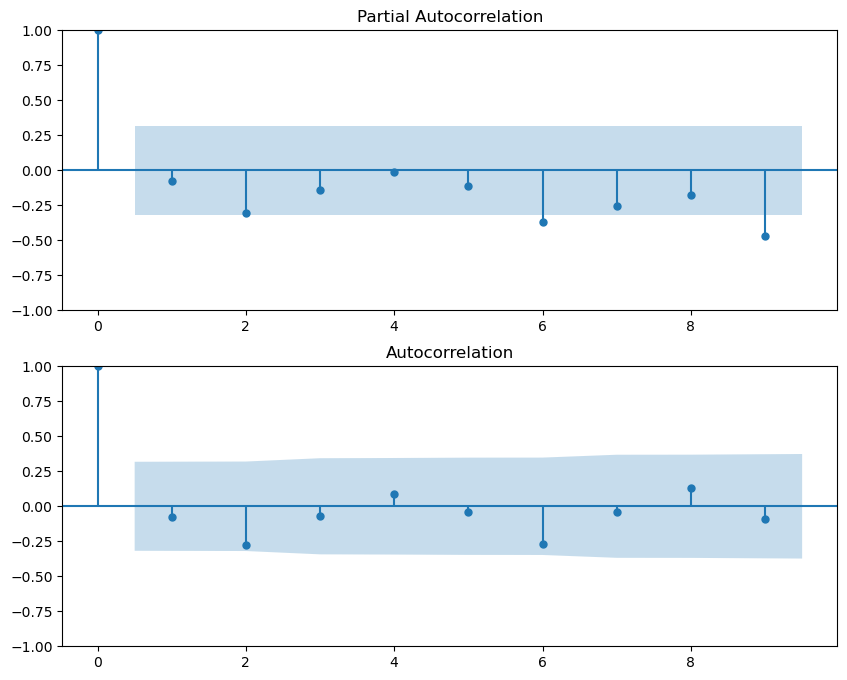

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 1
[ 420.0139   719.9964   599.99713  660.01166  959.9921   942.67566
 1379.9949  2400.003  ]
[12:45:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 1.424140263836138


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


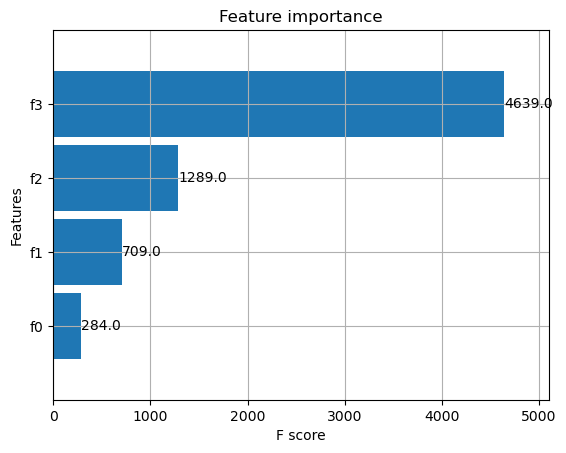

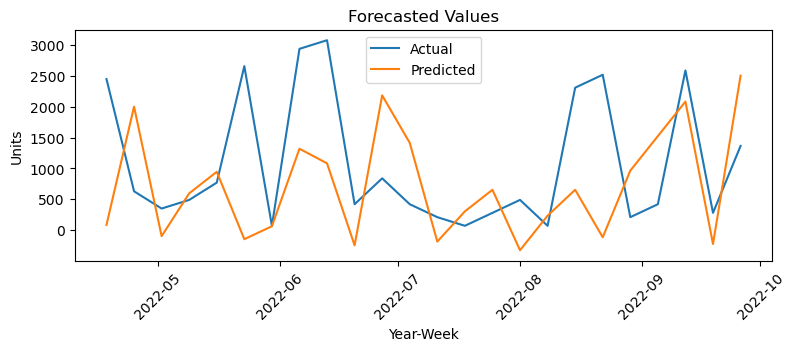

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


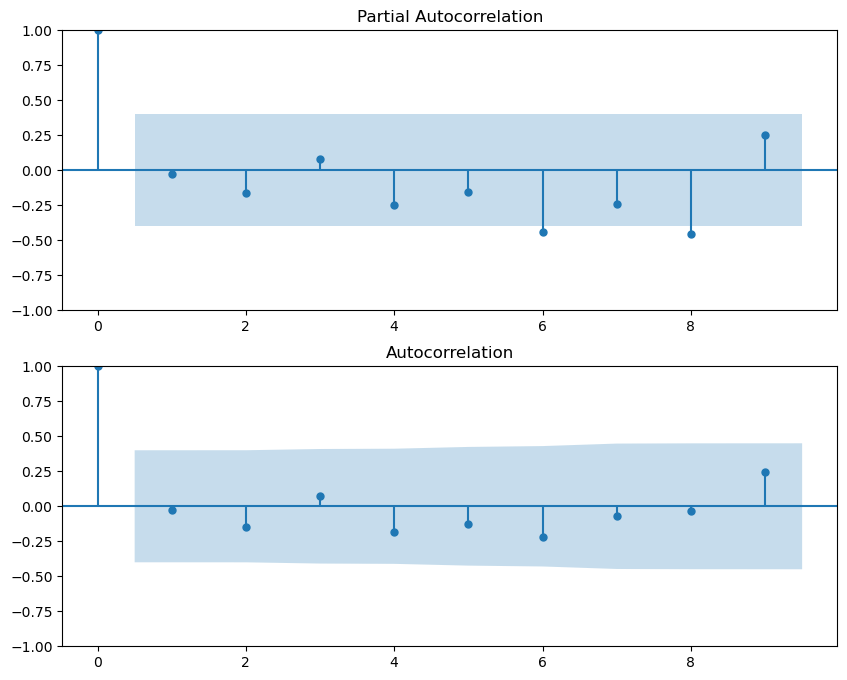

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 2
[2504.9077  1104.9159  -295.08667 -155.06818 2871.554   2435.7634
  732.85065 1082.8346 ]
[12:45:59] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 1.9980205784784535


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


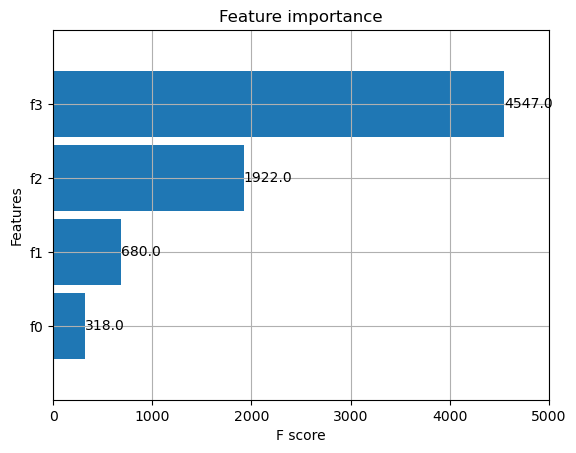

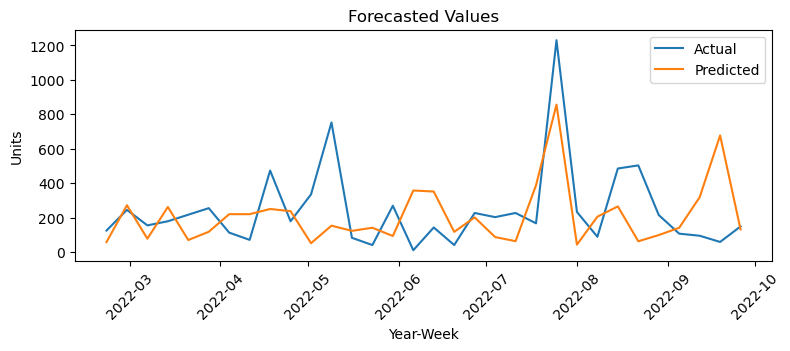

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


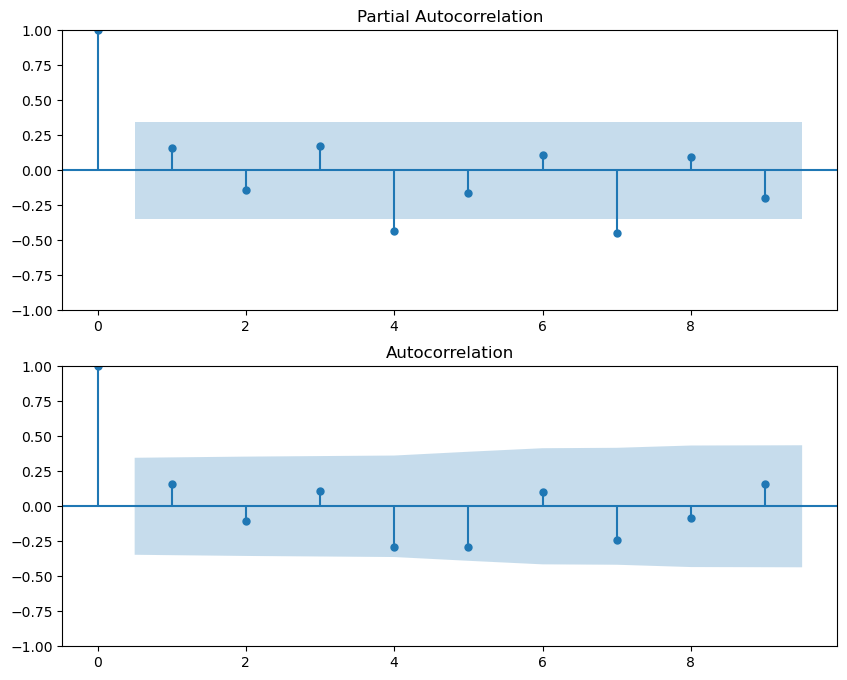

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 3
[132.25128  114.23252  102.236275  72.242386 102.227745 117.314865
  71.36038  146.97723 ]
[12:45:59] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 1.6034867511625825e+18


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


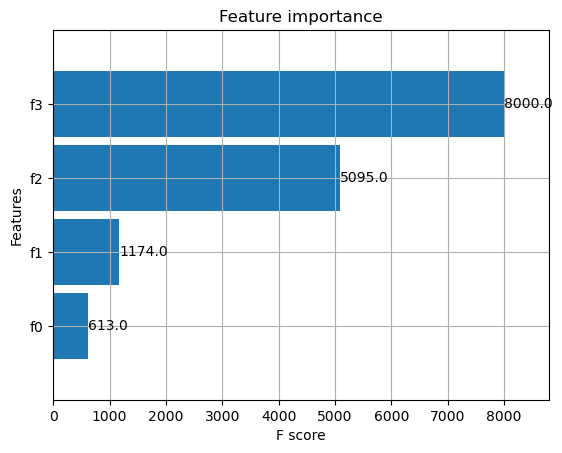

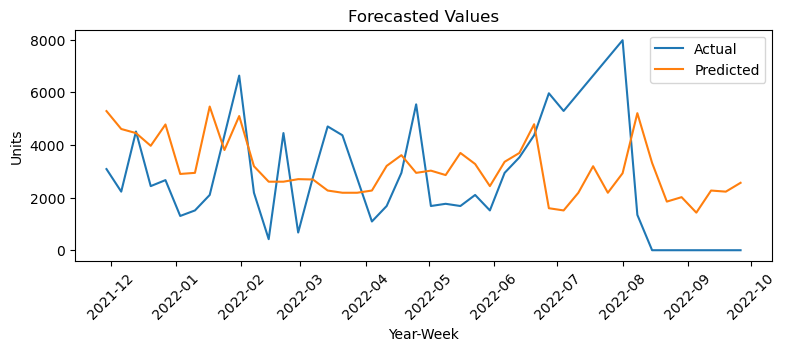

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


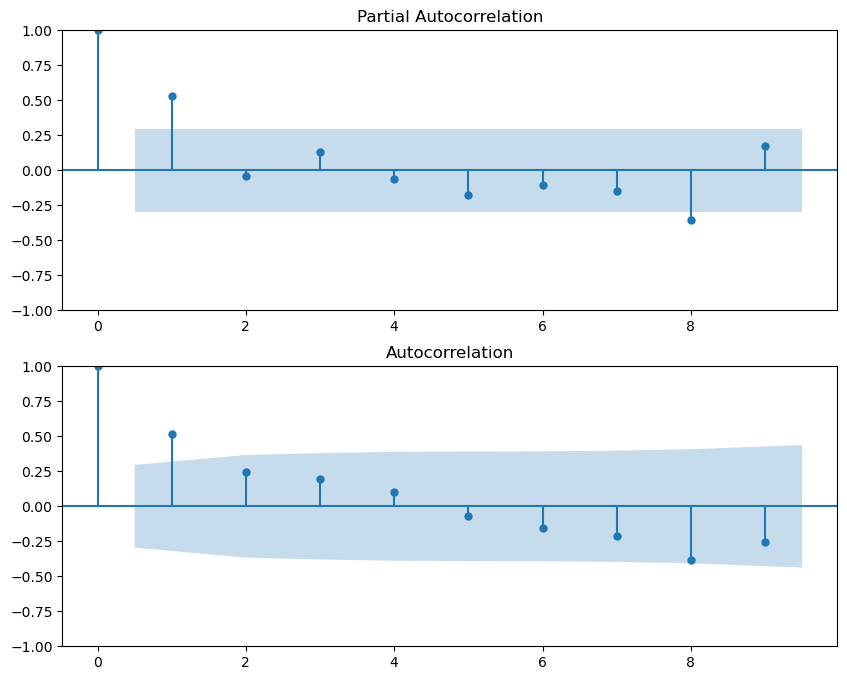

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 4
[2561.9956 3993.0037 2309.9954 4080.0034 5345.9956 5294.2637 4896.0044
 6089.997 ]
[12:46:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 2.6568977332783357e+17


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


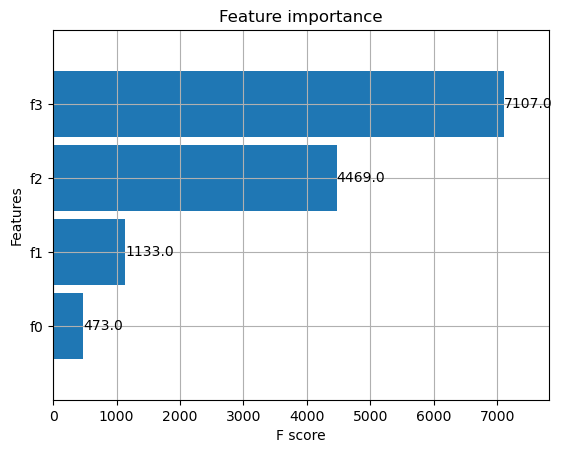

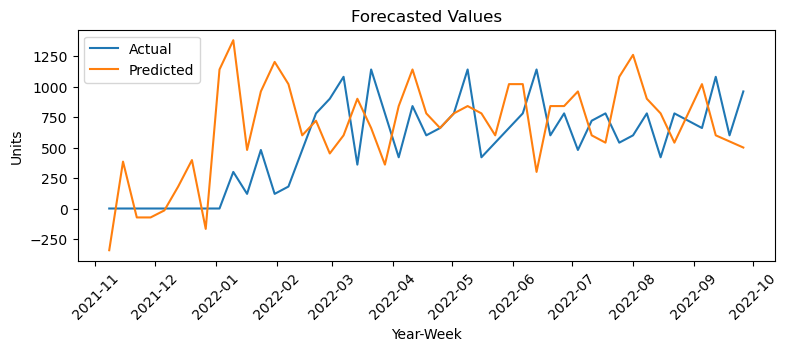

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


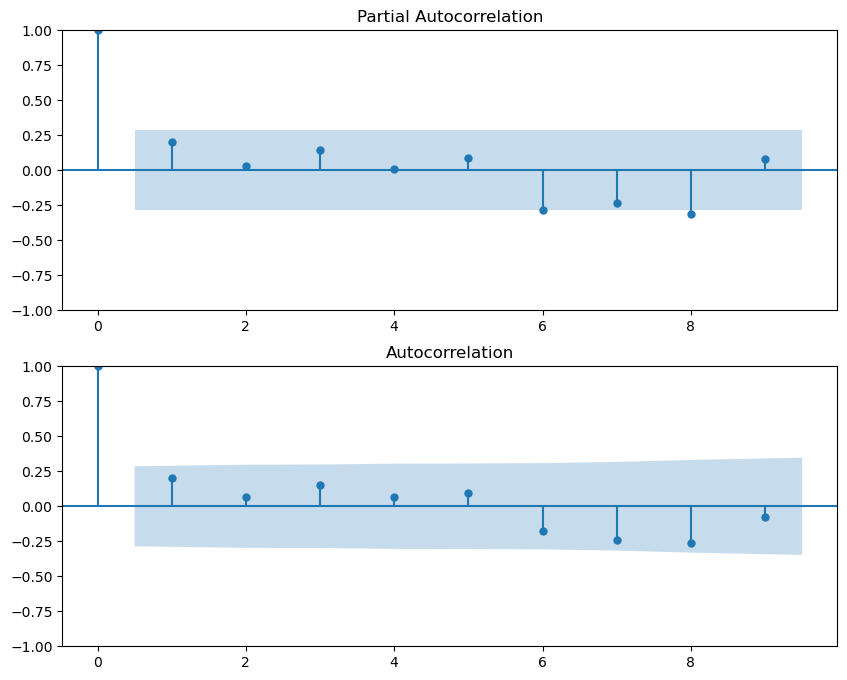

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 5
[ 5.0000510e+02  4.5000034e+02  3.9999371e+02  3.5000644e+02
 -2.5029574e-04  2.4472725e+02 -3.4205896e+02  3.8461292e+02]
[12:46:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 3.22126272672909e+17


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


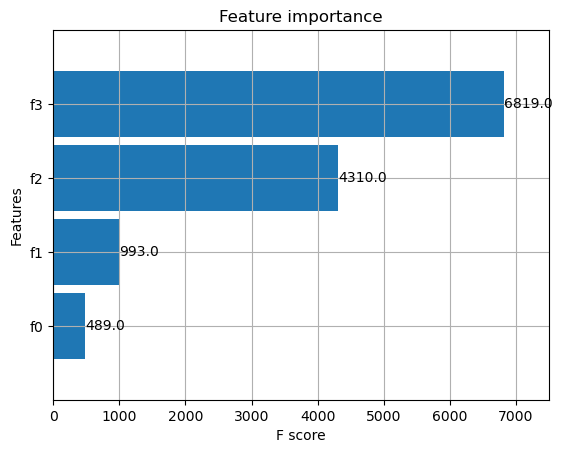

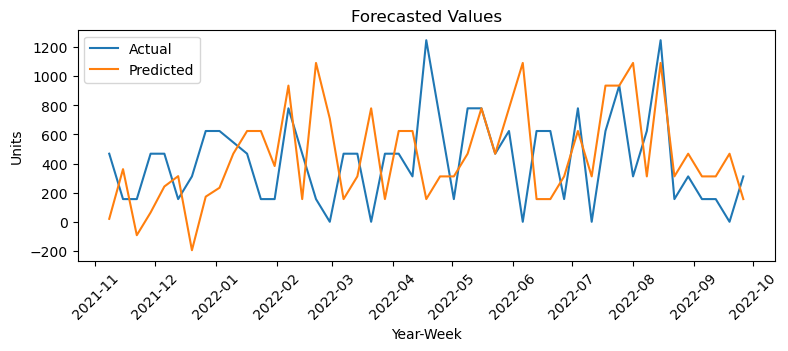

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


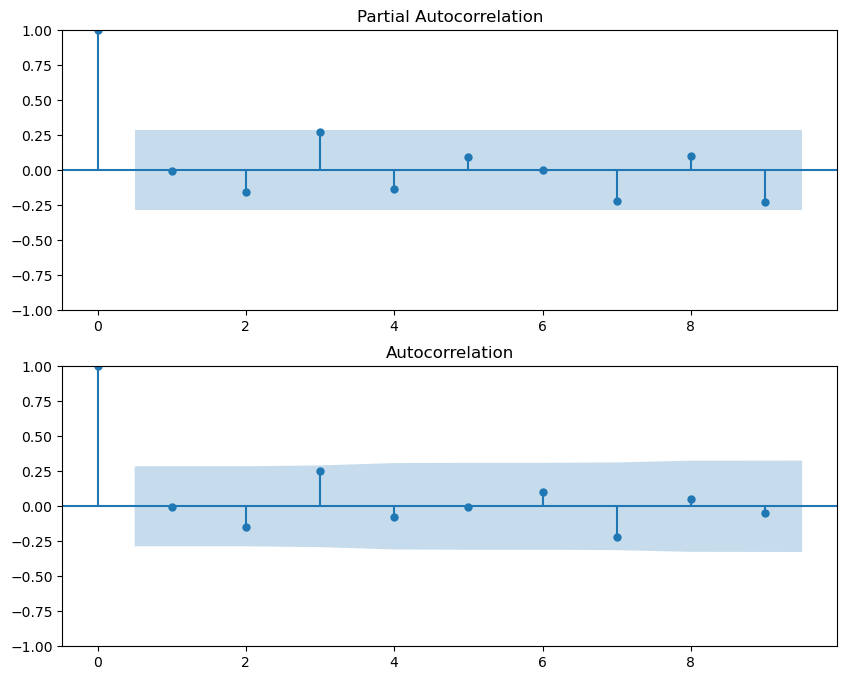

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 6
[ 155.994     936.00385   779.9963   1404.0079    311.99432   250.91986
   20.272999  361.81616 ]
[12:46:01] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 0.4603233359881809


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


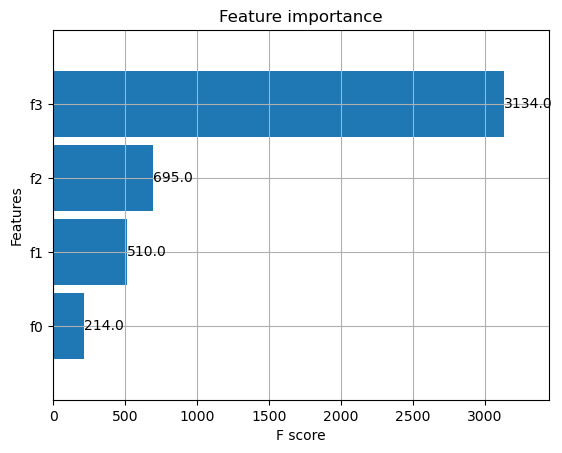

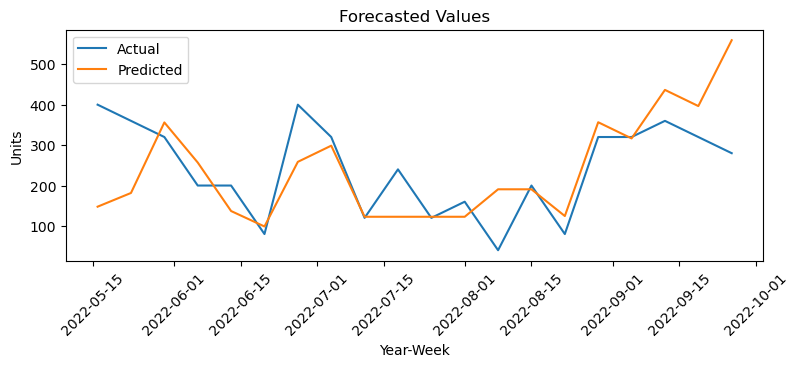

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


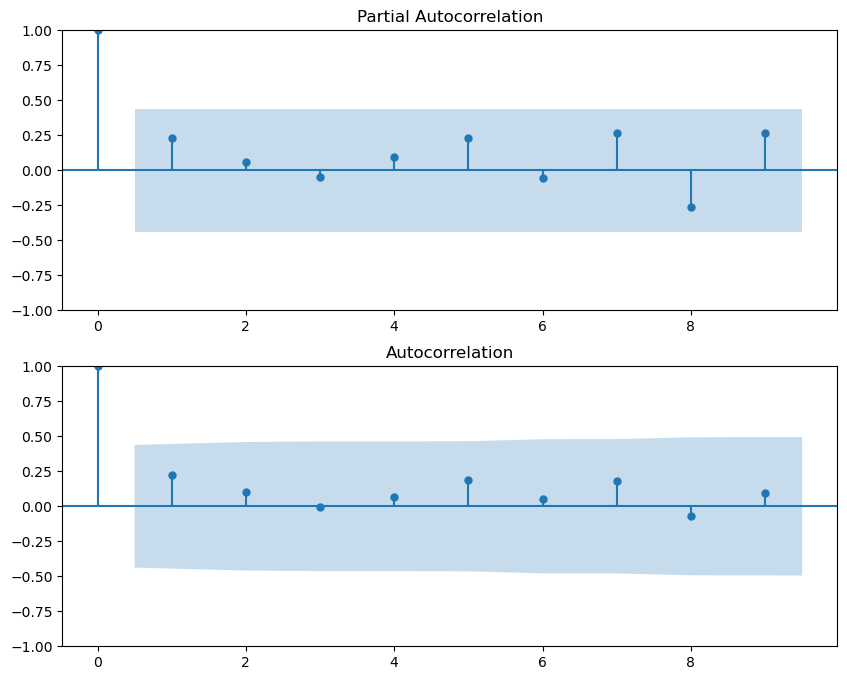

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 7
[559.40796 519.412   439.413   439.413   602.74023 602.74023 442.74463
 602.7388 ]
[12:46:01] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 1.1263837115929816e+18


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


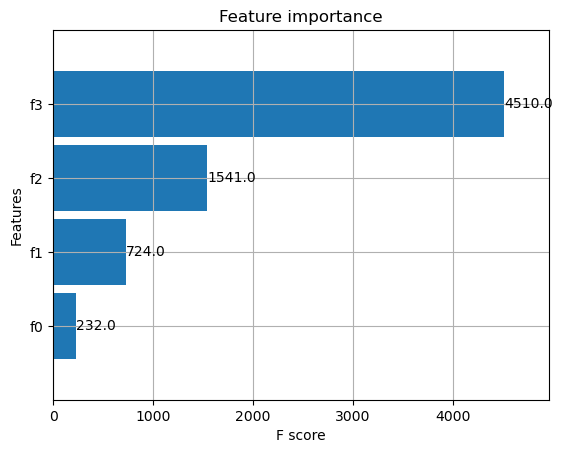

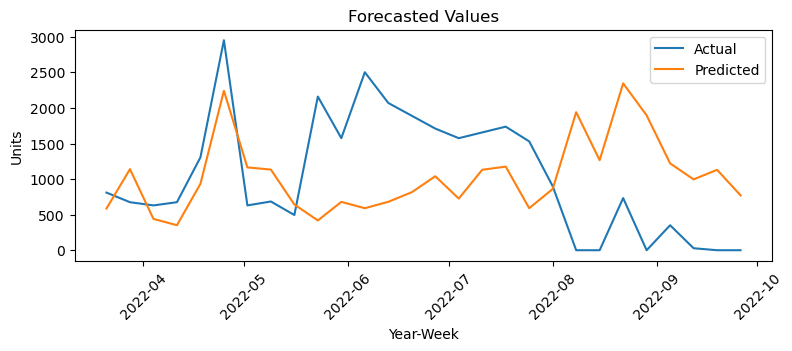

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


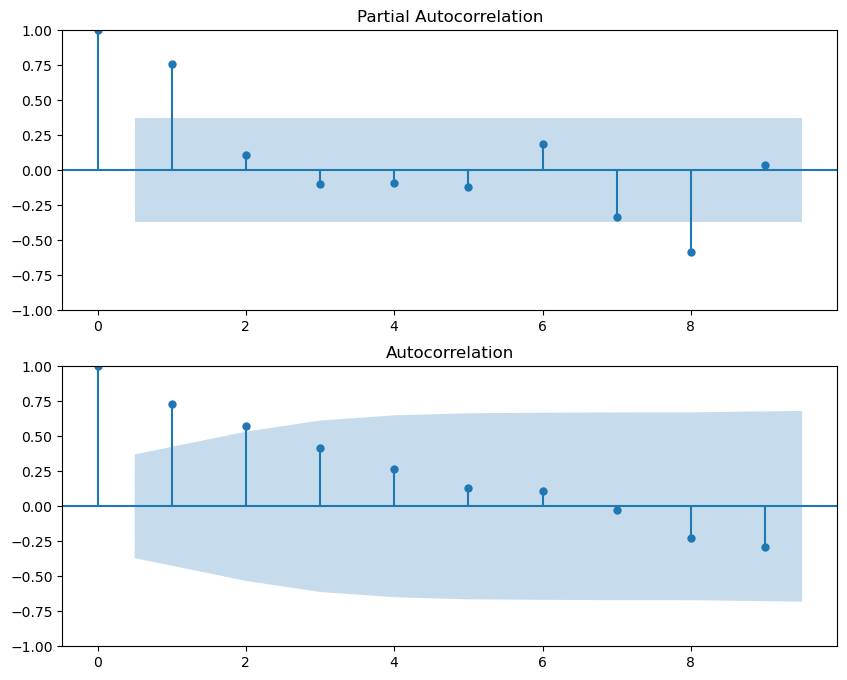

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 8
[ 771.1625   572.72217  500.8946   635.89557  995.776   1019.3098
 2210.2856  1400.2878 ]
[12:46:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 1.6961315750214806e+17


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


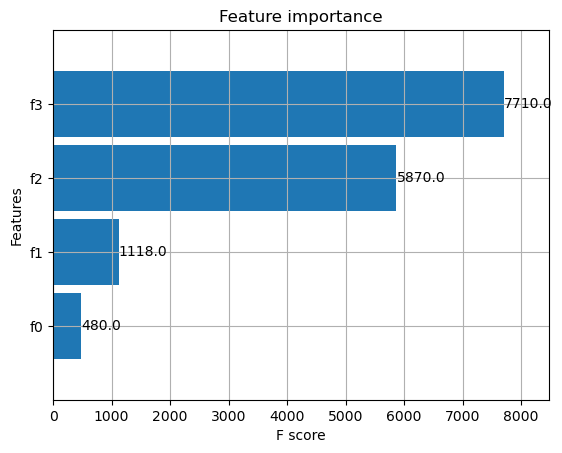

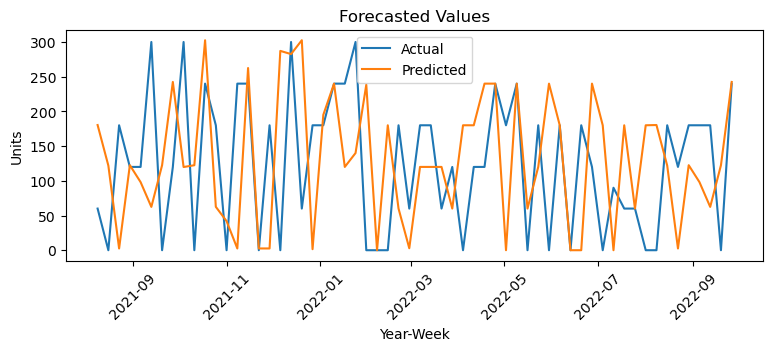

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


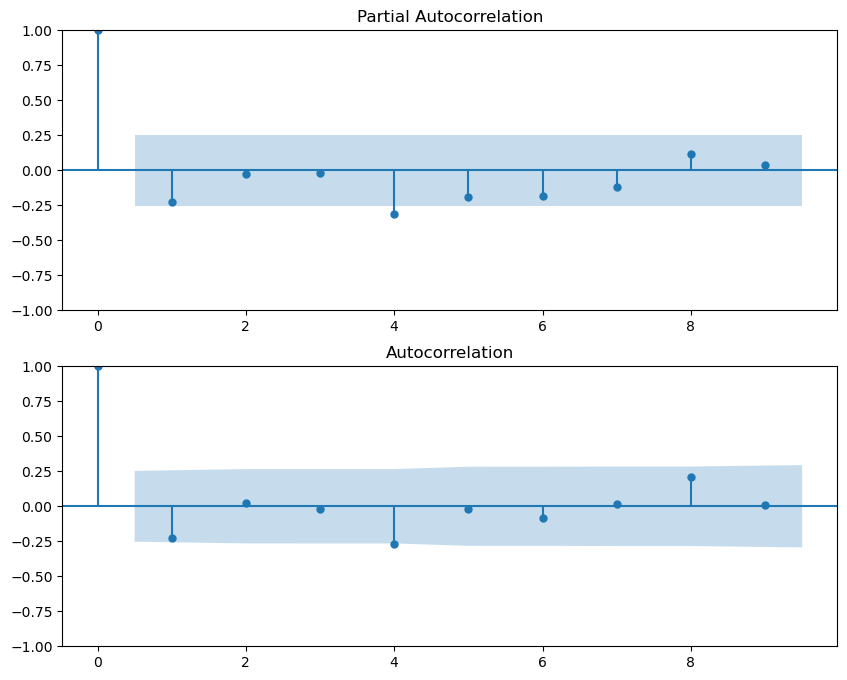

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 9
[242.42056   119.87066   122.440506  302.4794     62.50413   242.48004
   2.5017784 262.48532  ]
[12:46:03] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 7.33686632028821e+17


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


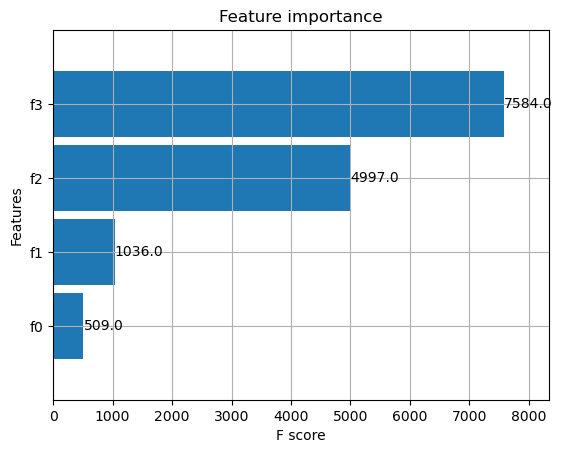

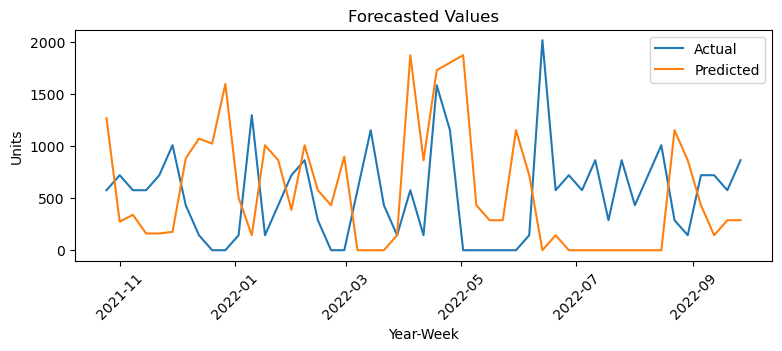

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


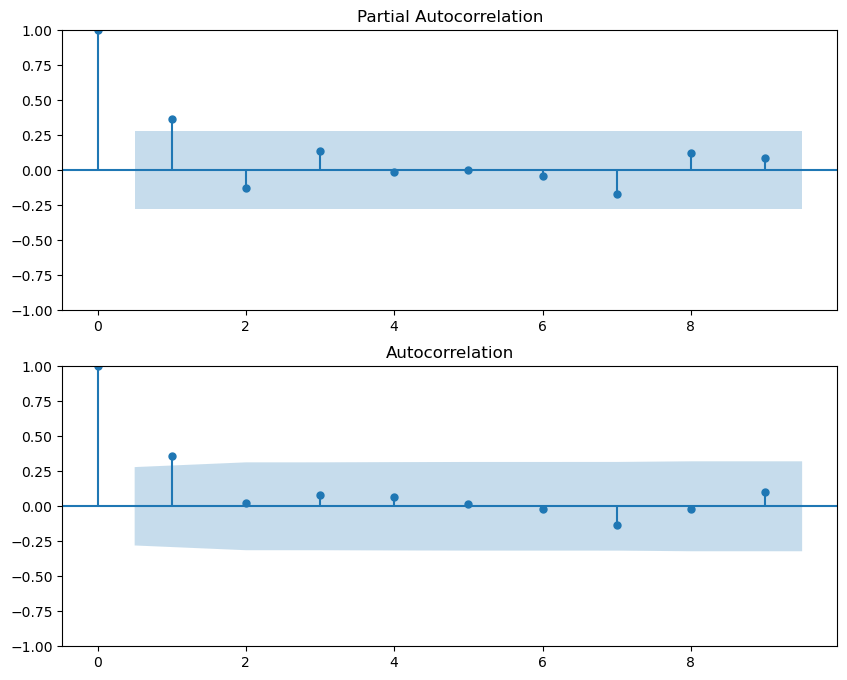

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 10
[ 287.9923  1008.003   1440.       863.9975  1267.3973   301.37802
  340.0144   160.94193]
[12:46:03] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 0.18500030754768232


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


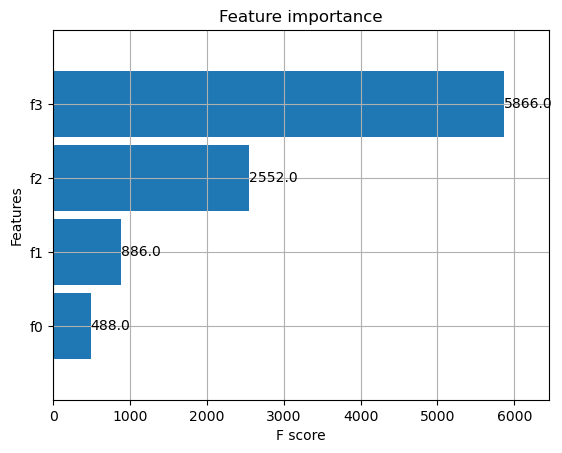

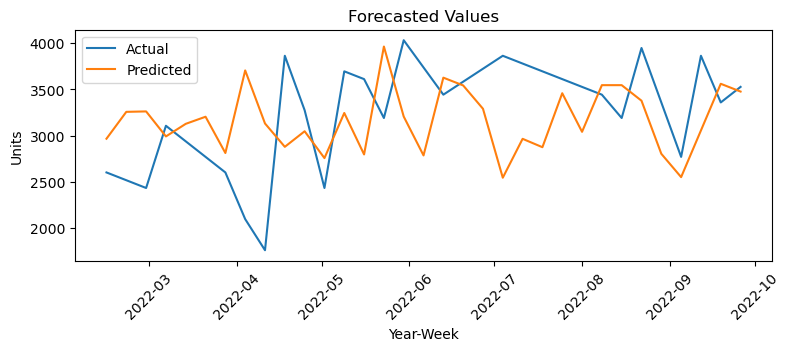

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


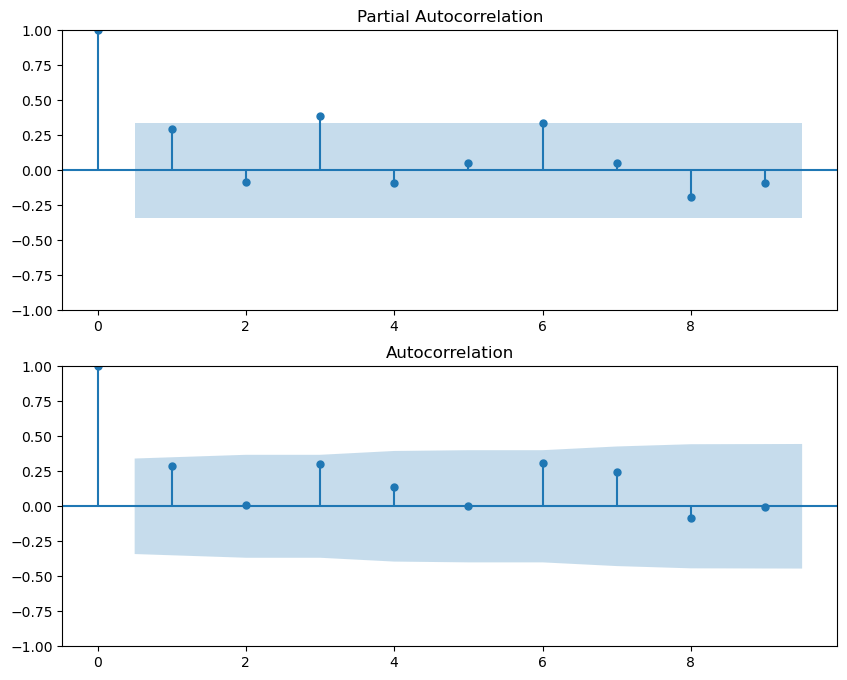

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 11
[3477.4998 2973.4895 2637.5022 3057.4937 4122.484  4140.7954 3048.5608
 3216.573 ]
[12:46:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 5.1392195198243974e+17


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


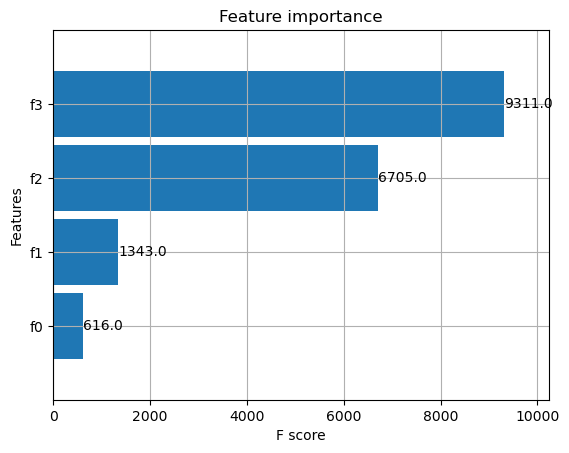

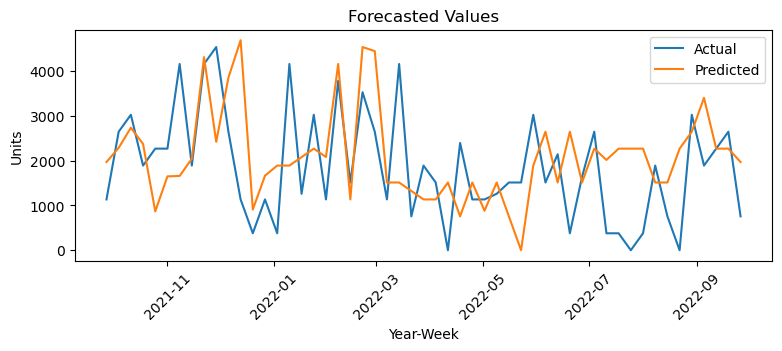

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


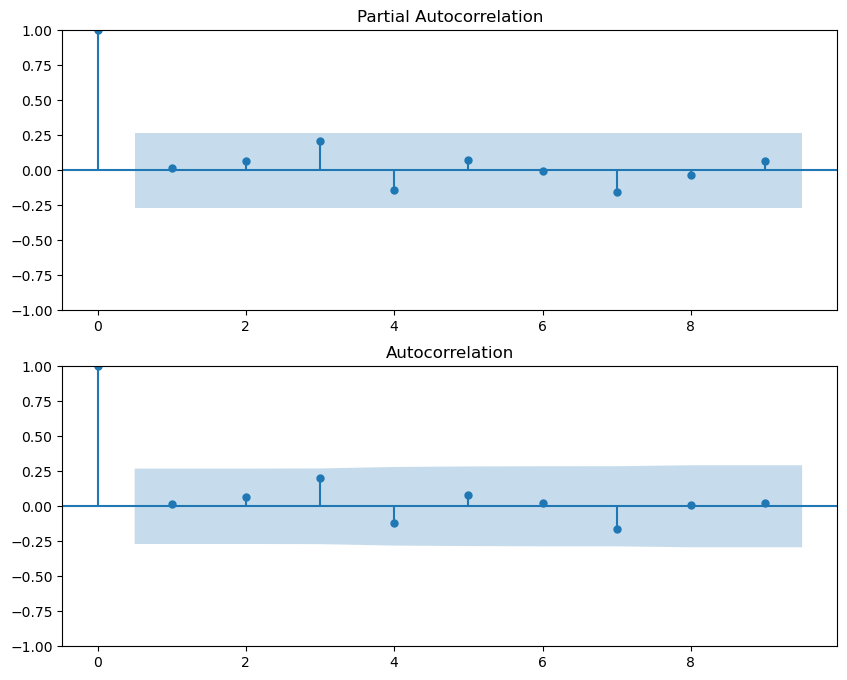

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 12
[1968.8092  2286.31    2734.46    2371.891    867.4807   902.37537
 1658.4376  2042.3431 ]
[12:46:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 1.8323790910517946e+17


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


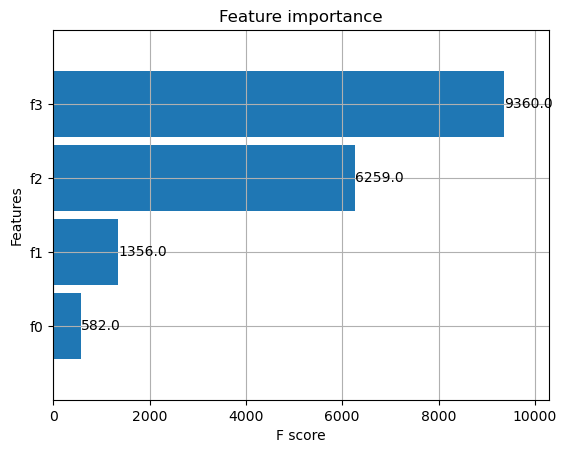

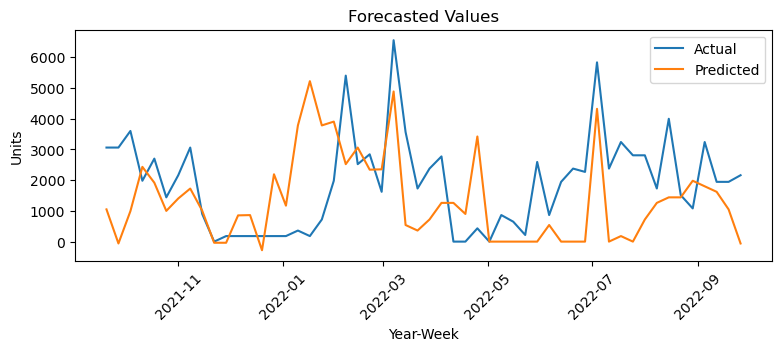

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


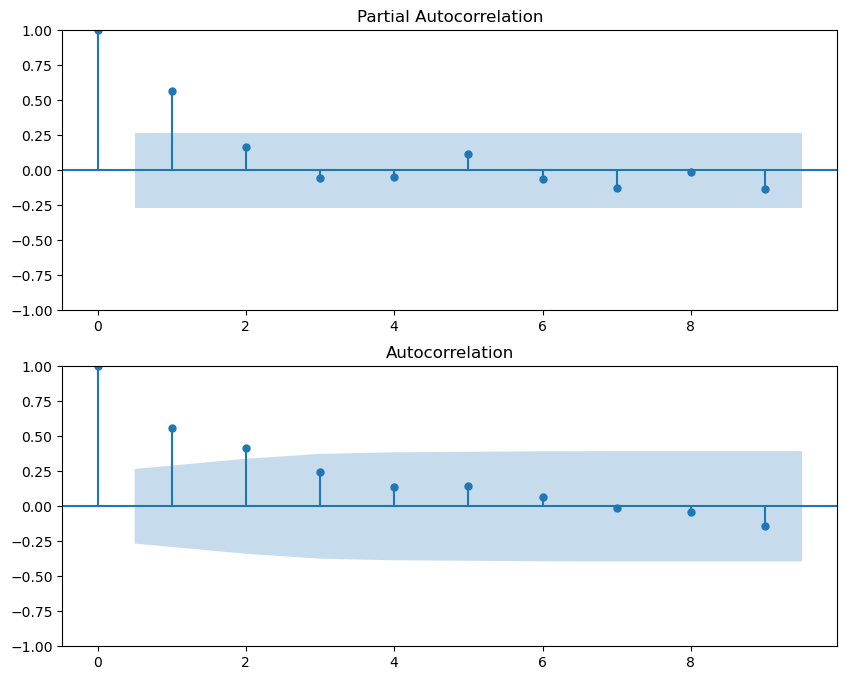

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['year-week'].dt.weekofyear
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


predictions DATAFRAME 13
[ -60.286243  991.22565  2432.2097   1915.9973    999.54083   -74.21993
 1725.7655   1007.6512  ]
[12:46:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAPE: 1.6881883377951201


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/4264713859.py:53: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  next_8_weeks_weekofyear = next_8_weeks.weekofyear


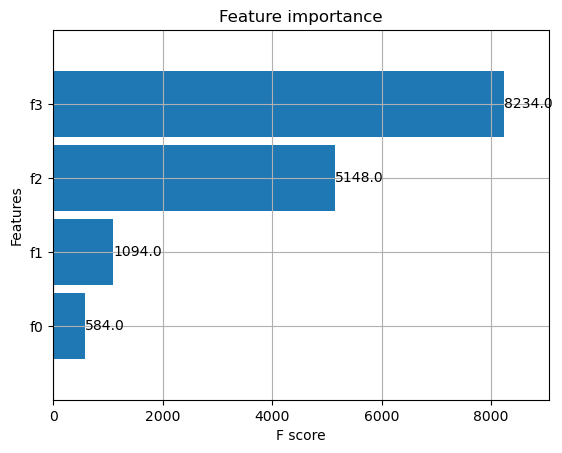

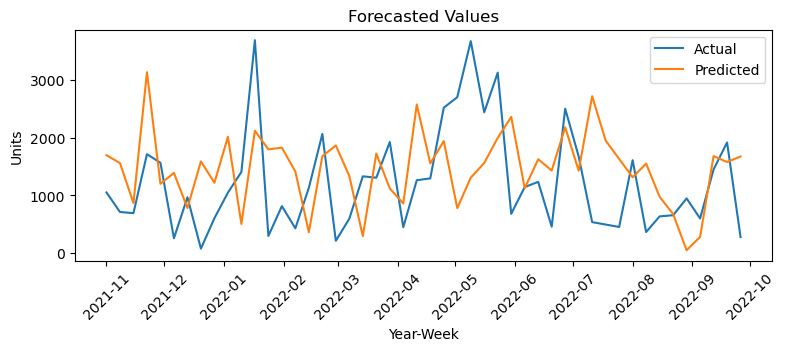

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


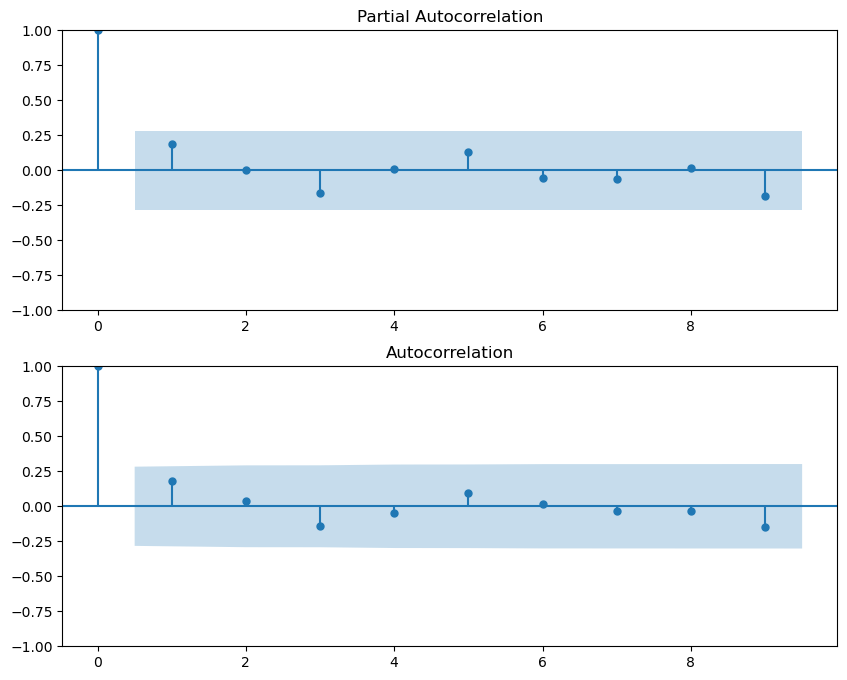

predictions DATAFRAME 14
[1675.9999  3543.9985  1512.0024  1119.9972  1420.0012  1534.1205
 1561.5889   865.80237]


In [277]:
for i, df_subdividido in enumerate(new_df):
    XGboost_features(new_df,i)

In [278]:
def prophet(data,position):
    df = data[position]
    obs= df[['year-week','Units']]
    n = len(obs)
    
    # Define the percentage of the dataset to be used for training (e.g., 80%)
    train_percentage = 0.8
    # Calculate the index to split the dataset
    split_index = int(len(df) * train_percentage)

    # Convert "year-week" column to datetime
    obs['year-week'] = pd.to_datetime(obs['year-week'].astype(str) + '-1', format='%Y-%W-%w')

    
    # Rename columns as required by Prophet
    data = obs.rename(columns={'year-week': 'ds', 'Units': 'y'})
    
    # Split the dataset into train and test sets
    train_data = data[:split_index]
    test_data = data[split_index:]
    
    ######### TRAIN AND TEST PART ###################################################################

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(train_data)
    # Create a future DataFrame for the next 8 values
    y_pred = model.make_future_dataframe(periods=len(test_data), freq='W')
    # Make predictions for the test 
    predictions = model.predict(y_pred)
    # Extract actual and predicted values for the forecast period
    actuals = data['y'].tail(len(test_data)).values
    predicteds = predictions['yhat'].tail(len(test_data)).values
    #mape 
    mape=mean_absolute_percentage_error(actuals,predicteds)
    
   
    
    ##############################PREDICTIONS#########################################
    
    #Generate future dates for prediction (8 steps ahead)
    future_dates = model.make_future_dataframe(periods=8, freq='W')

    # Make predictions for the future dates
    forecast = model.predict(future_dates)
    
    # Extract actual and predicted values for the forecast period
    actual_values = data['y'].tail(8).values
    predicted_values = forecast['yhat'].tail(8).values
    
     # Return the results
    print(f'                   PROHEPT RESULTS FOR  DATAFRAME {i + 1}')
    
        # Create a dataframe for visualization
    forecast_data = pd.DataFrame({'year-week':  predictions['ds'].tail(len(test_data)), 'Actual': actuals, 'Predicted': predicteds})
    # Plot the forecasted values
    plt.figure(figsize=(9, 3))
    plt.plot(forecast_data['year-week'], forecast_data['Actual'], label='Actual')
    plt.plot(forecast_data['year-week'], forecast_data['Predicted'], label='Predicted')
    plt.xlabel('Year-Week')
    plt.ylabel('Units')
    plt.title('Forecasted Values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    #mape 
    mape=mean_absolute_percentage_error(actuals,predicteds)
    print(mape)
        
    #CALCULATING THE RRESIDUALS ######################################
    residuals = actuals-predicteds
    #residuals = residuals.values
    #residuals = residuals[~pd.isnull(residuals)]
    
    ##### plot residuals
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(residuals, lags=10, ax=axes[1])
    plot_pacf(residuals, lags=10, ax=axes[0])
    plt.show()

    

    
    return forecast[['ds', 'yhat']].tail(8)

    


In [279]:
for i, df_subdividido in enumerate(new_df):
    prophet(new_df, i)

/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].astype(str) + '-1', format='%Y-%W-%w')
13:14:43 - cmdstanpy - INFO - Chain [1] start processing
13:14:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].as

                   PROHEPT RESULTS FOR  DATAFRAME 1
[1070.16247076 1411.29284539 1608.04319995 1438.05802826 1048.06836584
  834.86926999  998.65035964 1298.73335252]


13:14:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].astype(str) + '-1', format='%Y-%W-%w')
13:14:44 - cmdstanpy - INFO - Chain [1] start processing
13:14:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

                   PROHEPT RESULTS FOR  DATAFRAME 2
[948.52494614 948.3617262  948.19850627 948.03528634 947.8720664
 947.70884647 947.54562654 947.38240661]
                   PROHEPT RESULTS FOR  DATAFRAME 3
[178.42617855 147.49178629  93.1408861   86.55871216 163.79095228
 275.00679211 327.83142191 280.17849228]


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].astype(str) + '-1', format='%Y-%W-%w')
13:14:44 - cmdstanpy - INFO - Chain [1] start processing
13:14:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].as

                   PROHEPT RESULTS FOR  DATAFRAME 4
[3892.83356644 3609.80106991 3157.51034158 2791.3211867  2699.31649683
 2920.6255457  3322.7154641  3648.97227022]
                   PROHEPT RESULTS FOR  DATAFRAME 5
[558.95200179 743.03463172 891.70967261 871.2331034  744.88853346
 669.64788715 714.27770134 816.27353765]


13:14:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].astype(str) + '-1', format='%Y-%W-%w')
13:14:44 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing


                   PROHEPT RESULTS FOR  DATAFRAME 6
[299.49002239 475.91764307 636.28855092 649.94143011 530.88760092
 408.54454567 387.17458395 452.65683782]
                   PROHEPT RESULTS FOR  DATAFRAME 7
[406.56746737 407.69517076 408.82287415 409.95057755 411.07828094
 412.20598433 413.33368772 414.46139112]


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].astype(str) + '-1', format='%Y-%W-%w')
13:14:45 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].as

                   PROHEPT RESULTS FOR  DATAFRAME 8
[1366.72703126 1100.11753861  751.73772026  652.99531638  917.30311204
 1272.73043179 1325.1167784   982.20391621]
                   PROHEPT RESULTS FOR  DATAFRAME 9
[121.39828705 109.02437004  96.63775911 106.36046261 139.6006759
 172.11762418 178.14232577 156.55866055]


13:14:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].astype(str) + '-1', format='%Y-%W-%w')
13:14:45 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

                   PROHEPT RESULTS FOR  DATAFRAME 10
[ 702.7005376   478.86301698  390.41860236  526.26559583  816.30956261
 1093.1260445  1212.4050334  1142.22137909]
                   PROHEPT RESULTS FOR  DATAFRAME 11
[2608.25551306 2590.93643683 2597.92080756 2635.72410288 2706.2476194
 2771.84138054 2764.16648528 2645.67388977]


/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].astype(str) + '-1', format='%Y-%W-%w')
13:14:45 - cmdstanpy - INFO - Chain [1] start processing
13:14:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/9y/p1ql2tjj22qfgt4sxrcp18s80000gn/T/ipykernel_43829/586775224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['year-week'] = pd.to_datetime(obs['year-week'].as

                   PROHEPT RESULTS FOR  DATAFRAME 12
[2360.1836932  2260.82168833 2334.39846688 2322.40763415 2093.35698617
 1891.94194457 2121.31718181 2848.60433545]
                   PROHEPT RESULTS FOR  DATAFRAME 13
[2165.54979895 2052.89593555 2080.22086044 2227.95181093 2311.37257744
 2181.33830514 1943.77643703 1894.45830067]


13:14:46 - cmdstanpy - INFO - Chain [1] done processing


                   PROHEPT RESULTS FOR  DATAFRAME 14
[2142.01008292 2180.41840168 2059.50091    1654.58394288 1205.51898706
 1138.41953985 1605.38899781 2261.23985951]
